# **Walmart Sales Forecasting**

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Walmart (1).csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1    5/2/2010    1643690.90             0        42.31       2.572   
1      1   12/2/2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1    5/3/2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Data Preprocessing

### Checking for Null Values

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##### So none of the columns has null values

In [6]:
df.duplicated().sum()

0

#### So there is no duplicate values 

### Checking for Outliers 

In [7]:
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [8]:
indices_to_remove = ['Holiday_Flag','Store'] # Creating the varible with holiday flag  and store column
num_columns=num_columns.difference(indices_to_remove)

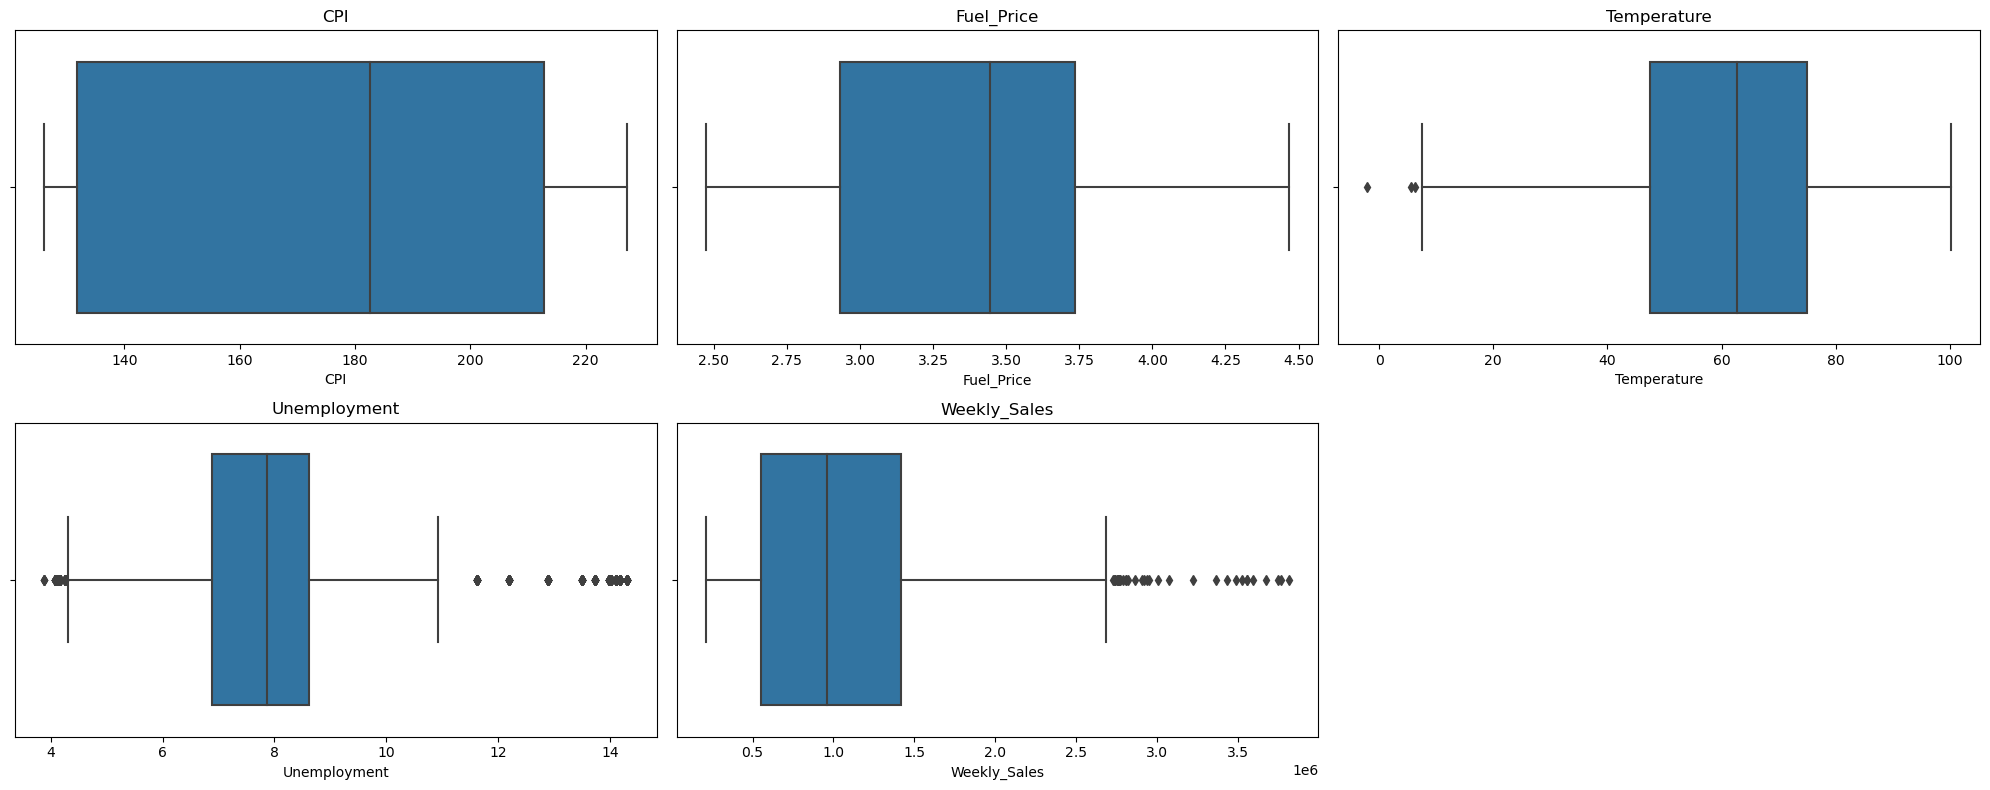

In [9]:
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()    # for 

### Removing the Outliers

In [10]:
def remove_outliers(df1,col): # defing function name as remove_outliers
# Setting the Q1 range at the 0.25 percentile, which means the data falling below the 0.25 percentile will be treated as outliers.
    q1=df1[col].quantile(0.25)
# Setting the Q3 range at the 0.75 percentile, which means the data falling below the 0.75 percentile will be treated as outliers.
    q3=df1[col].quantile(0.75) #
    IQR=q3-q1  # Setting the Inter Quartaile Range by subtracting the Q3 From Q1.
    Lower_Band = q1-1.5*IQR # Setting the lower band for separate the outliers
    Upper_Band = q3+1.5*IQR # Setting the Upper band for separate the outliers
    df[col]=np.clip(df[col],Lower_Band,Upper_Band) # removing the data points which are falls below and above the upper bands and lower bands
    return df1 # Return dataset

# Defining the function that can remove outliers
def treat_outliers(df1,col_list):# defing function name as treat_outliers
    for col in col_list:              # Using for loop to loop through col list of numeric column which we created earlier and dataset
        df1=remove_outliers(df1,col) # removing the outliers from the data
    return df1 

In [11]:
df=treat_outliers(df,num_columns) # Removing the outliers

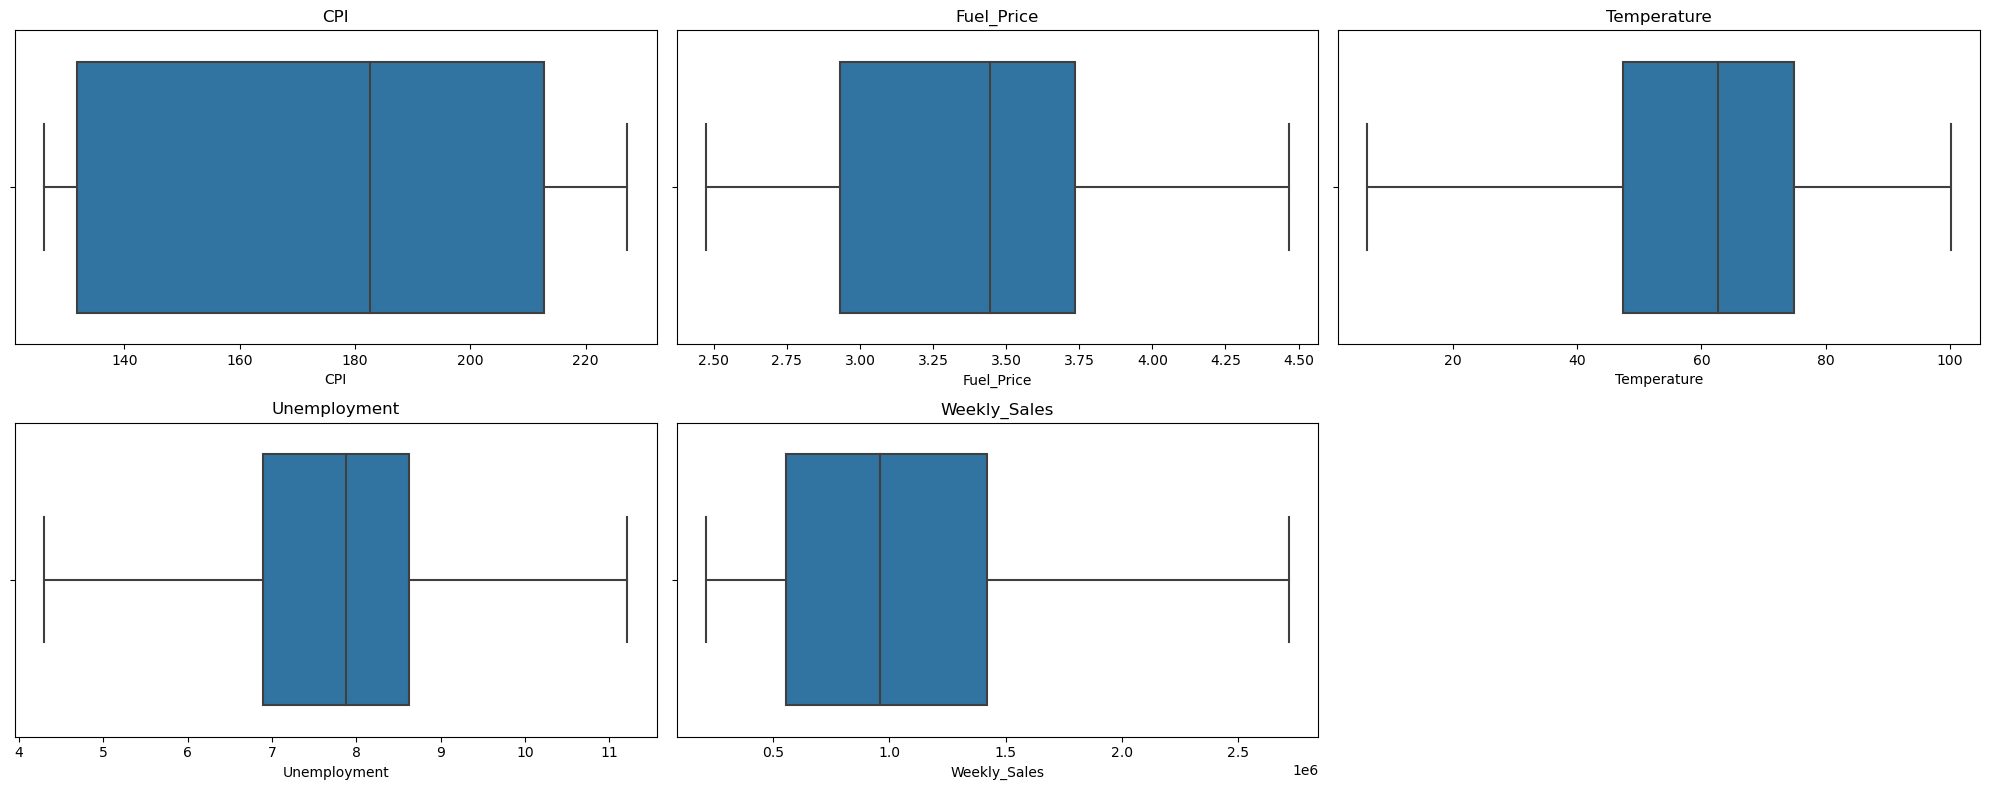

In [12]:
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show() 

### **Exploratory Data Analysis**

#### 1. Stores vs Weekly Sales

In [13]:
df_store_sales=df.groupby('Store')['Weekly_Sales'].sum().reset_index()

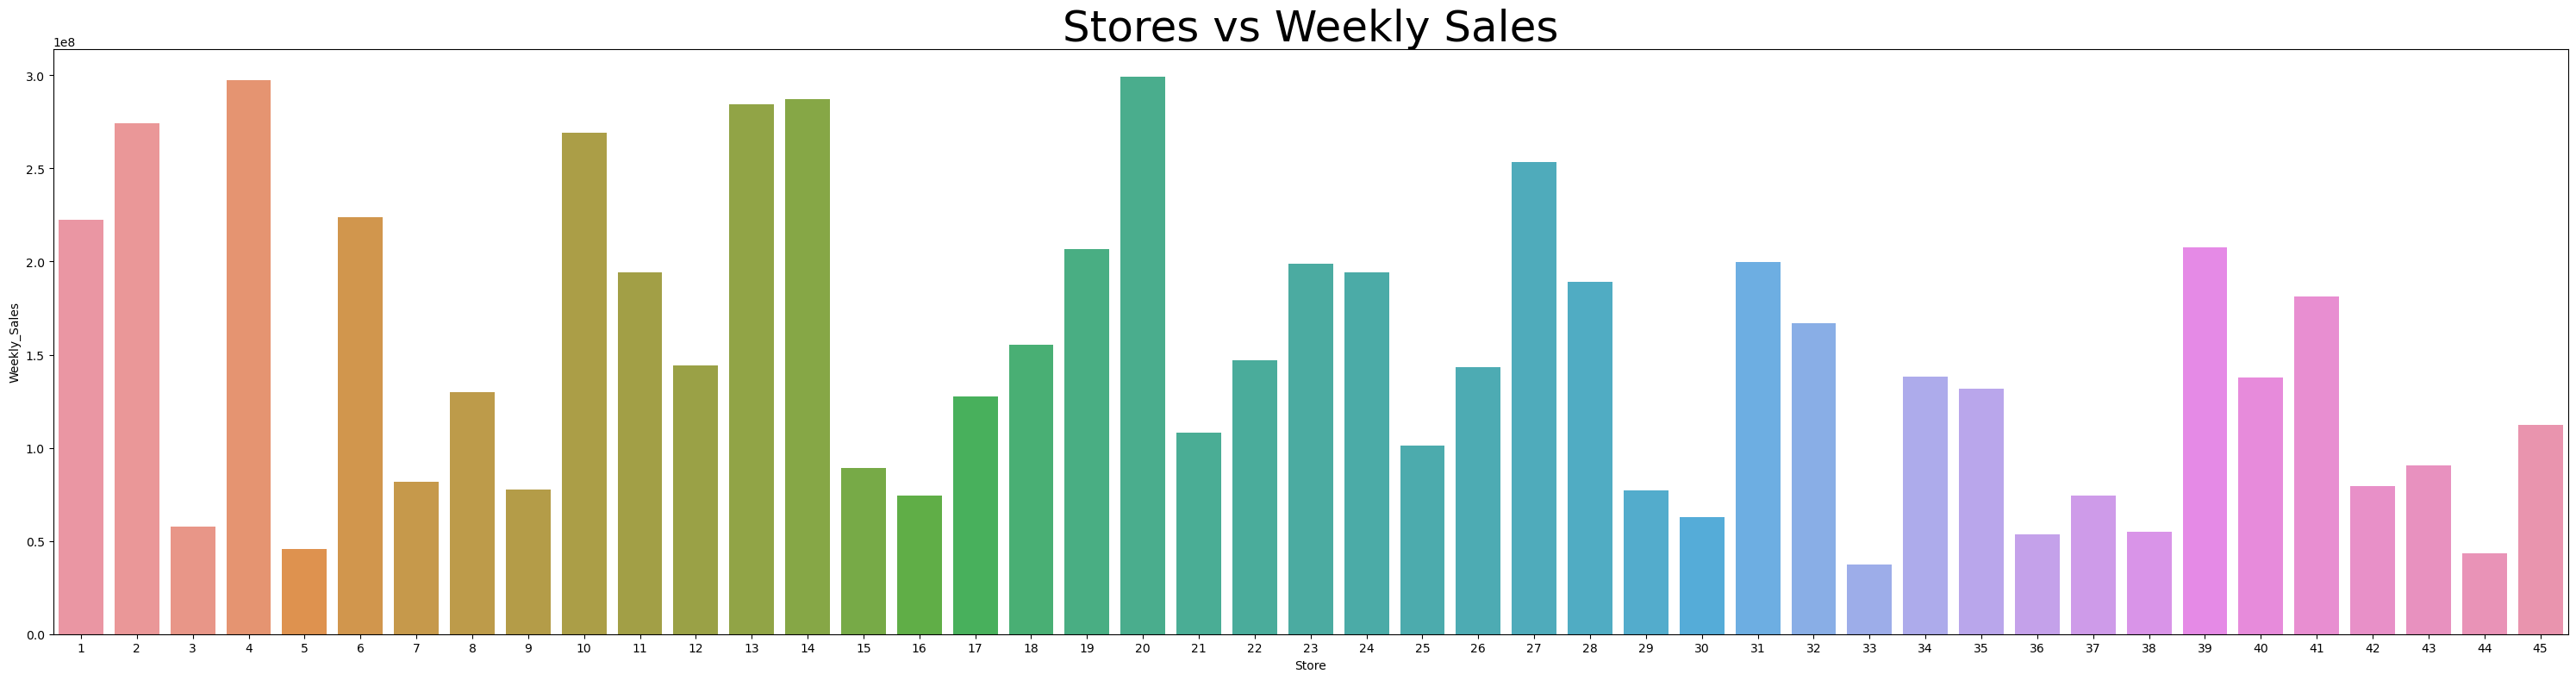

In [14]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title("Stores vs Weekly Sales",fontsize=36)
plt.tight_layout()
plt.show()

### 2. Plotting Sales Weekly

In [15]:
# Converting the data type of the date column to date time format from "object" Type
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df_week_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_week_sales=df_week_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_week_sales.head(5)

Date  Weekly_Sales
0 2010-01-10   42239875.87
1 2010-02-04   50423831.26
2 2010-02-07   48917484.50
3 2010-02-19   48276993.78
4 2010-02-26   43968571.13

Text(0, 0.5, 'Sales')

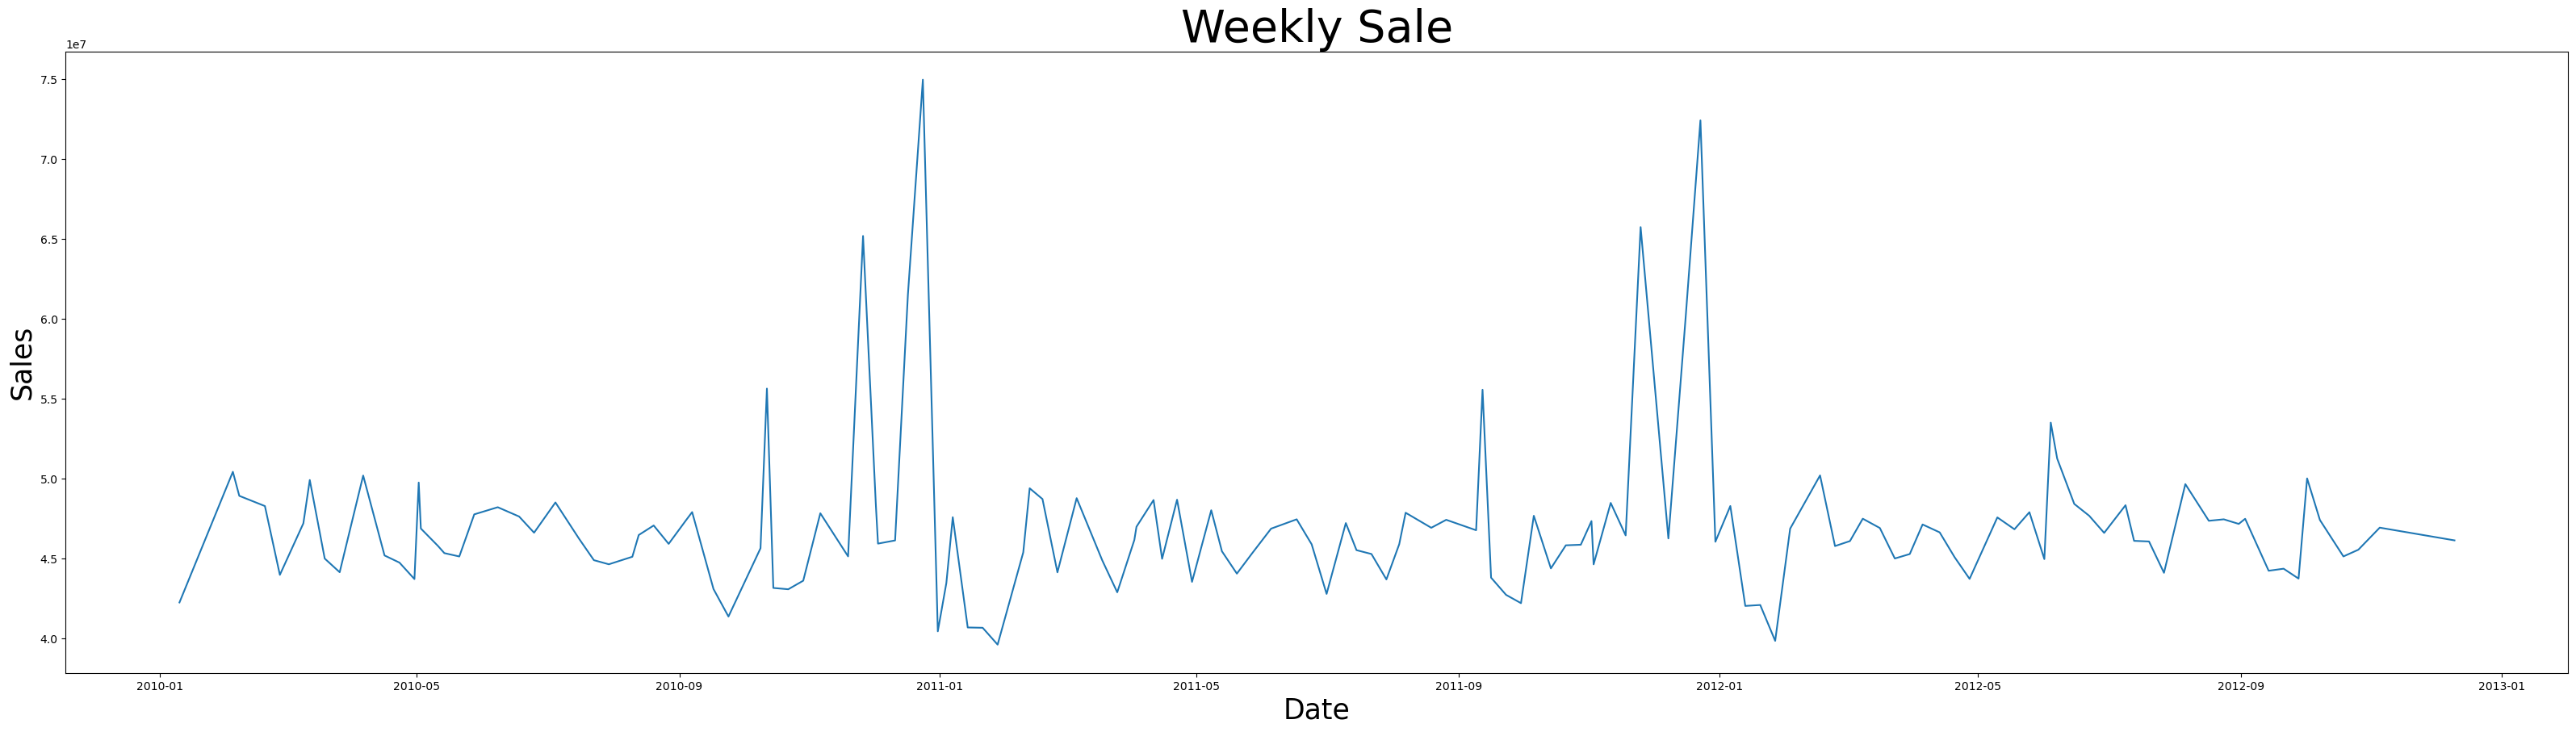

In [17]:
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=df_week_sales) # line plot
plt.title('Weekly Sale',fontsize=40) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25)

- **Weekly Sales most of weeks are consolidating expect some quarters**
- **We will See what quarters they are**

### 3. Plotting Sales Quaterly

In [18]:
df['Quaterly']=df['Date'].dt.to_period('Q')

In [19]:
# creating a new dataframe by grouping the quarters with summation of the weekly sales
df_quarter_sales = df.groupby('Quaterly')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Quaterly', ylabel='Weekly_Sales'>

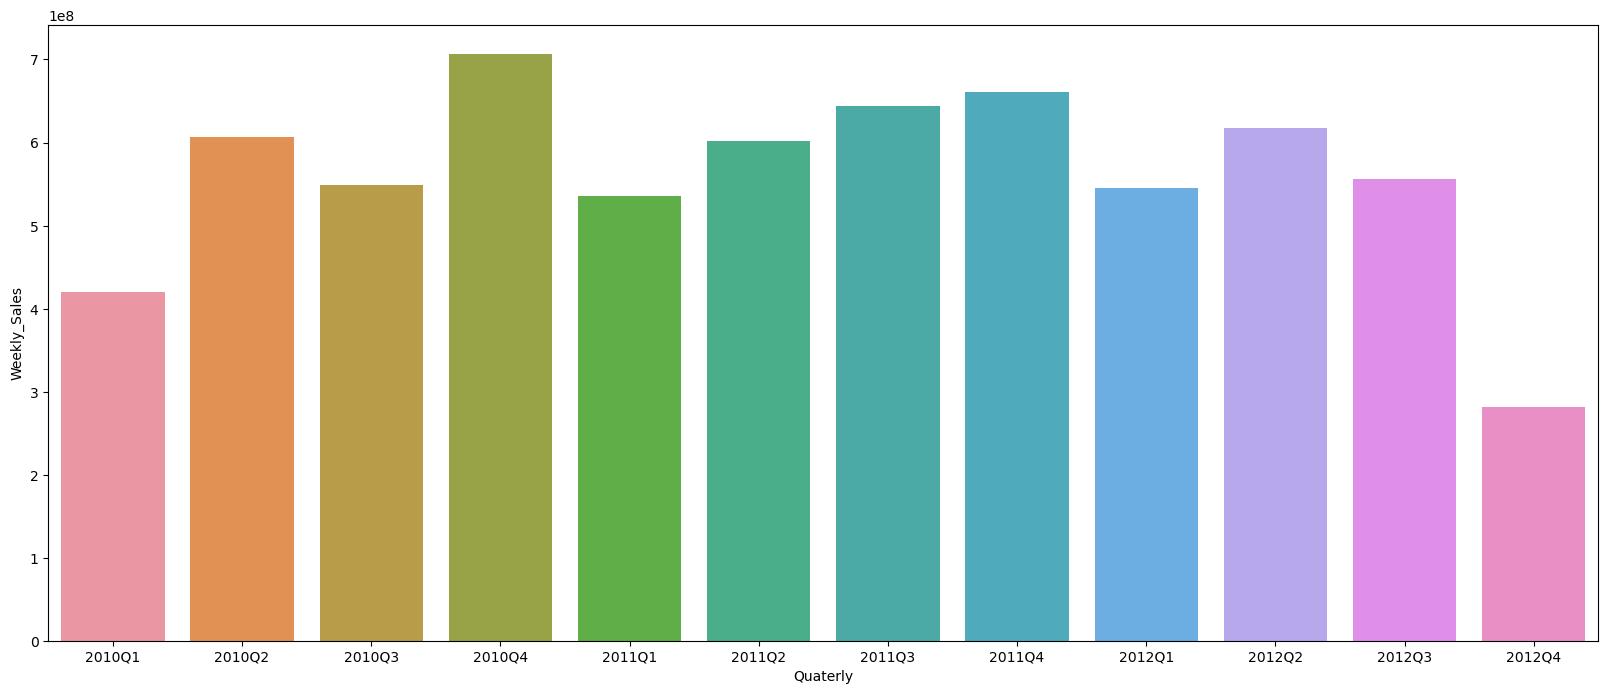

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x='Quaterly',y='Weekly_Sales',data=df_quarter_sales)

- **In 2010 the Q2,Q4 Performed well**
- **In 2011 also perofomnce is continued and Q4 is in peak sales**
- **In 2012 the perofomnce got distrubed and Q2 Sales are high and Q4 is turned in very bad performance comparing all 3 years**

### 4. Distribution of Sales in Holidays

In [21]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [22]:
df_holiday_sales=df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [23]:
df_holiday_sales

Holiday_Flag  Weekly_Sales
0             0  6.220935e+09
1             1  5.038284e+08

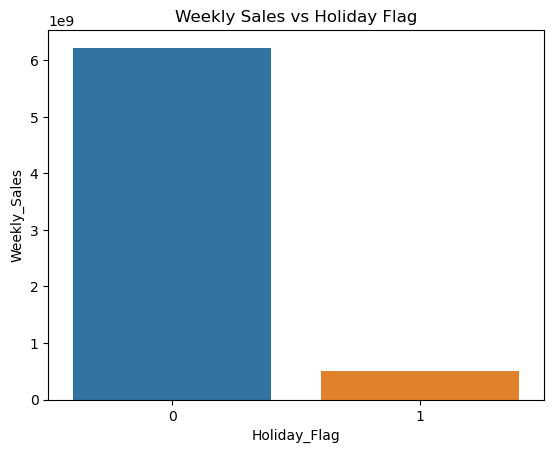

In [24]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_holiday_sales)
plt.title("Weekly Sales vs Holiday Flag")
plt.show()

- **The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days**

### 5. Variation of Weekly Sales with Respect to Temperature

In [25]:
df['Temperature'].min()

6.240000000000002

In [26]:
df['Temperature'].max()

100.14

In [27]:
bins=[0,25,50,75,100]
labels=['0-25','26-50','51-75','76-101']

In [28]:
df['Temp_Category']=pd.cut(df['Temperature'],bins=bins,labels=labels)

In [29]:
df['Temp_Category'].value_counts()

51-75     2982
26-50     1631
76-101    1596
0-25       224
Name: Temp_Category, dtype: int64

In [30]:
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

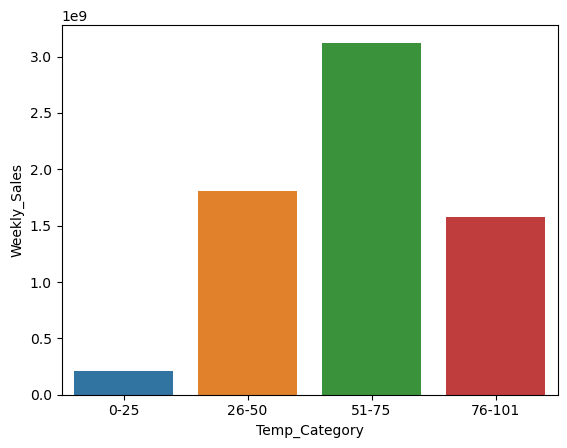

In [31]:
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

- **Stores perform well in moderate temp that is 26-50**
- **Sales went peaks in Moderate to High temp that is 51-75**
- **Sales went down in Very High and Low temp that is 0-25 & 76-100**

### 6. Weekly Sales with respect to Fuel Price

In [32]:
df['Fuel_Price'].min()

2.472

In [33]:
df['Fuel_Price'].max()

4.468

In [34]:
bins1 = [2,2.5,3,3.5,4,4.5]
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [35]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)
df['Fuel_Price_Cat'].value_counts()

3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: Fuel_Price_Cat, dtype: int64

In [36]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()
df_Fuel_Price_Sales

Fuel_Price_Cat  Weekly_Sales
0          2-2.5  4.702810e+05
1          2.6-3  1.945889e+09
2        3.1-3.5  1.620472e+09
3          3.6-4  2.738130e+09
4        4.1-4.5  4.198009e+08

<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

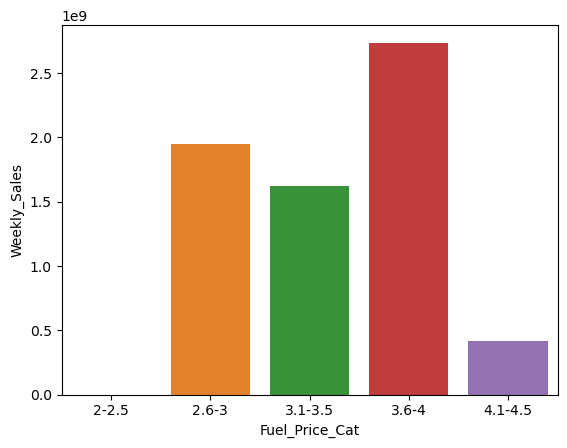

In [37]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)

- **When the fuel prices are modereate the performance of stores are also moderatly high**
- **But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to mitigate with inflation**
- **when fuel price went even high the purchase power of people went down. may be the inflation and increasing in goods price**

### 7. Weekly sales with respect to CPI

In [38]:
df['CPI'].min()

126.064

In [39]:
df['CPI'].max()

227.2328068

In [40]:
bins2=[125,155,185,215,245]
labels2=['125-155','156-185','186-215','216-245']

In [41]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [42]:
df['CPI_cat'].value_counts()

125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: CPI_cat, dtype: int64

In [43]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

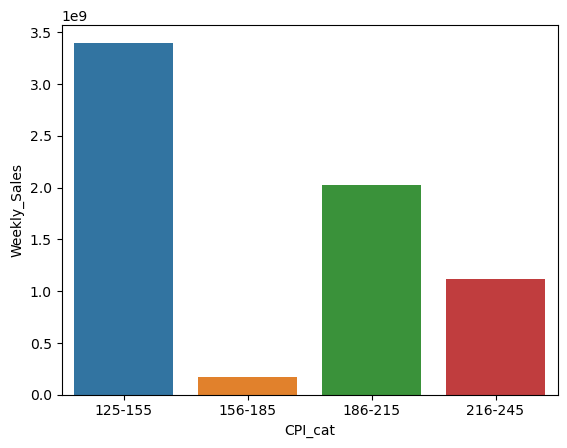

In [44]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

- **When inflation is lower the performance of stores are high**
- **In intial time of inflation the sale were drop signficantly**
- **In third level when inflation is high the people may scared for future prices and bought more grocery for future needs also
    eventually when the inflation went peaks the sales are went down**

### 8. Weekly Sales with respect to Unemployment

In [45]:
df['Unemployment'].min()

4.2945

In [46]:
df['Unemployment'].max()

11.218499999999999

In [47]:
bins3=[4,6,8,10,12]
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [48]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3)

In [49]:
df['Unemployment_Rate_Cat'].value_counts()

6.1-8      2795
8.1-10     2389
10.1-12     629
4-6         622
Name: Unemployment_Rate_Cat, dtype: int64

In [50]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index() 

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

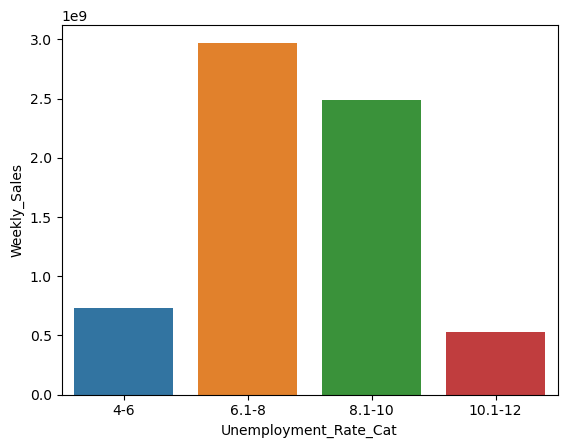

In [51]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

- **When the Unemployment rate is between the 6 to 10 the stores are performing well**
- **But whenever the Unemployment rate is increasing the sales went down**

## Statistical Analysis 

In [52]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

### Correlation Analysis

In [53]:
df_Encode = df[['Quaterly','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [54]:
df_Encode['Quaterly']=Le.fit_transform(df['Quaterly'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [55]:
corr_df = df_Encode.corr()

<Axes: >

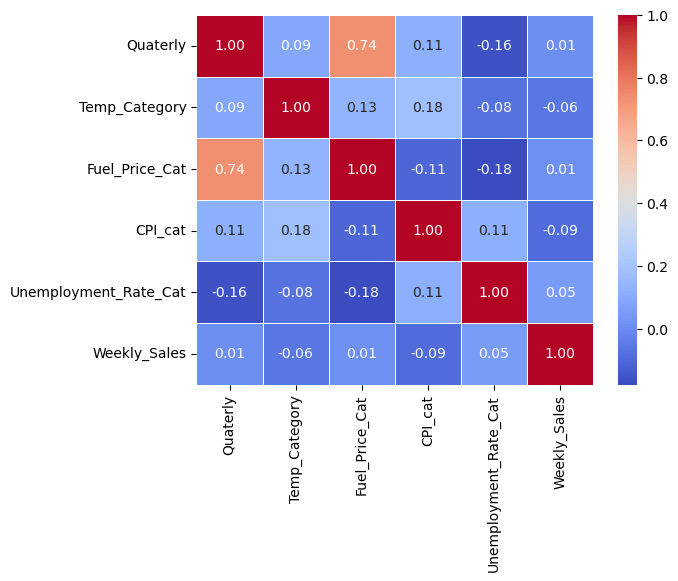

In [56]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

- **Quarters and Fuel Price having high correlation**
- **Because the fuel prices are also depend on the seasonal changes**

## Question and Answers

- **1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following**

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

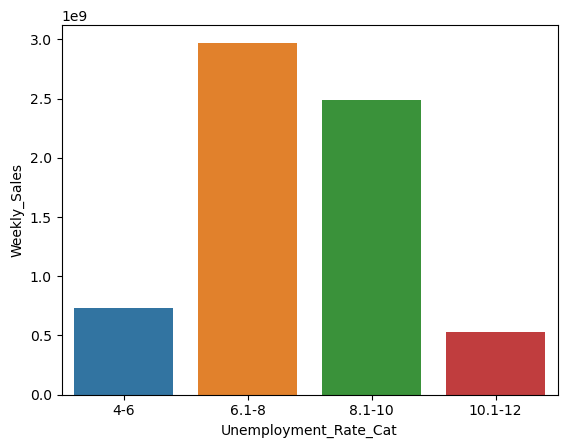

In [57]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

- **we can see that where the Unemployment Rate is too low and too high the sales are affected compared to moderate Unemployment Rate.**
- **So we need to find out the store which are suffering the most in this Unemployment rate category.**

In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat'])

In [59]:
df['Unemployment_Rate_Cat'].value_counts() 

2    2795
3    2389
0     629
1     622
Name: Unemployment_Rate_Cat, dtype: int64

In [60]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [61]:
sales_unemp_store

Store  Weekly_Sales
0       4  1.782381e+08
1       5  1.416884e+07
2       6  4.684711e+07
3       8  3.923392e+07
4       9  2.397403e+07
5      12  1.442872e+08
6      13  6.152466e+07
7      16  2.016068e+06
8      17  1.623276e+07
9      23  1.987367e+08
10     28  1.892637e+08
11     29  3.276784e+07
12     33  2.299155e+06
13     34  6.496434e+07
14     38  5.515963e+07
15     40  1.378703e+08
16     43  4.080224e+07
17     44  1.418737e+07

In [62]:
print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate is listed Below : 


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [63]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


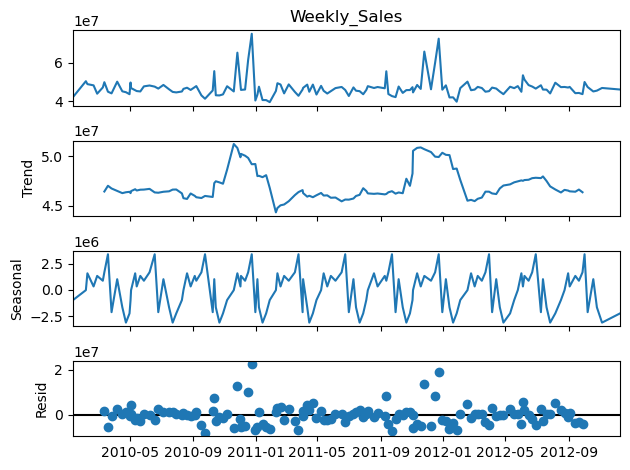

In [64]:
print(sales_decomposition.plot())

- **As we can see in the trend component there is seasonal spikes from 2010-09th month upto 2011-01, then after again in 2011-09th month to 2012-01 there is a second seasonal spike, but in 2012 year there is not that much spike**
- **its winter season, and the Temperature may impact the sales, but we will cross check this guess**

In [65]:
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True) # Setting the Date column as an Index
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


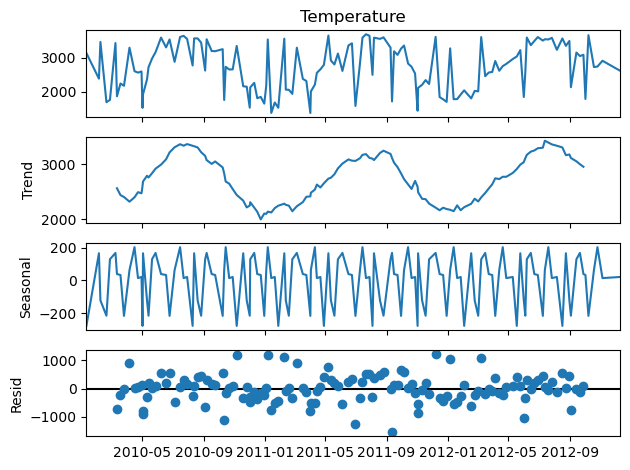

In [66]:
print(Temperature_decomposition.plot())

- **There a seasonal downward trend is observed in the tempearature data starting from September 2010 until January  2011. Subsequently, there's a gradual increase. However, from September 2011, temperatures start to decline again.There can be increased demand for winter-related products such as clothing, heating equipment, and seasonal items like snow shovels or holiday decorations.**

- **For Weekly Sales data trend, there is a noticeable increase in sales starting from September 2010, followed by a seasonal upward trend until January 2011. Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from September 2011 to January 2012.**

- **This period includes major holidays such as Thanksgiving, Black Friday, Christmas, and New Year's, which are significant shopping events. Consumers tend to spend more on gifts, decorations, food, and other holiday-related items during these times.Retailers often run extensive sales promotions, discounts, and marketing campaigns during this period to attract customers.Many people receive year-end bonuses or other financial incentives at the end of the year, which can increase their spending power during the holiday season**

### c. Does temperature affect the weekly sales in any manner?

- **For answering this qustion we need plot the correlation between the plots**
- **And we alrdey know that Temperature and weekly sales are negativily correlated while finding the answer for B. qustion. so we will confirm that by plotting the correlation values on heatmap**

In [67]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

In [68]:
df_temp_sales_correlation =df_temp_sales.corr()

<Axes: >

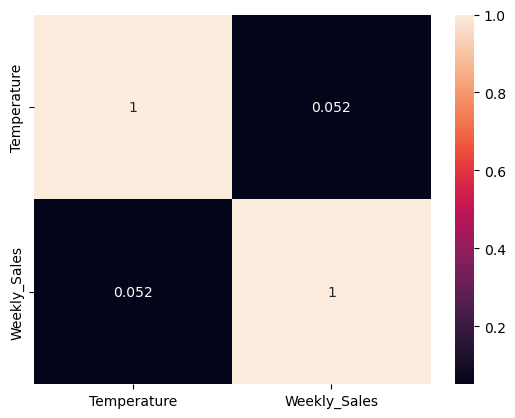

In [69]:
sns.heatmap(df_temp_sales_correlation,annot=True)

- **as we guess there is a negative correlation between the temperature and weekly sales
so the answer for qustion c: Yes there is a Nagative correlation and the Temperature is affecting the Weekly Sales**

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [70]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

In [71]:
df_cpi_sales_correlation =df_cpi_sales.corr()

<Axes: >

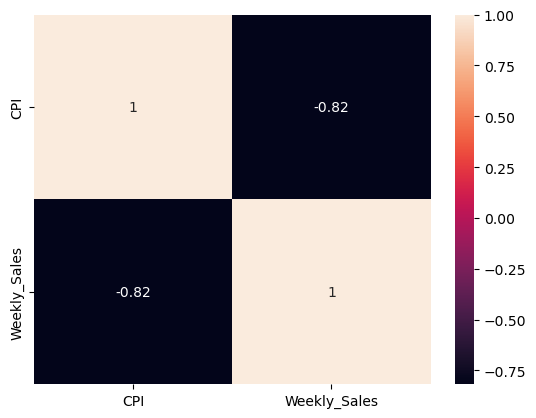

In [72]:
sns.heatmap(df_cpi_sales_correlation,annot=True)

- **there is a negative correlation between the CPI and weekly sales**
- **so the answer for qustion D: Yes there is a Negative correlation and the CPI is affecting the Weekly Sales
we can see that in below graph as well. when the CPI increasing the sales are down** 

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

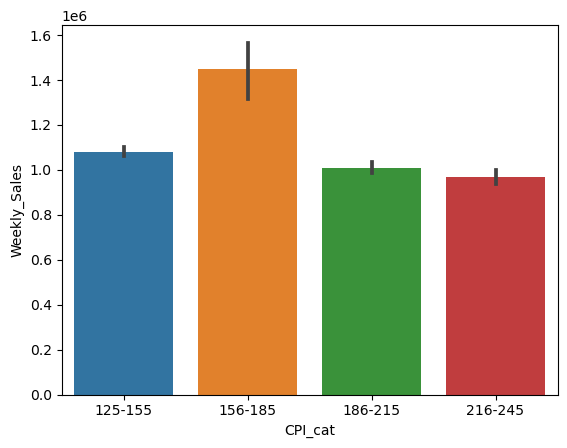

In [73]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

### e. Top performing stores according to the historical data.

In [74]:
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
top_10_Sale_Store

Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08
9      10  2.692807e+08
26     27  2.534795e+08
5       6  2.237489e+08
0       1  2.224028e+08
38     39  2.074455e+08

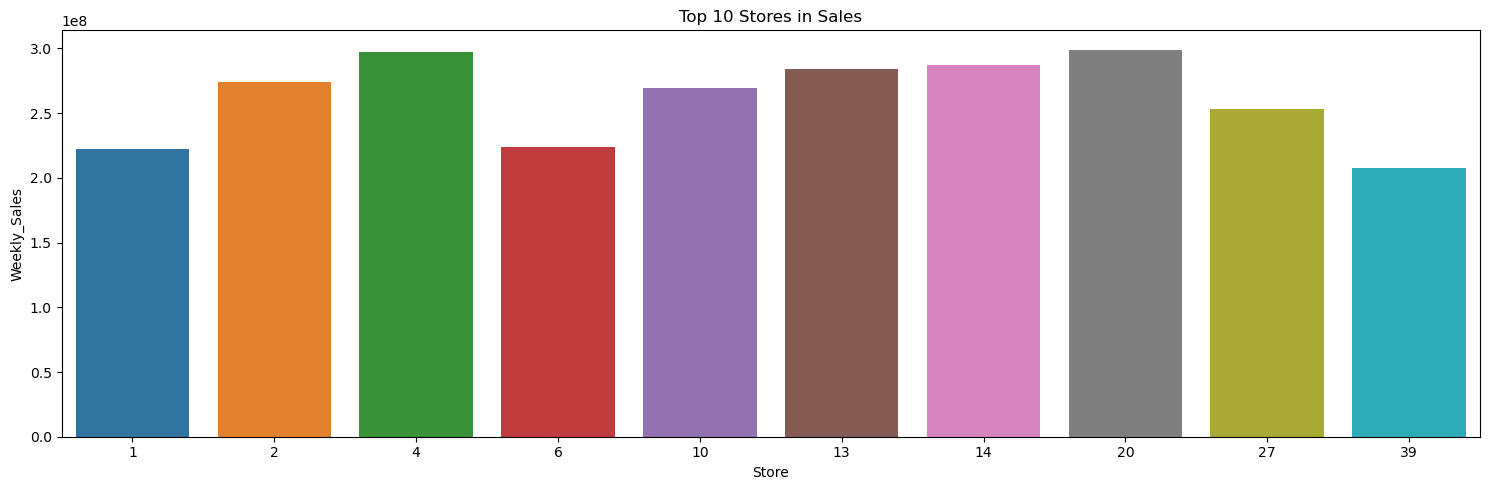

In [75]:
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show()

- **The Stores 4,20,14 is having the highest sales in top 10 stores segment**
- **The Stores 6,39 is having the Lowest sales in top 10 stores segment**

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [76]:
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store

Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31

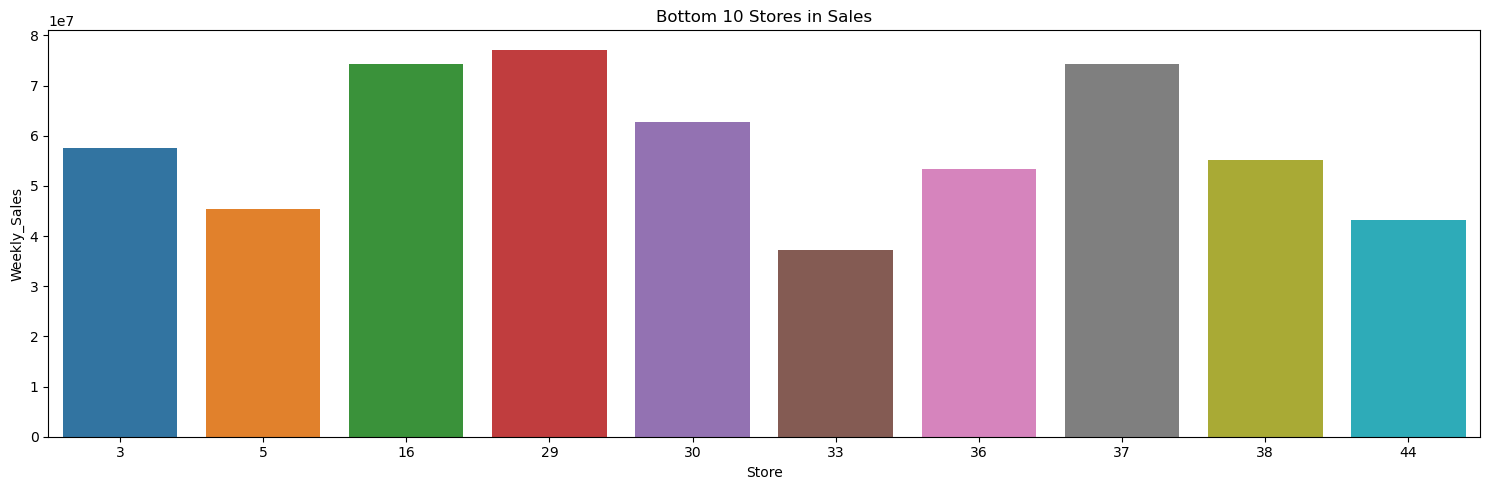

In [77]:
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show()

- **The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment**
- **The Stores 33,44 is having the highest sales in Bottom 10 stores segment**

### Finding The significance difference
- **for getting the signficant difference between top and bottom performing stores**
- **we will use t-test weather it has a significant difference or not**

In [78]:
from scipy.stats import ttest_ind # Importing the ttest_ind.. this helps us to compare mean between the two indipendent groups
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [79]:
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 7.079291347377579e-13


In [80]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 203807667.66124997


  # Prediction using ARIMA Model

In [81]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [82]:
df_stores_sales.set_index('Date',inplace=True)

In [83]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller for check the data stationarity

# check for stationarity
def adf_test(series, title=''): # creating a function

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [84]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.797936e+00
p-value                 6.103233e-17
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


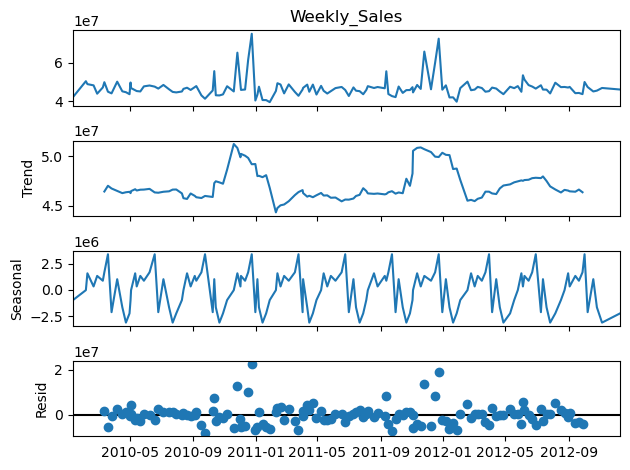

In [87]:
print(decomposition.plot())

In [88]:
mean1=df_stores_sales.rolling(window=10).mean()
std1=df_stores_sales.rolling(window=10).std() 

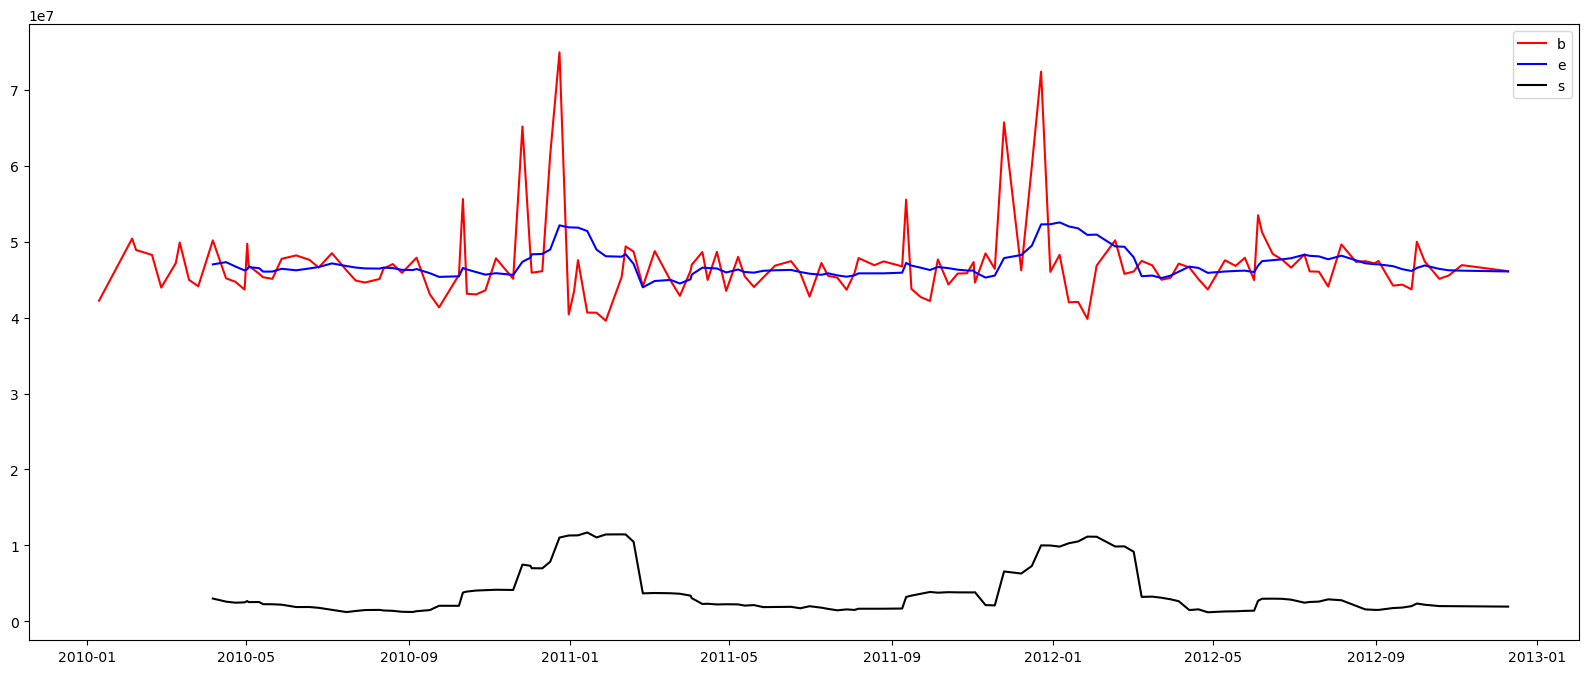

In [89]:
# plotting the rolling mean and standard deviation with respect to weekly sales

plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

- **Mean and sales are almost close.. but the mean is not capturing the seasonal spikes**

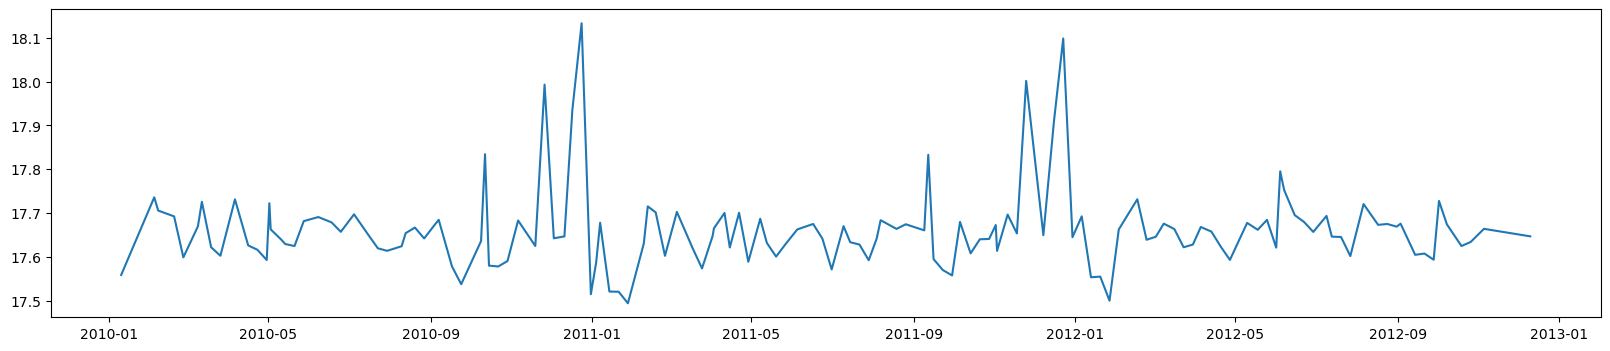

In [90]:
df_log = np.log(df_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

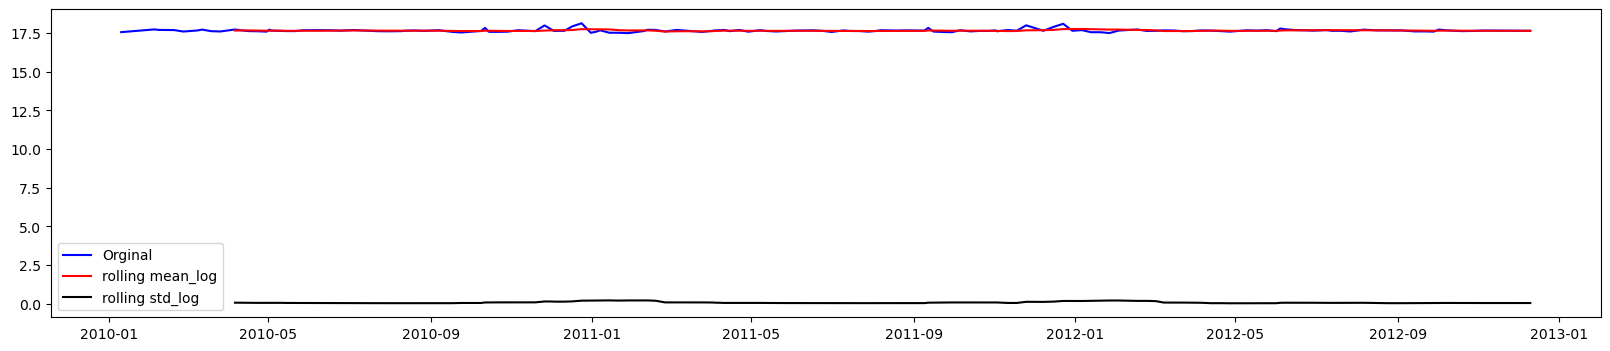

In [91]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [92]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.066957
2010-04-16     -0.044832
2010-04-23     -0.042851
2010-04-30     -0.054863
2010-05-02      0.071690
2010-05-03      0.005680
2010-05-11     -0.014800
2010-05-14     -0.015097
2010-05-21     -0.020031
2010-05-28      0.028887
2010-06-08      0.042246

In [93]:
df_new.dropna(inplace = True)

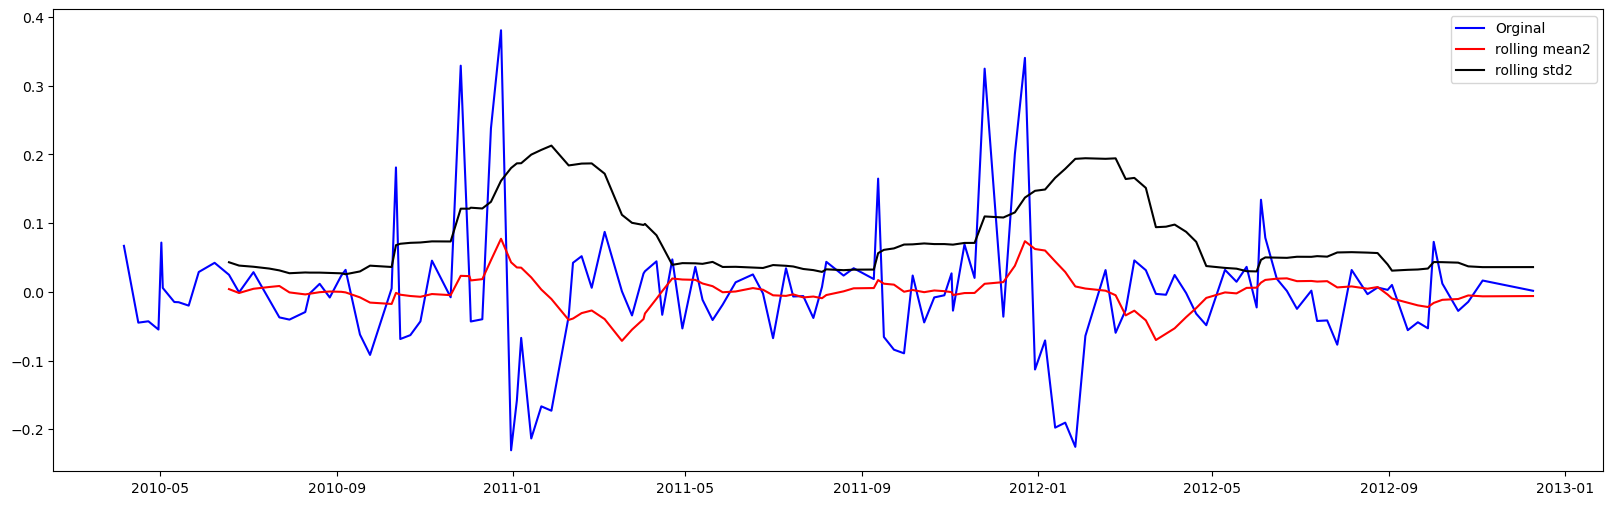

In [94]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [95]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.029840e+00
p-value                 5.482779e-15
# lags used             0.000000e+00
# observations          1.330000e+02
critical value (1%)    -3.480500e+00
critical value (5%)    -2.883528e+00
critical value (10%)   -2.578496e+00
Rejects the null hypothesis
Data has no unit root and is stationary


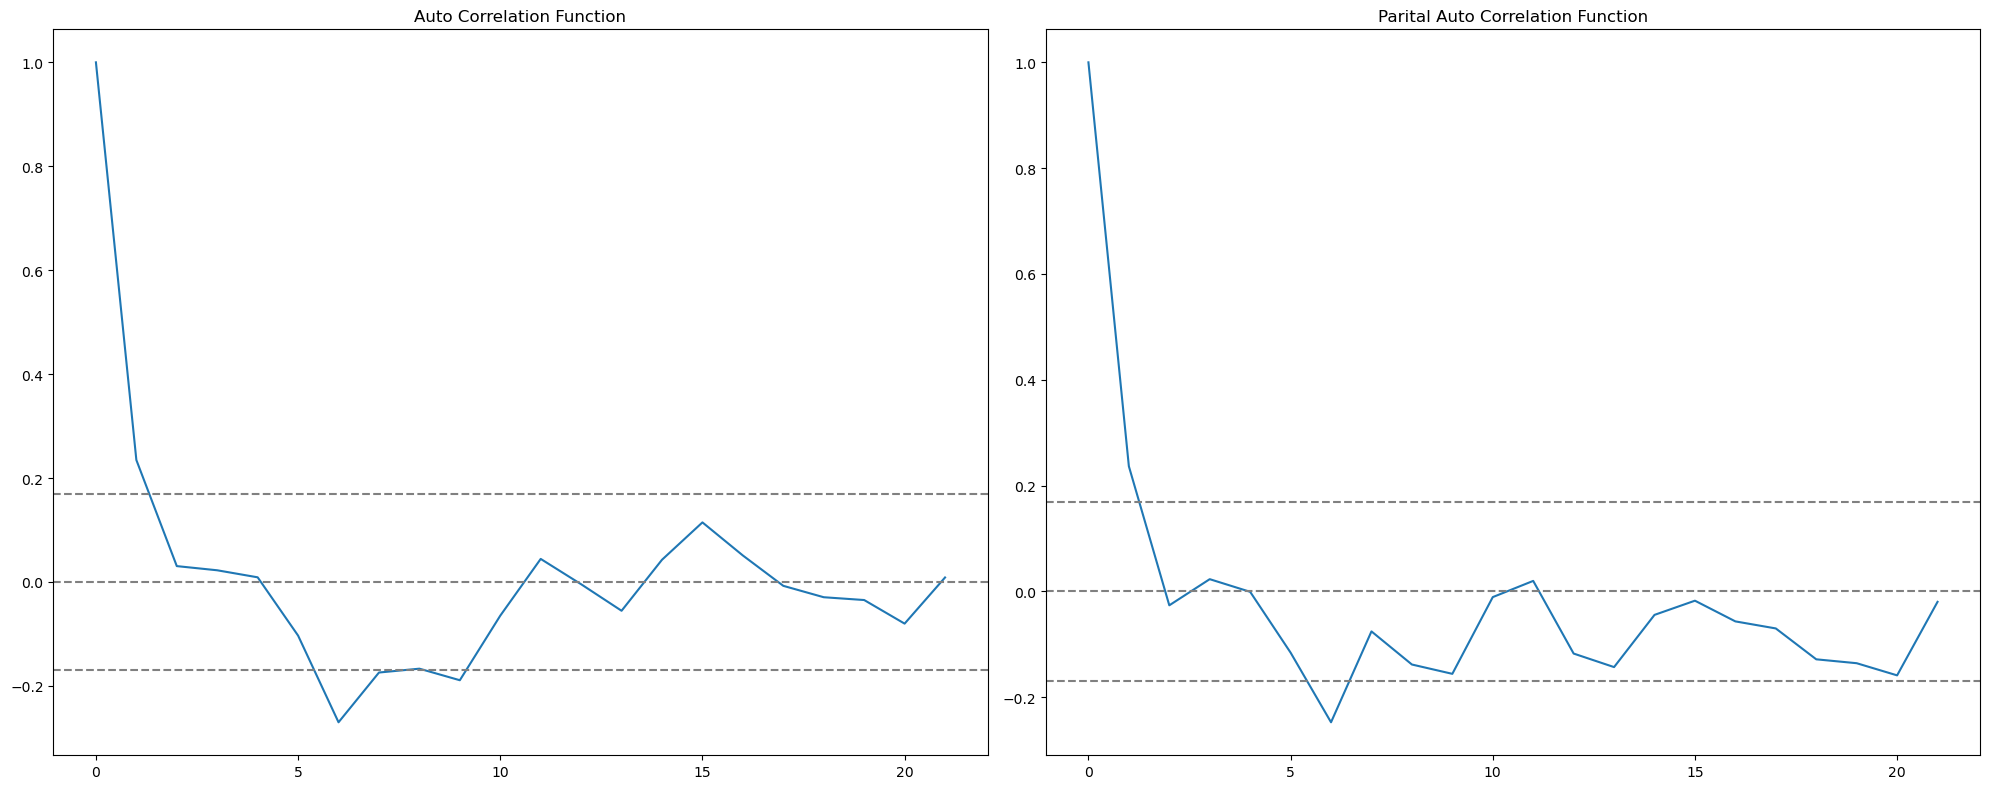

In [96]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

- **we got out p value as 5 and q value as 3**

In [97]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


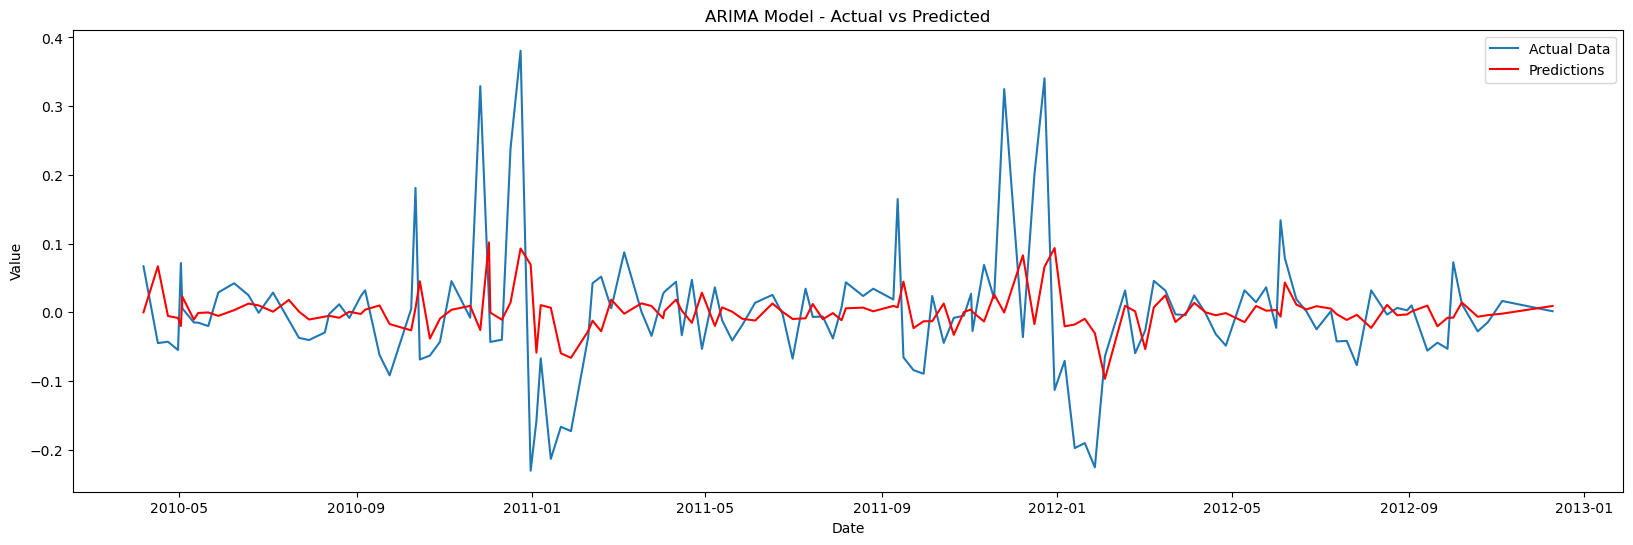

In [98]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.008268024633530574


In [100]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.09092867882868734


# Store Wise Prediction and Forecasting

## Store 1 Forecasting

In [101]:
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [102]:
store1_sales.set_index('Date',inplace=True)

In [103]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.595634e+00
p-value                 1.981888e-16
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [104]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

Figure(640x480)


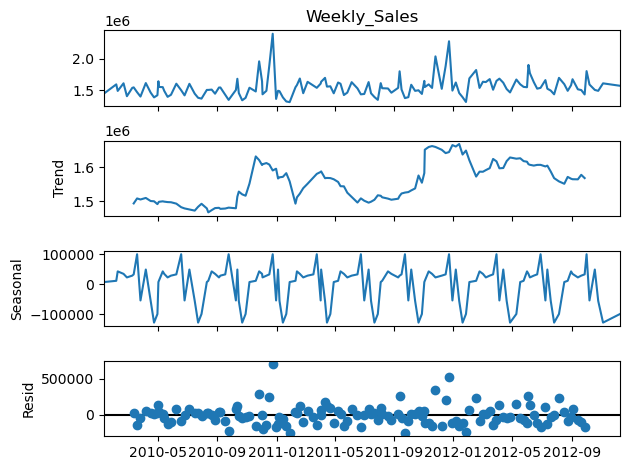

In [105]:
print(decomposition.plot())

In [106]:
mean1=store1_sales.rolling(window=10).mean()
std1=store1_sales.rolling(window=10).std()

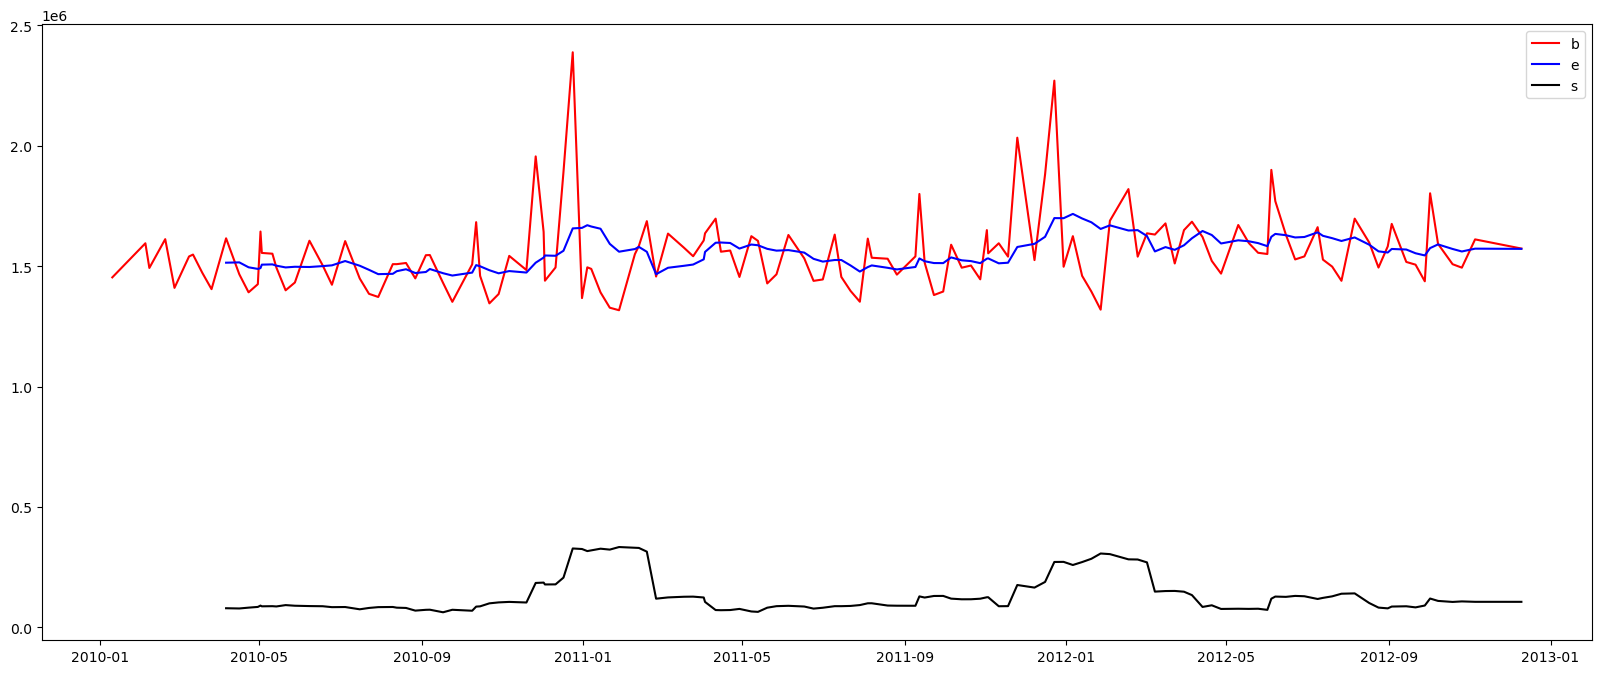

In [107]:
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

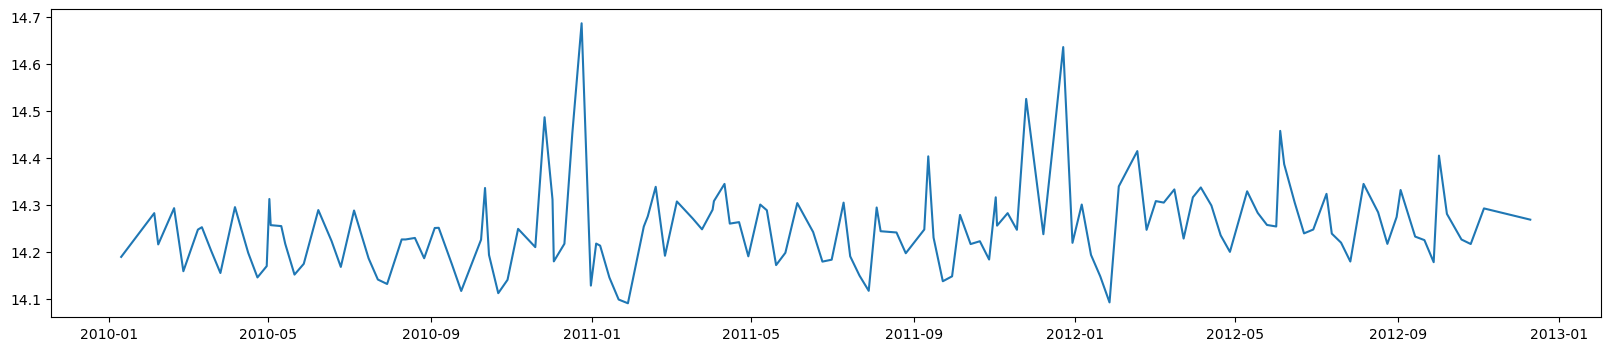

In [108]:
df_log = np.log(store1_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

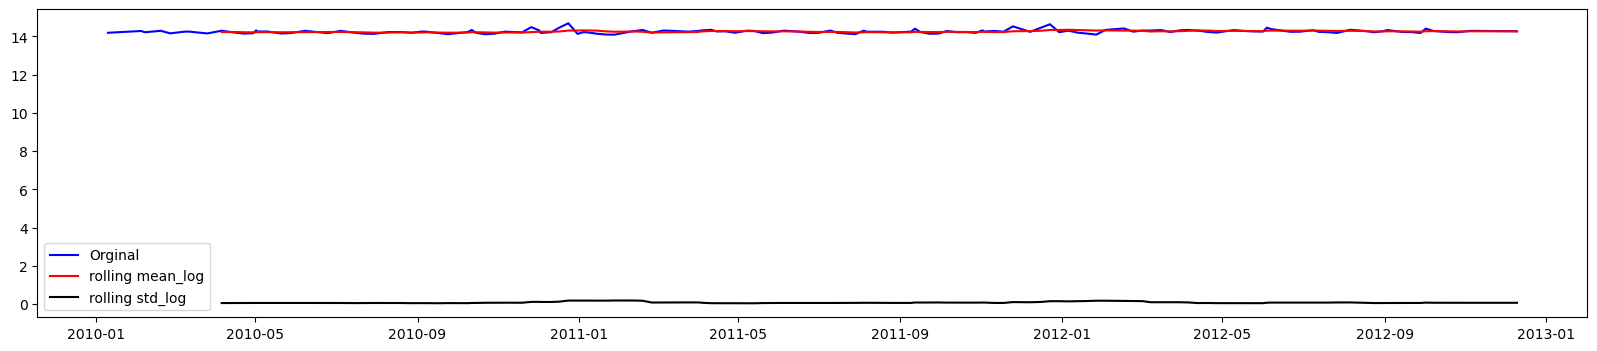

In [109]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [110]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.065950
2010-04-16     -0.032005
2010-04-23     -0.070710
2010-04-30     -0.042059
2010-05-02      0.098694
2010-05-03      0.033305
2010-05-11      0.030535
2010-05-14     -0.003628
2010-05-21     -0.063949
2010-05-28     -0.043008
2010-06-08      0.071925

In [111]:
df_new.dropna(inplace = True)

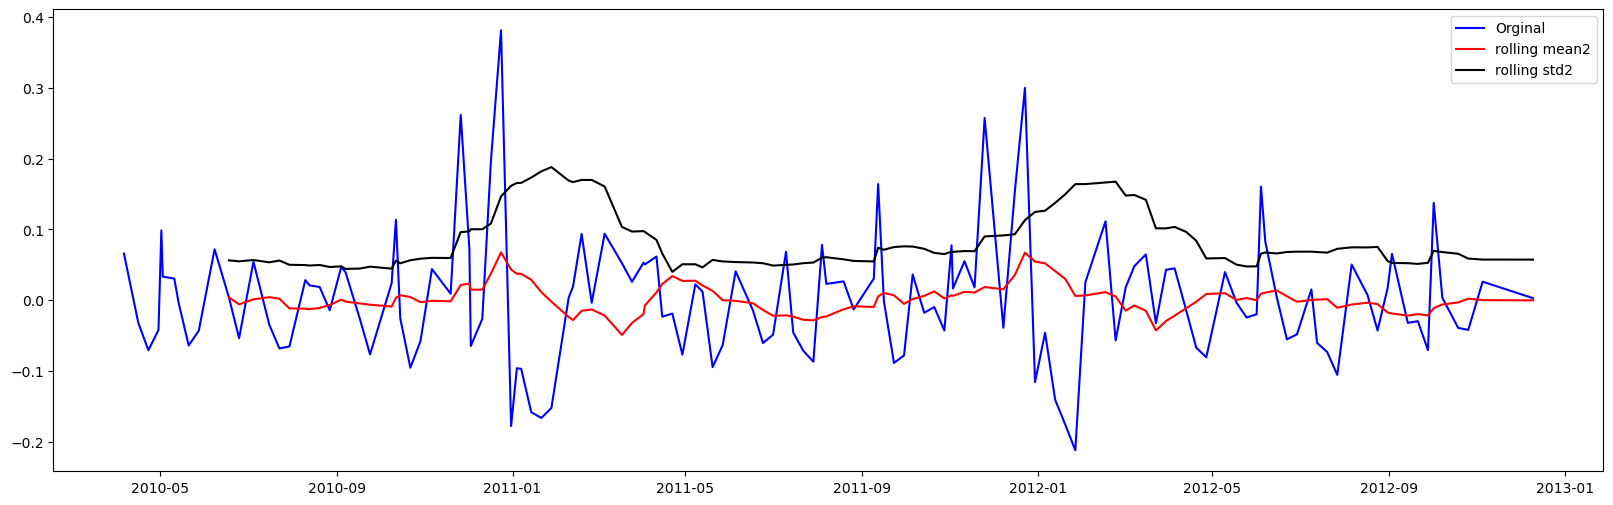

In [112]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [113]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.254118e+00
p-value                 4.381186e-08
# lags used             7.000000e+00
# observations          1.260000e+02
critical value (1%)    -3.483346e+00
critical value (5%)    -2.884766e+00
critical value (10%)   -2.579156e+00
Rejects the null hypothesis
Data has no unit root and is stationary


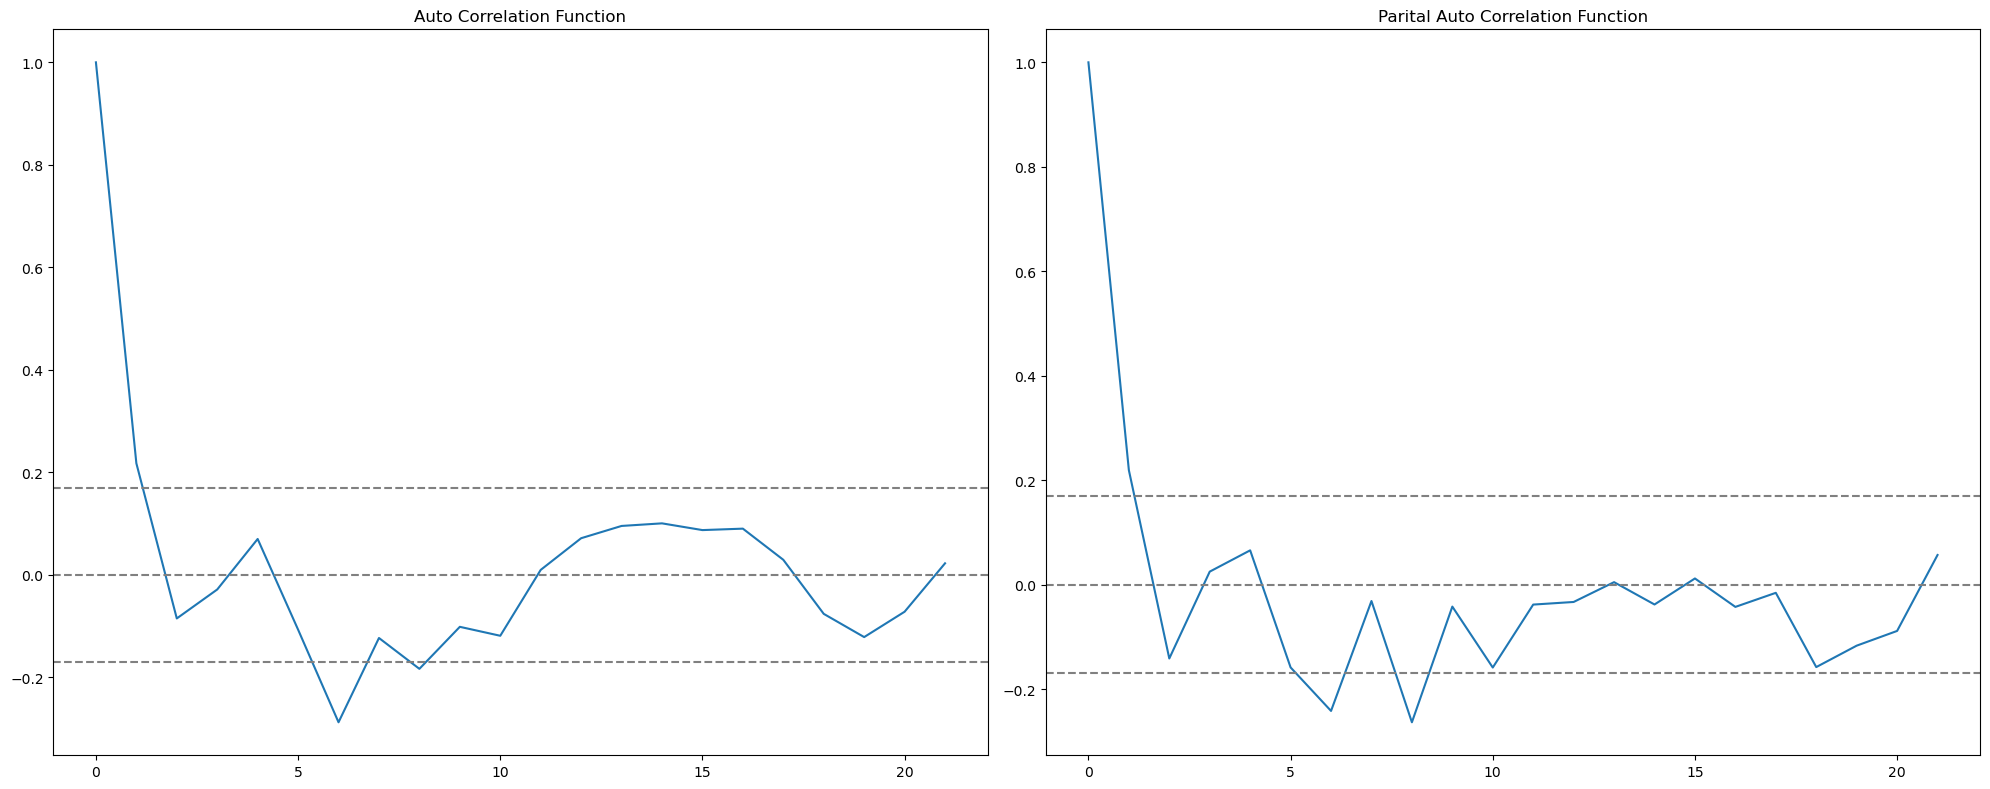

In [114]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [115]:
p, d, q = 2, 1, 2 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


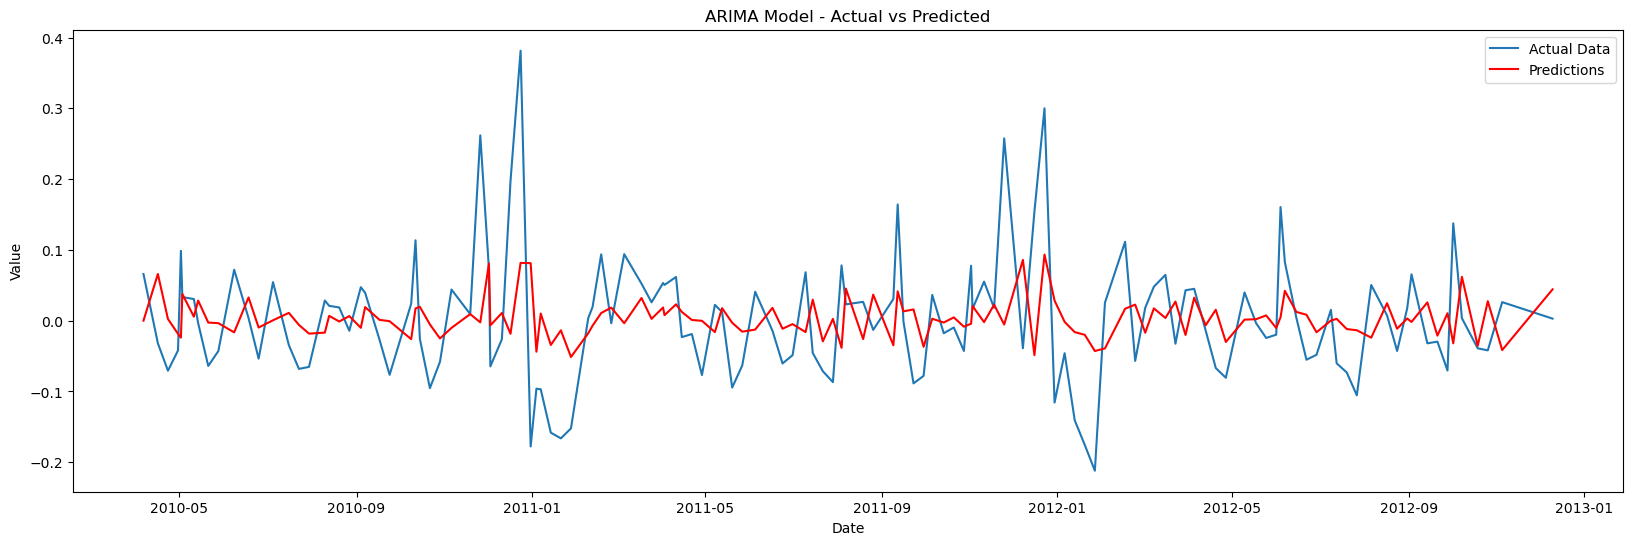

In [116]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.0074559877876906105
Root Mean Squared_Error  0.08634806186412415


In [118]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [119]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [120]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date',inplace=True)

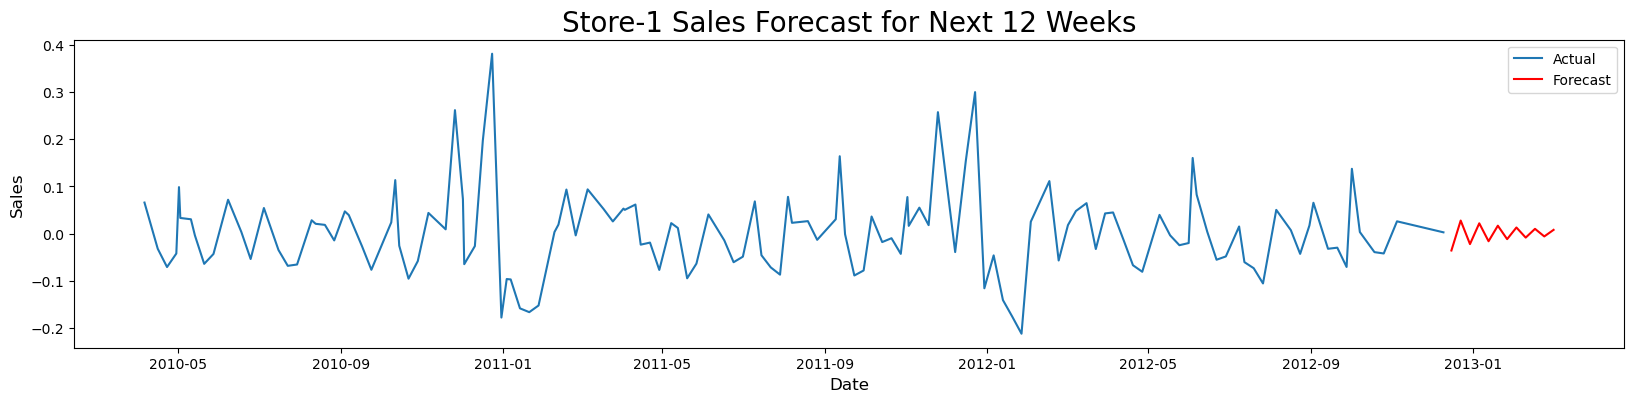

In [121]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 6 Forecasting

In [122]:
store6_sales=df[df['Store']==6].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [123]:
store6_sales.set_index('Date',inplace=True)

In [124]:
adf_test(store6_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.515776e+00
p-value                 3.160186e-16
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [125]:
decomposition=seasonal_decompose(store6_sales['Weekly_Sales'],period=13)

Figure(640x480)


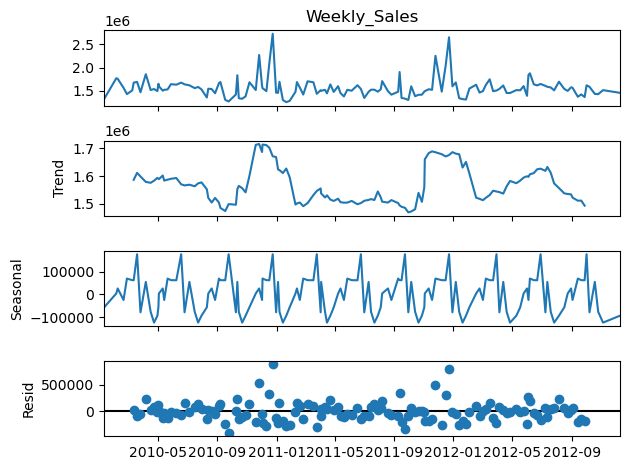

In [126]:
print(decomposition.plot())

In [127]:
mean1=store6_sales.rolling(window=10).mean()
std1=store6_sales.rolling(window=10).std()

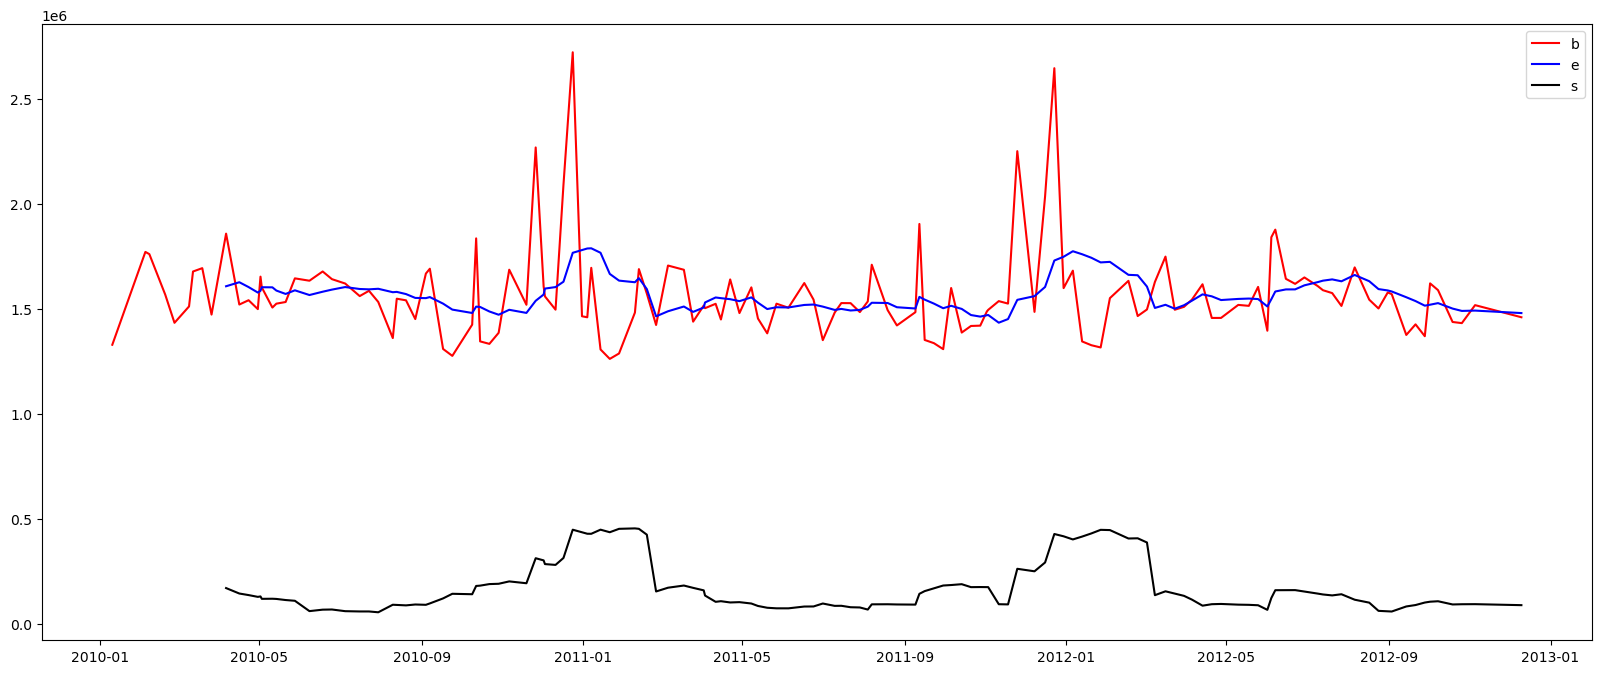

In [128]:
plt.figure(figsize=(20,8))
orig=plt.plot(store6_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

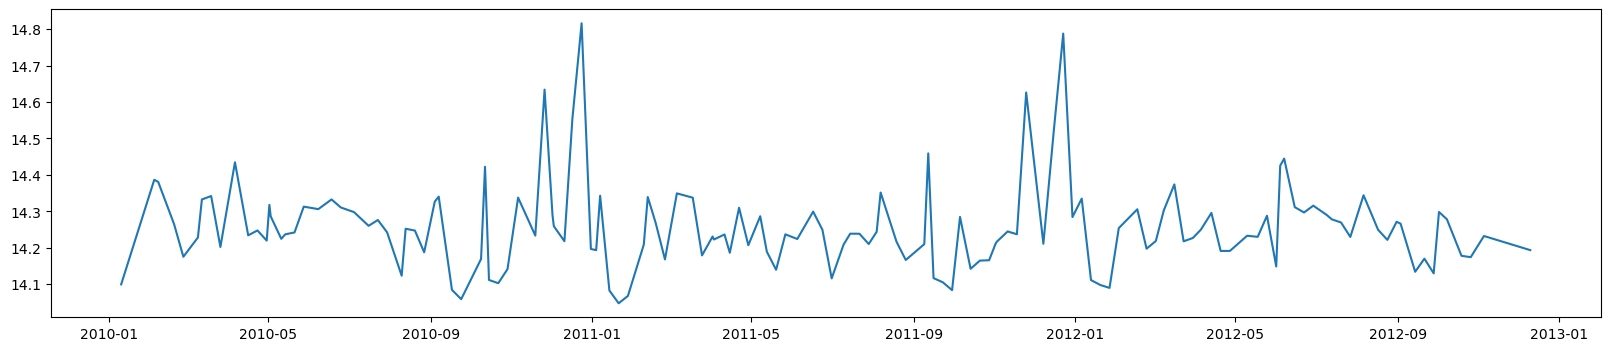

In [129]:
df_log = np.log(store6_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

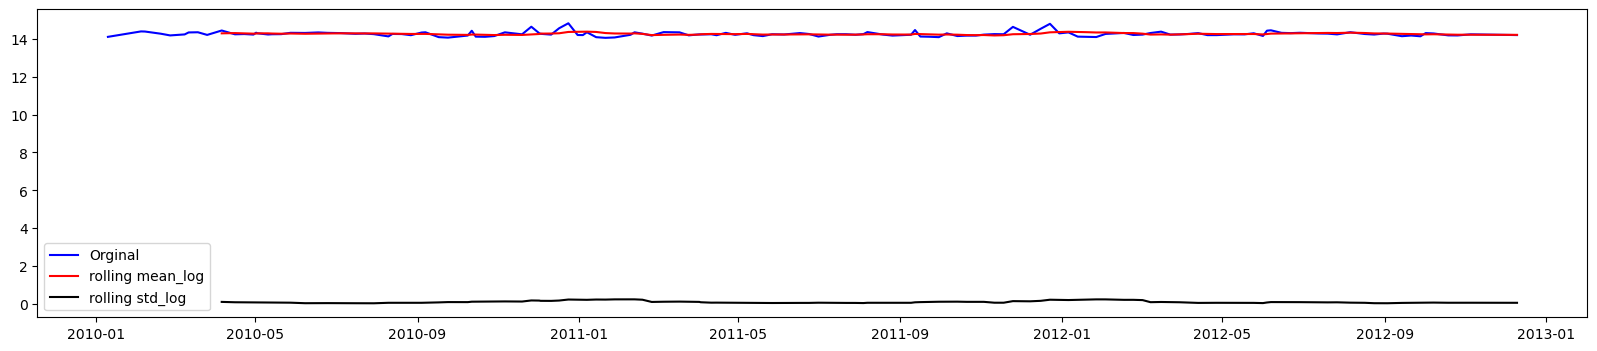

In [130]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [131]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.150018
2010-04-16     -0.063998
2010-04-23     -0.036631
2010-04-30     -0.048412
2010-05-02      0.044463
2010-05-03      0.001827
2010-05-11     -0.059569
2010-05-14     -0.037711
2010-05-21     -0.022555
2010-05-28      0.037253
2010-06-08      0.043261

In [132]:
df_new.dropna(inplace = True)

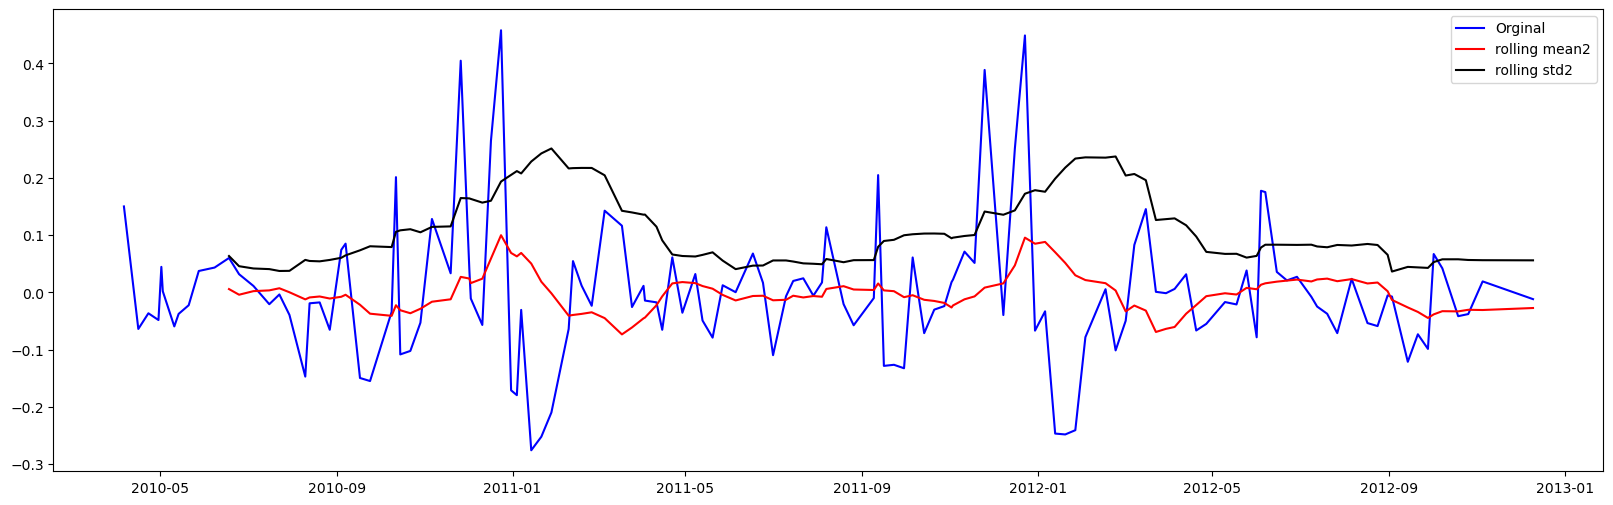

In [133]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [134]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.127540e+00
p-value                 8.556838e-08
# lags used             8.000000e+00
# observations          1.250000e+02
critical value (1%)    -3.483779e+00
critical value (5%)    -2.884954e+00
critical value (10%)   -2.579257e+00
Rejects the null hypothesis
Data has no unit root and is stationary


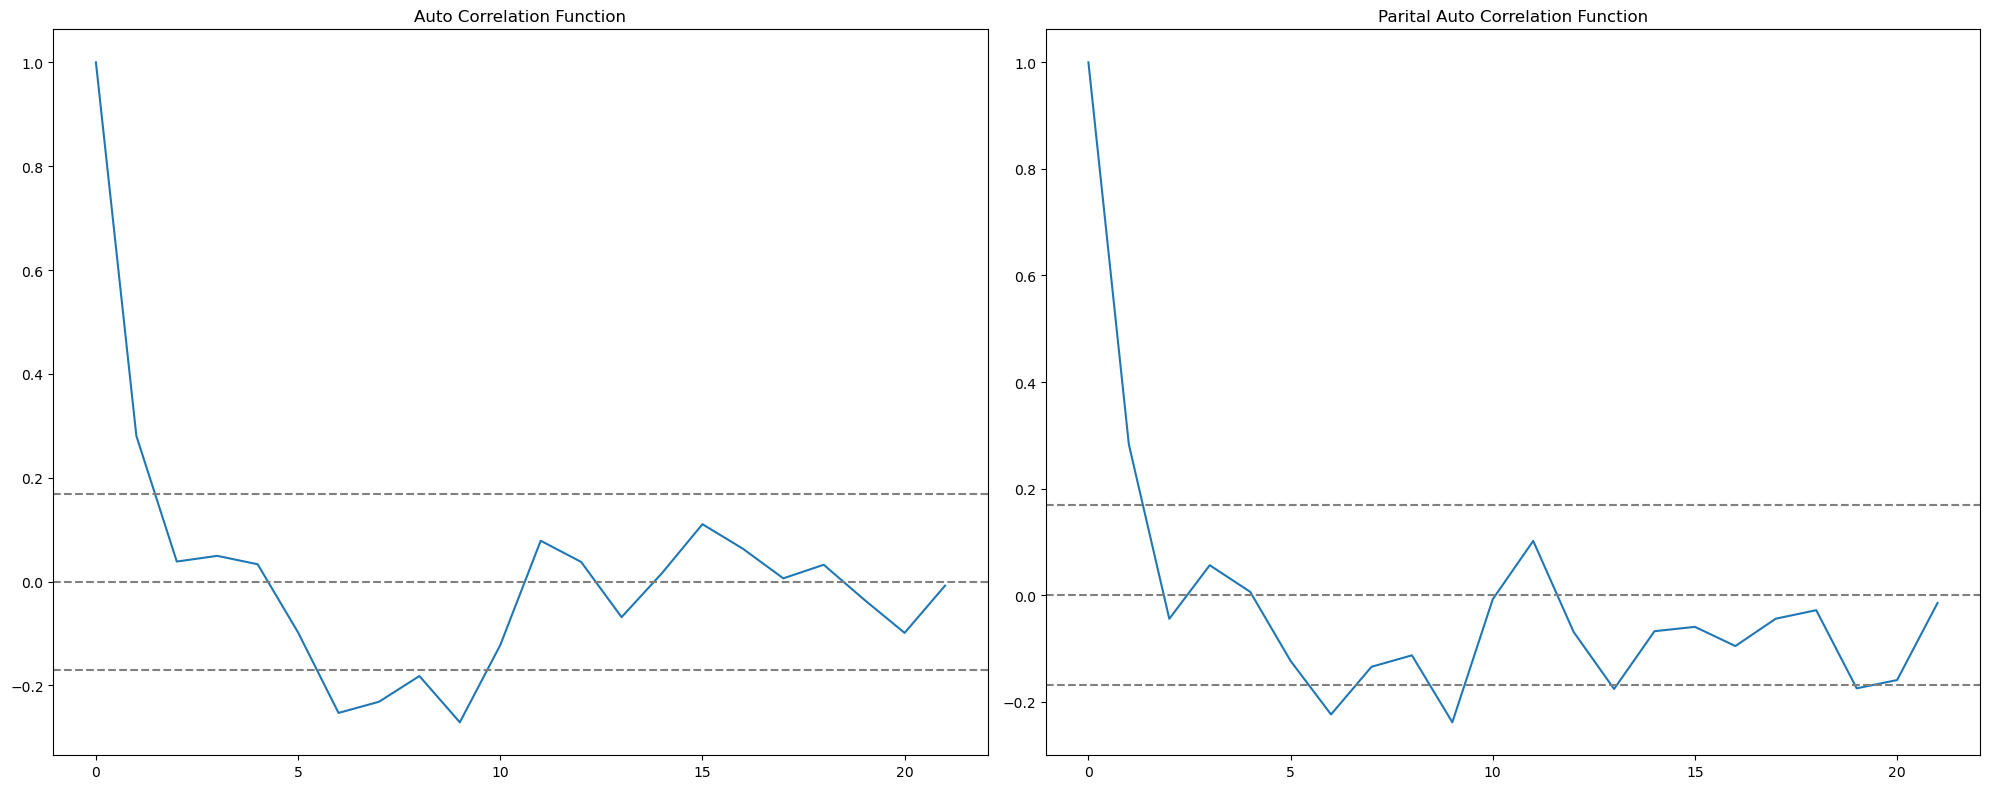

In [135]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [136]:
#pdq values are 4,1,3
p, d, q = 4, 1, 3 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


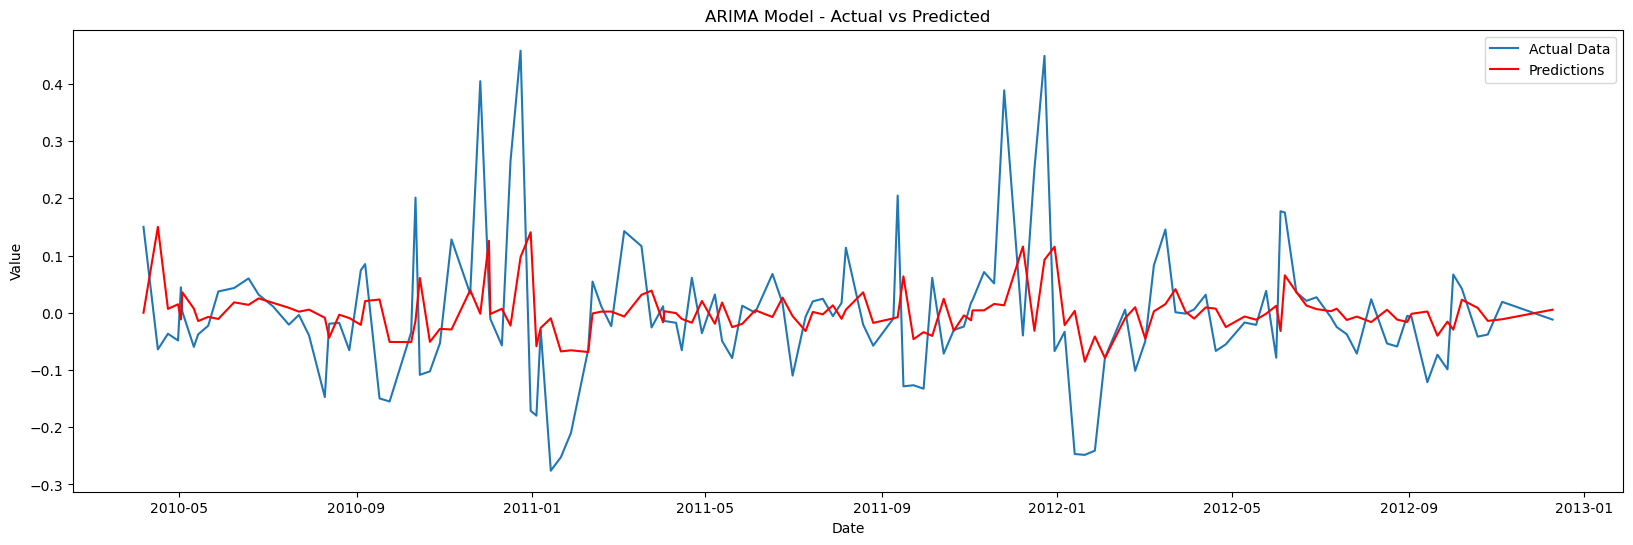

In [137]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [140]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.013566855971474575
Root Mean Squared_Error  0.11647684736236028


In [139]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [141]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [142]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [143]:
forecast_df.set_index('Date',inplace=True)

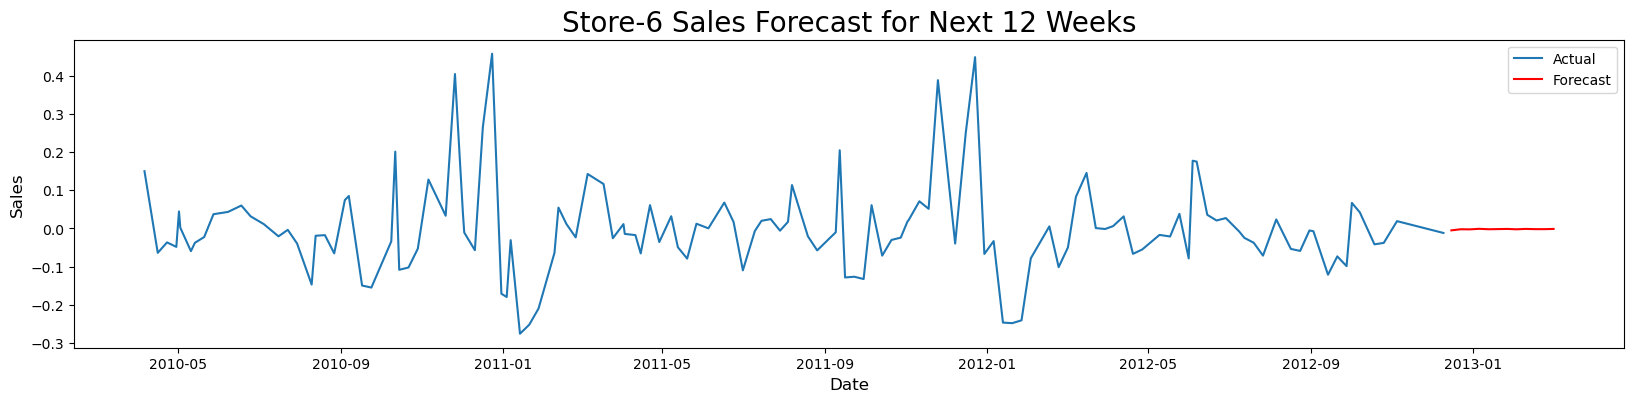

In [144]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-6 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 11 Forecasting

In [145]:
store11_sales=df[df['Store']==11].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [146]:
store11_sales.set_index('Date',inplace=True)

In [147]:
adf_test(store11_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.275603e+00
p-value                 1.291542e-15
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [148]:
decomposition=seasonal_decompose(store11_sales['Weekly_Sales'],period=13)

Figure(640x480)


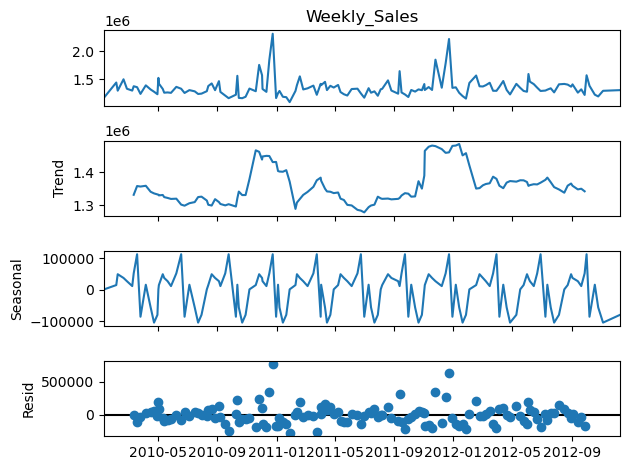

In [149]:
print(decomposition.plot())

In [150]:
mean1=store11_sales.rolling(window=10).mean()
std1=store11_sales.rolling(window=10).std()

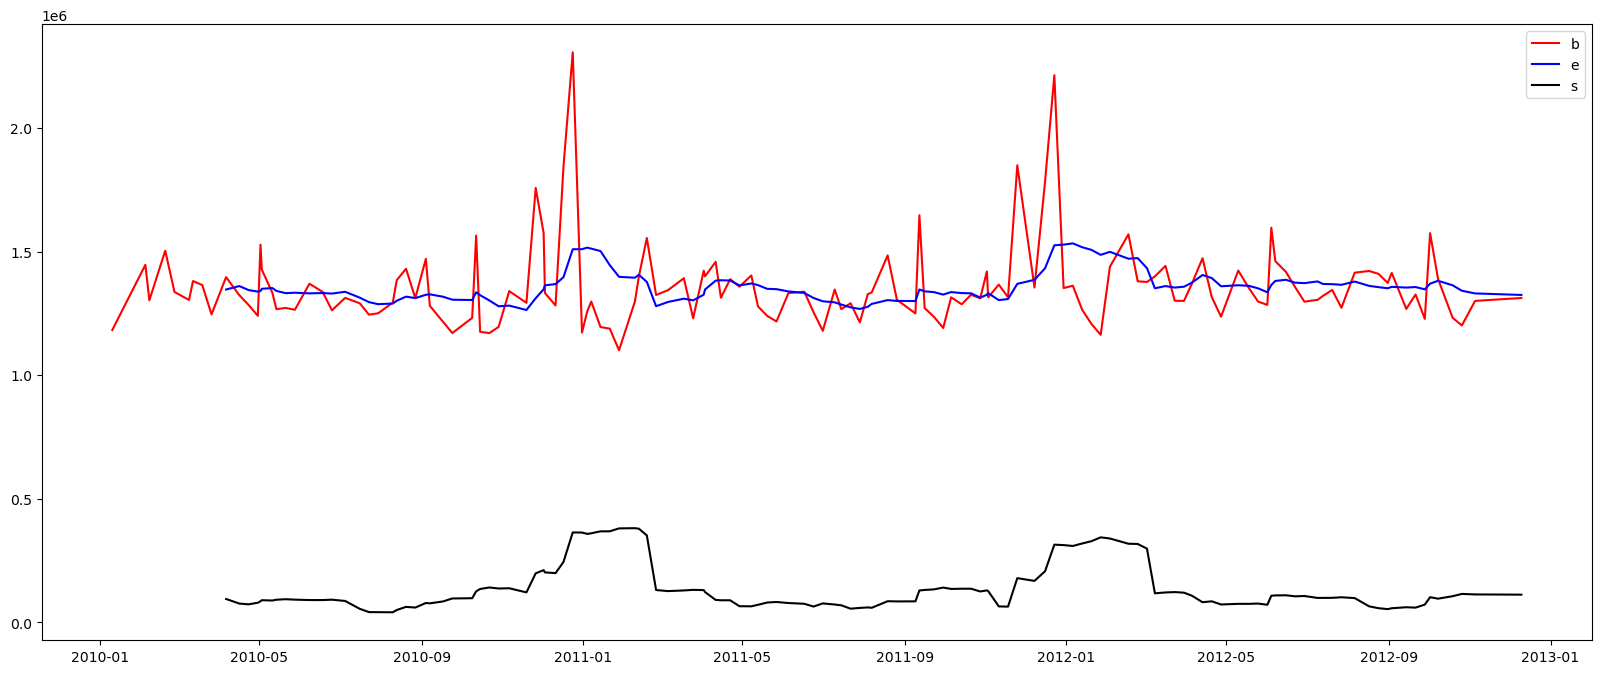

In [151]:
plt.figure(figsize=(20,8))
orig=plt.plot(store11_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

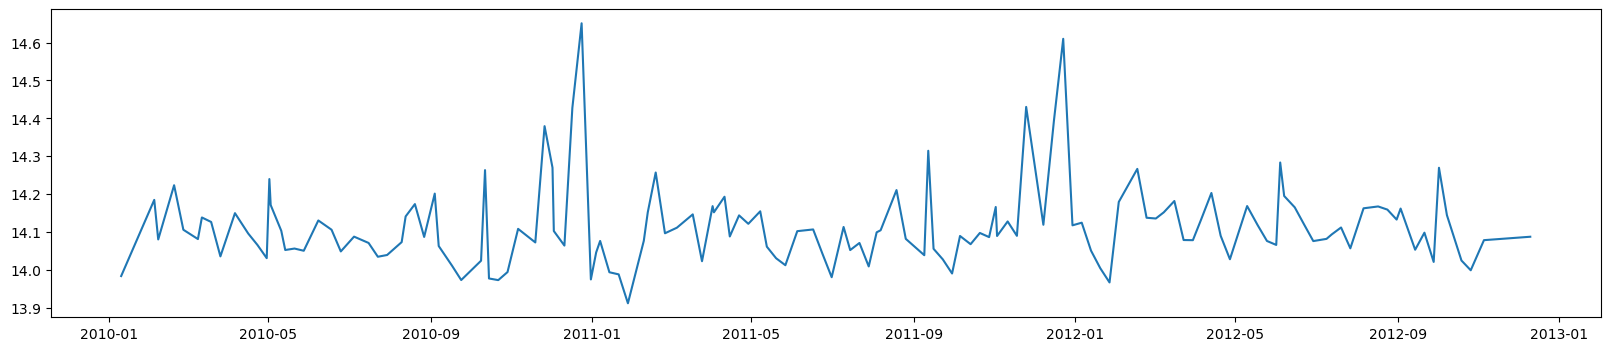

In [152]:
df_log = np.log(store11_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

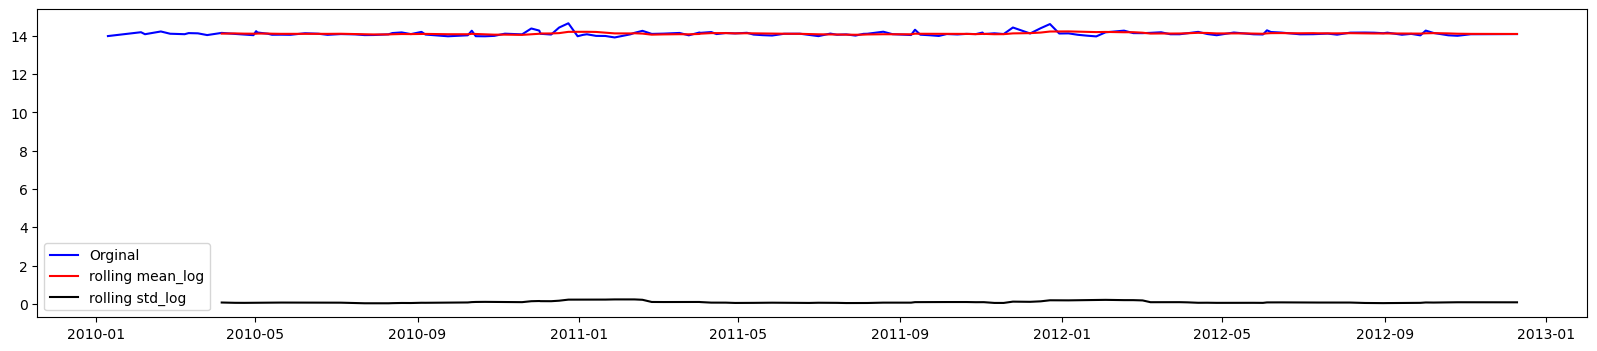

In [153]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [154]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.038796
2010-04-16     -0.026207
2010-04-23     -0.044579
2010-04-30     -0.074510
2010-05-02      0.132901
2010-05-03      0.057713
2010-05-11     -0.012533
2010-05-14     -0.054697
2010-05-21     -0.043849
2010-05-28     -0.051151
2010-06-08      0.030826

In [155]:
df_new.dropna(inplace = True)

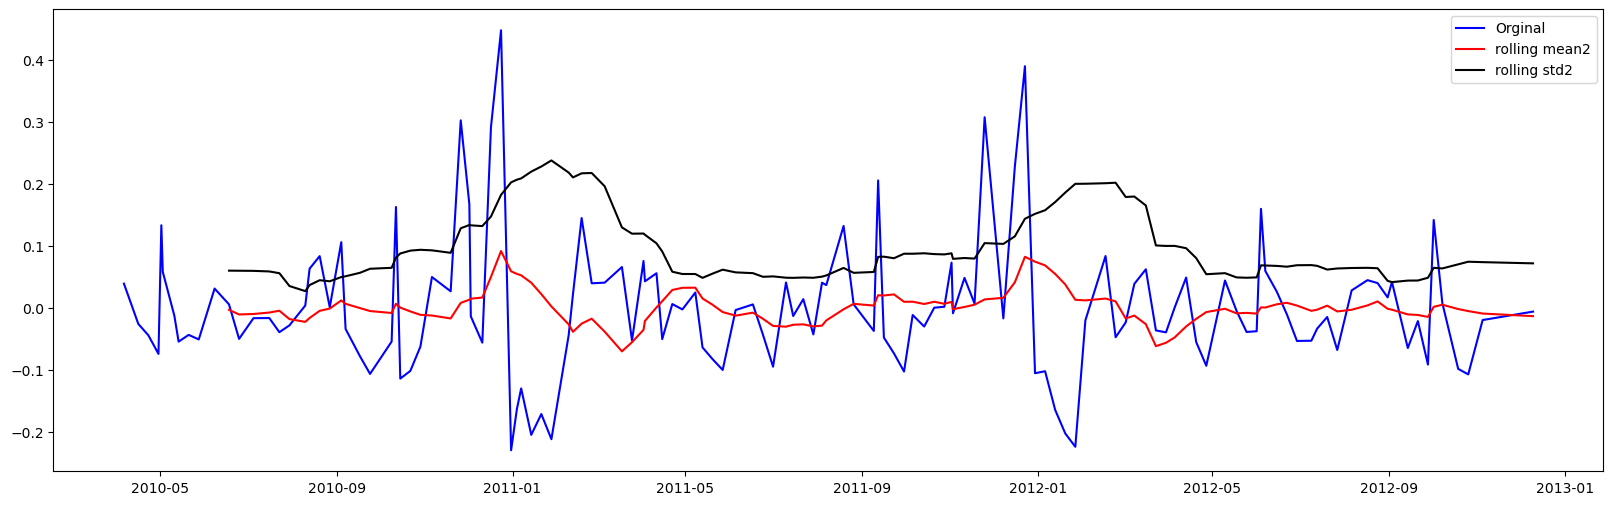

In [156]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [157]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.013785e+00
p-value                 1.550978e-07
# lags used             7.000000e+00
# observations          1.260000e+02
critical value (1%)    -3.483346e+00
critical value (5%)    -2.884766e+00
critical value (10%)   -2.579156e+00
Rejects the null hypothesis
Data has no unit root and is stationary


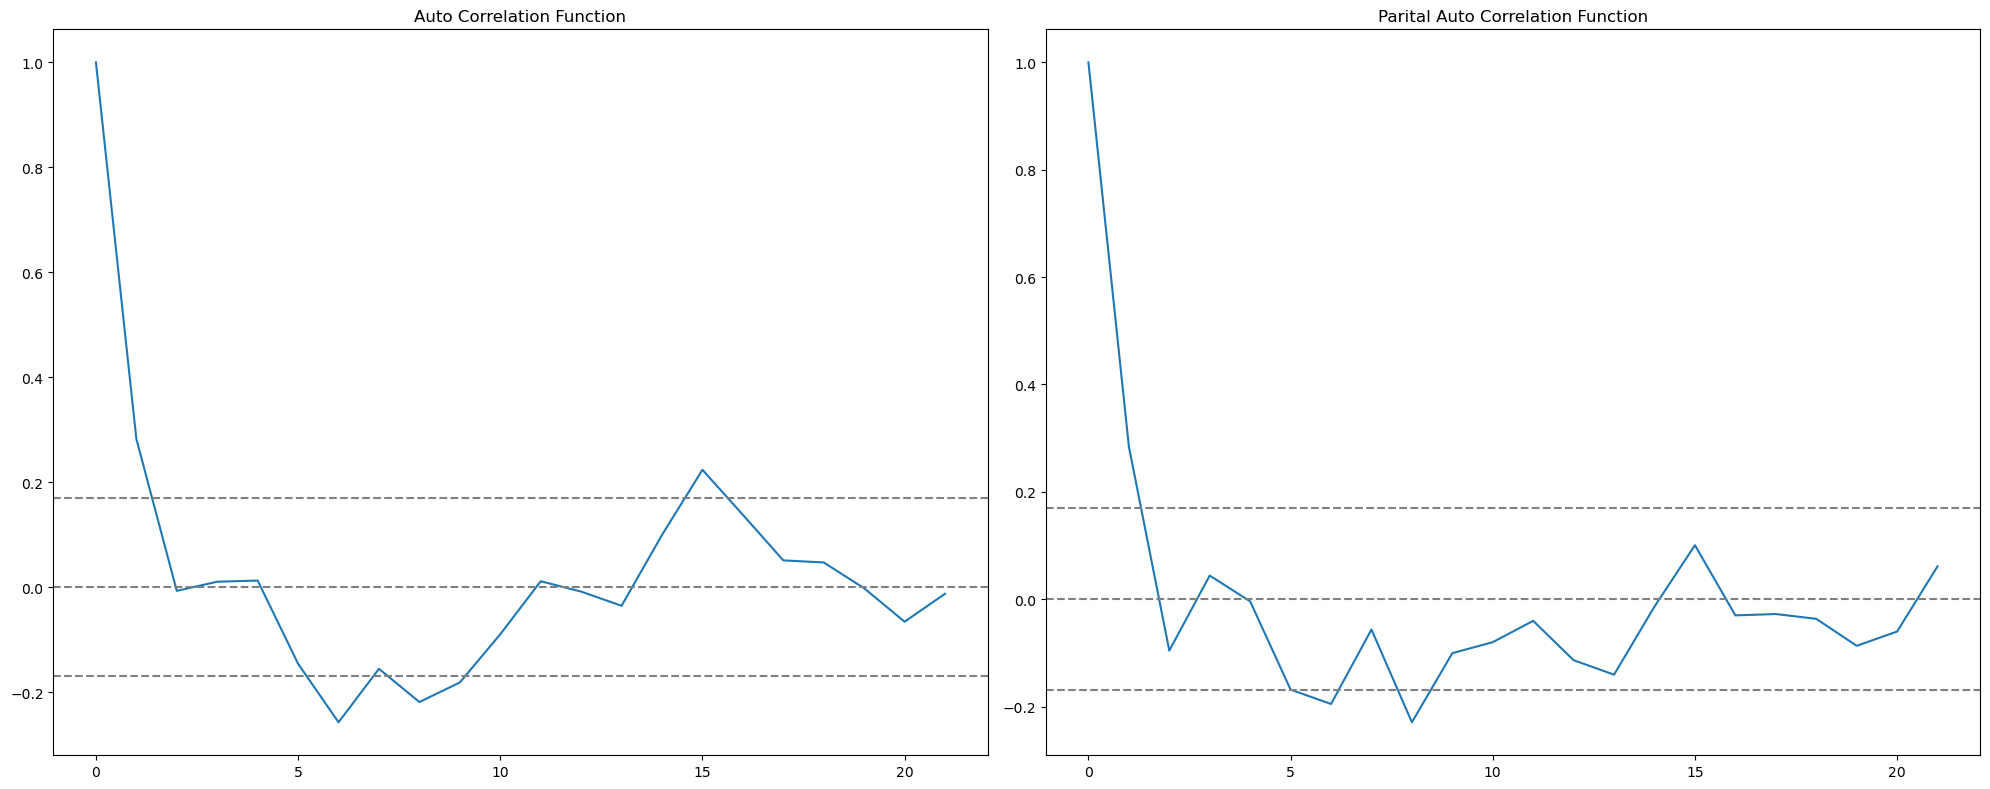

In [158]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [159]:
p, d, q = 3, 1, 2 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


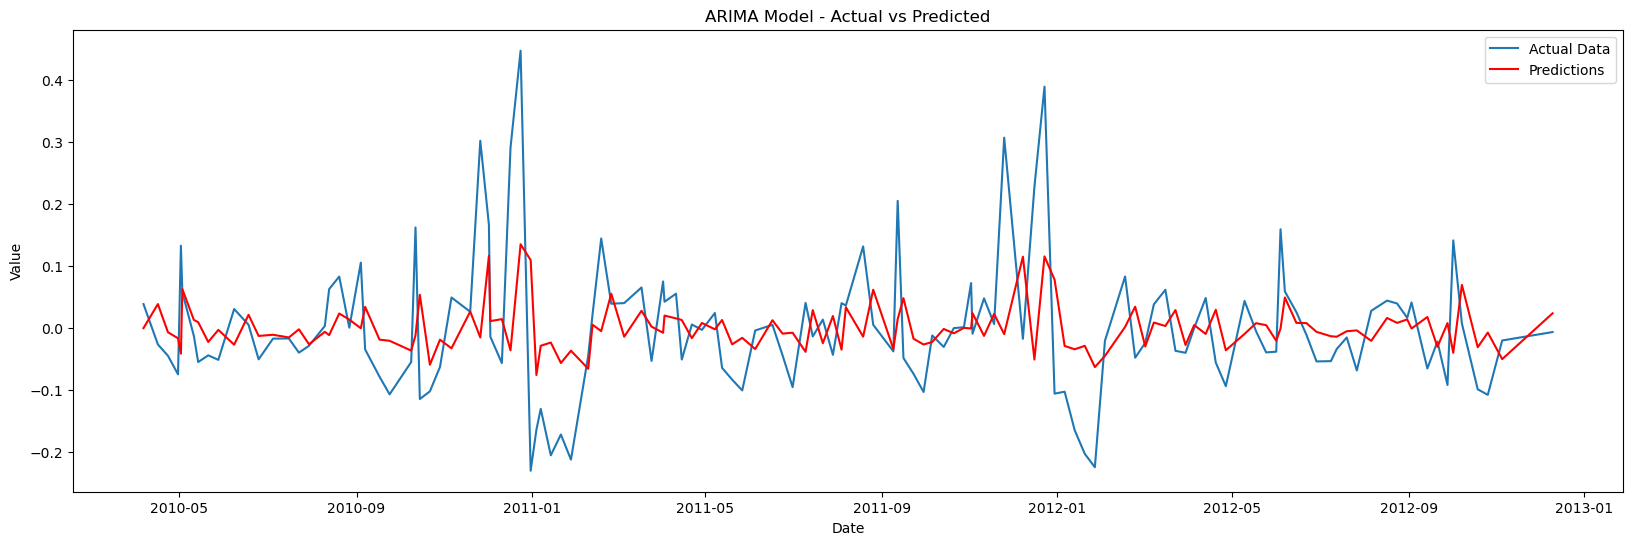

In [160]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [161]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.010452700147781716
Root Mean Squared_Error  0.10223844750279475


In [162]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [163]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [164]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [165]:
forecast_df.set_index('Date',inplace=True)

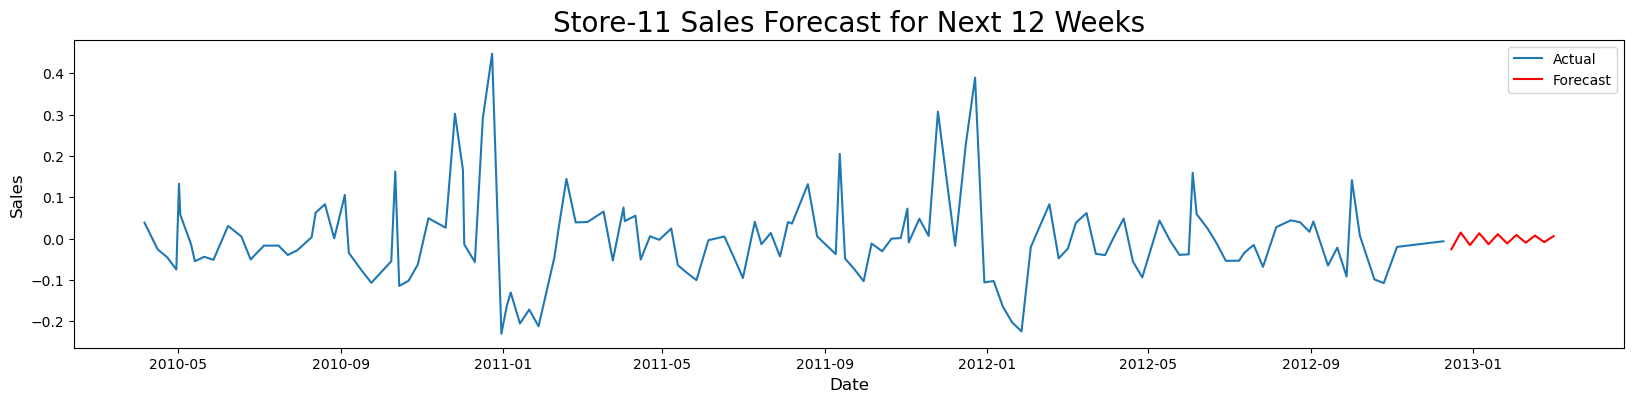

In [166]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-11 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 17 Forecasting

In [167]:
store17_sales=df[df['Store']==17].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [168]:
store17_sales.set_index('Date',inplace=True)

In [169]:
adf_test(store17_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.812027
p-value                   0.000052
# lags used               2.000000
# observations          140.000000
critical value (1%)      -3.477945
critical value (5%)      -2.882416
critical value (10%)     -2.577902
Rejects the null hypothesis
Data has no unit root and is stationary


In [170]:
decomposition=seasonal_decompose(store17_sales['Weekly_Sales'],period=13)

Figure(640x480)


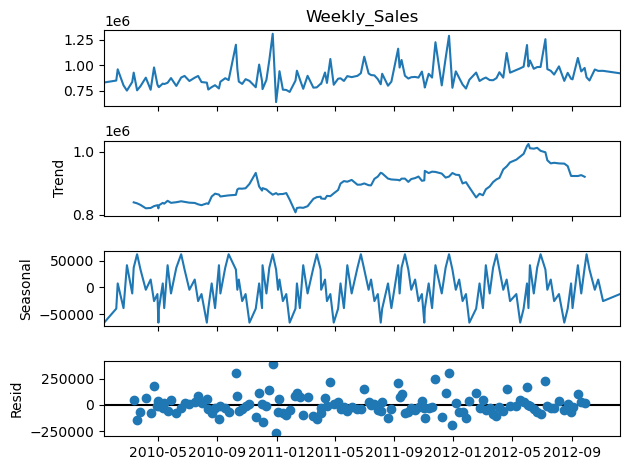

In [171]:
print(decomposition.plot())

In [172]:
mean1=store17_sales.rolling(window=10).mean()
std1=store17_sales.rolling(window=10).std()

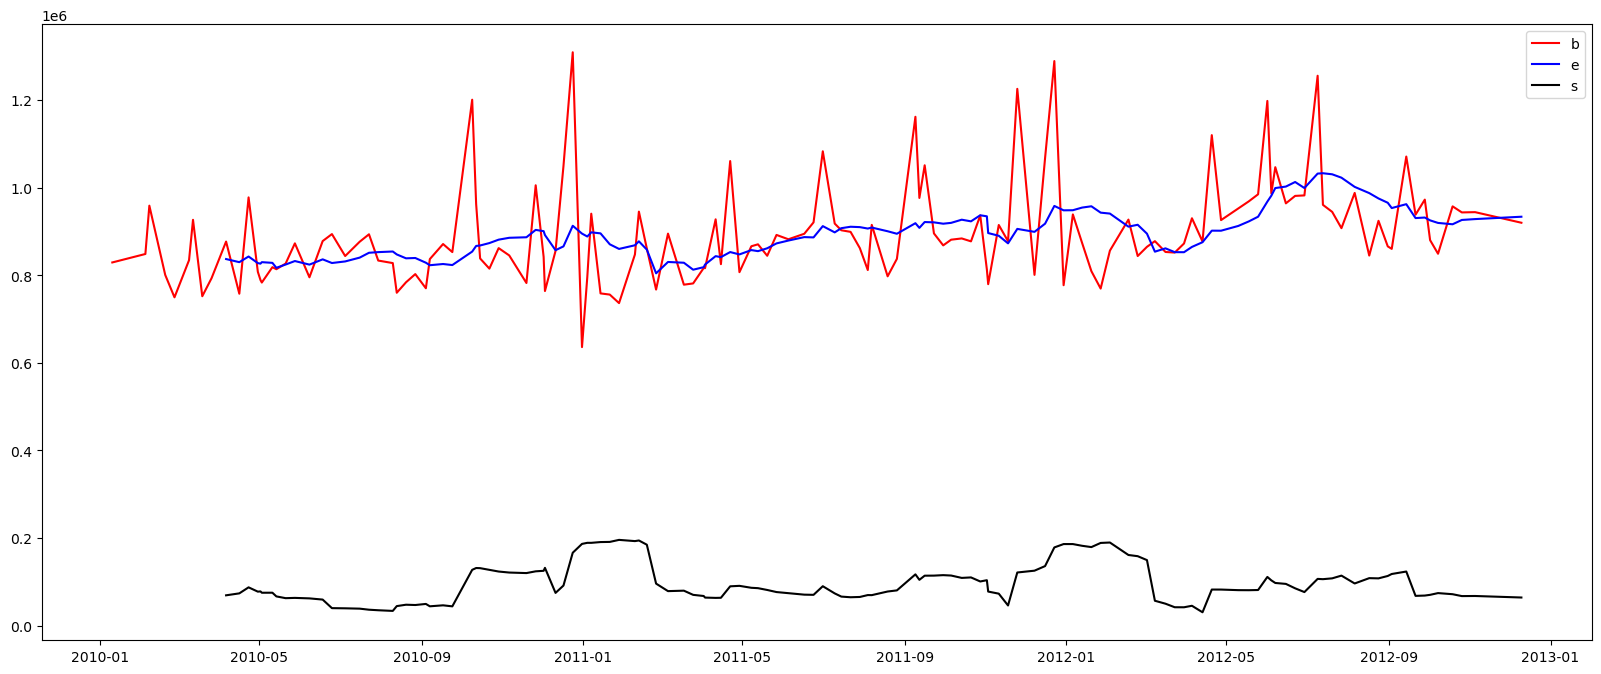

In [173]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store17_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

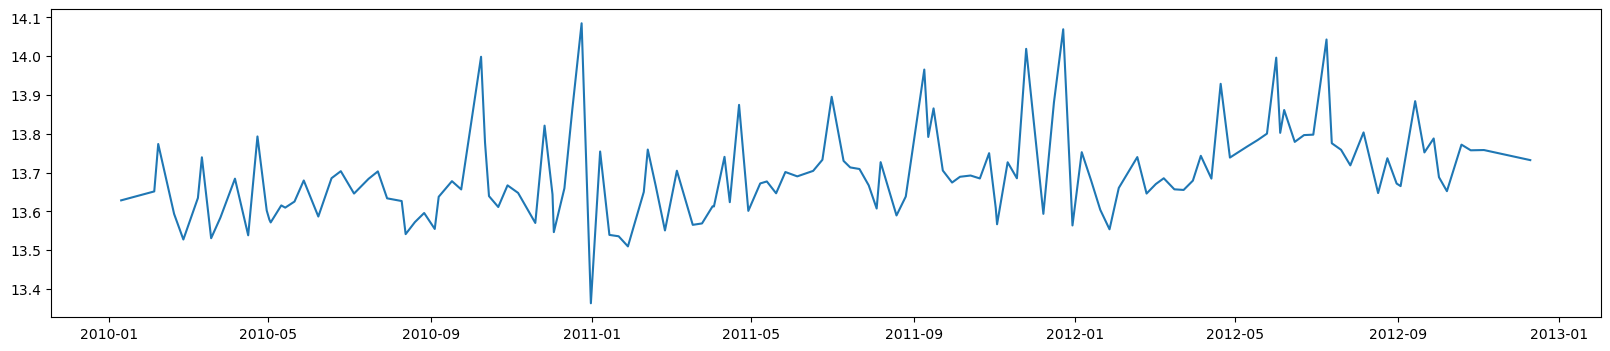

In [174]:
df_log = np.log(store17_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

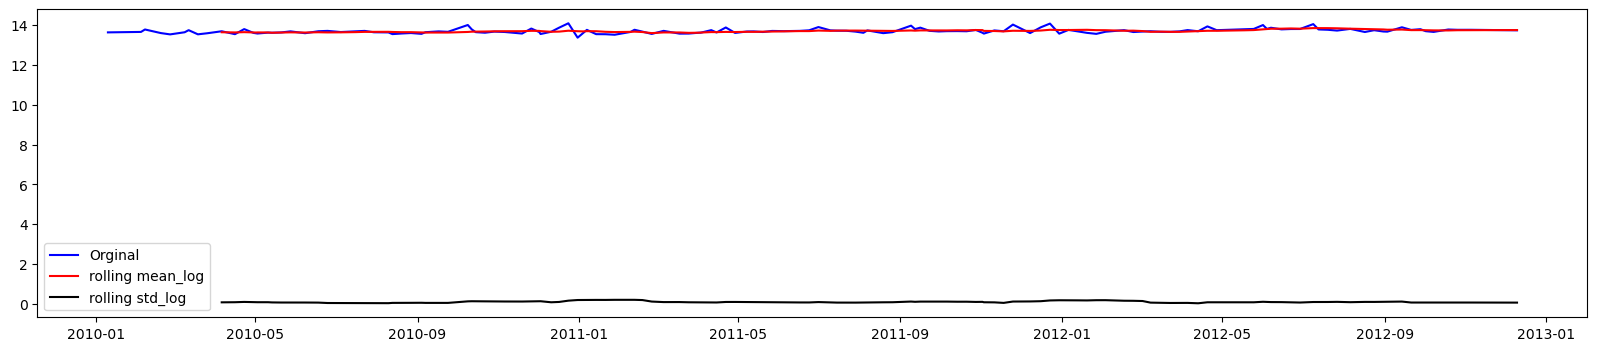

In [175]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [176]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.049596
2010-04-16     -0.087448
2010-04-23      0.153329
2010-04-30     -0.020509
2010-05-02     -0.042541
2010-05-03     -0.054242
2010-05-11     -0.008435
2010-05-14     -0.001185
2010-05-21      0.005050
2010-05-28      0.049846
2010-06-08     -0.033392

In [177]:
df_new.dropna(inplace = True) # dropping the nan values

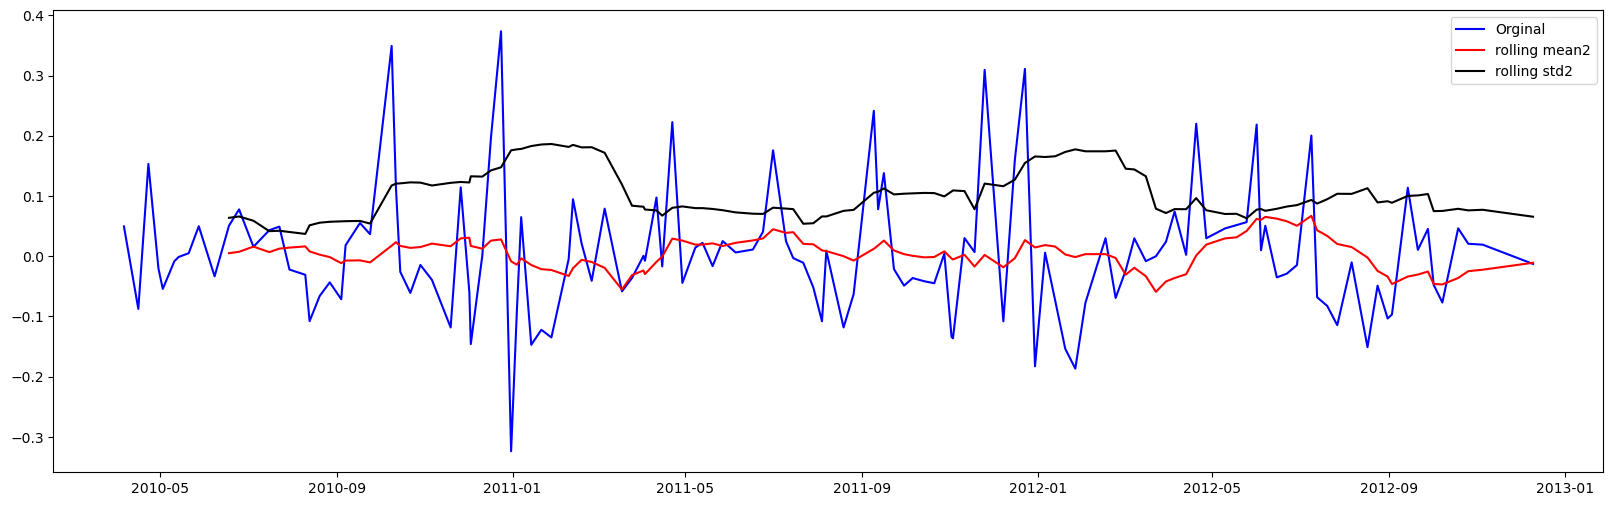

In [178]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [179]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.209908e+00
p-value                 5.540091e-08
# lags used             5.000000e+00
# observations          1.280000e+02
critical value (1%)    -3.482501e+00
critical value (5%)    -2.884398e+00
critical value (10%)   -2.578960e+00
Rejects the null hypothesis
Data has no unit root and is stationary


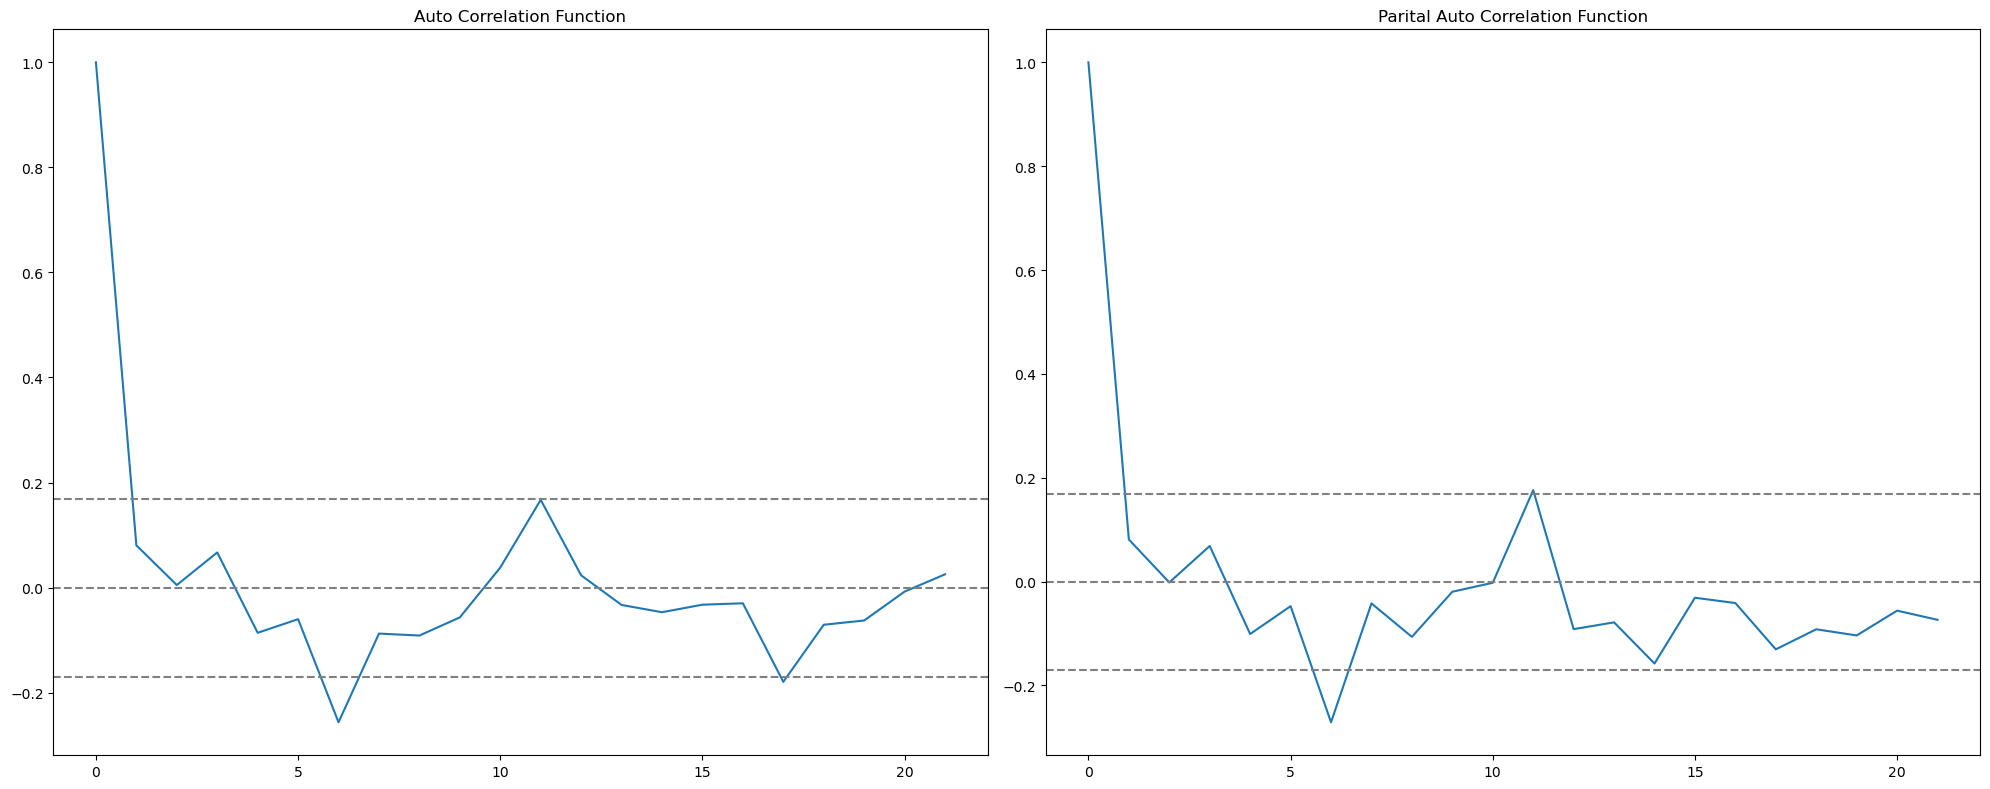

In [180]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [181]:
#pdq values are 3,1,3
p, d, q = 3, 1, 3 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


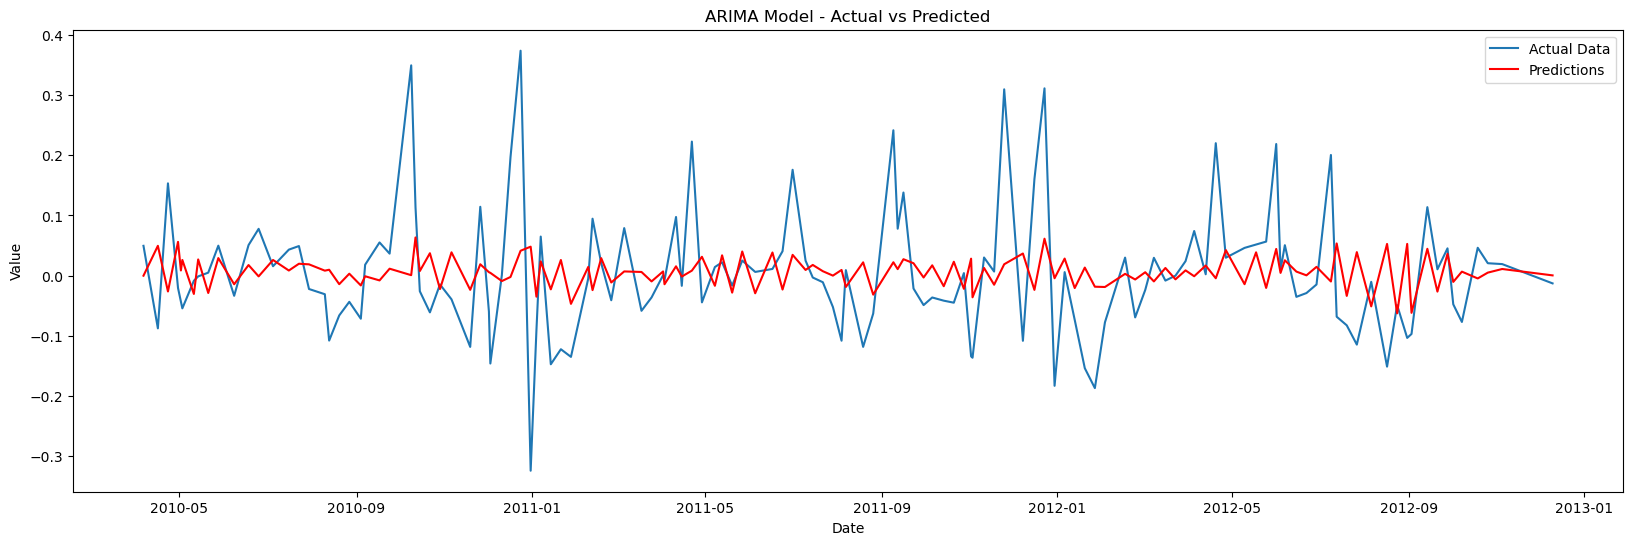

In [182]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [183]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.011021208888198256
Root Mean Squared_Error  0.10223844750279475


In [184]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [185]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [186]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [187]:
forecast_df.set_index('Date',inplace=True)

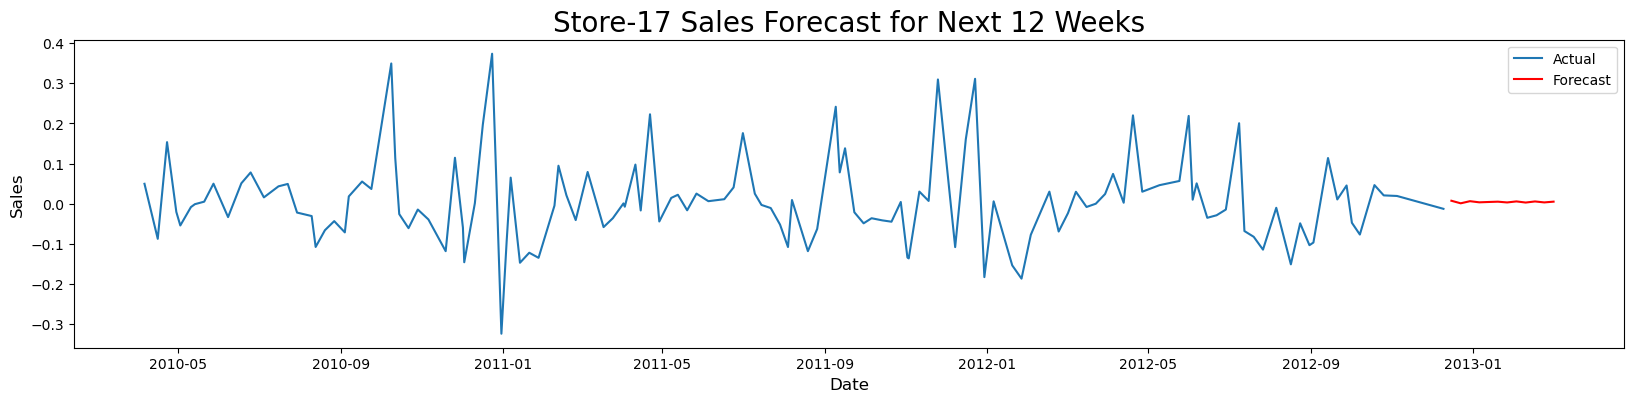

In [188]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-17 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 33 Forecasting

In [189]:
store33_sales=df[df['Store']==33].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [190]:
store33_sales.set_index('Date',inplace=True)

In [191]:
adf_test(store33_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.130272
p-value                   0.232518
# lags used               9.000000
# observations          133.000000
critical value (1%)      -3.480500
critical value (5%)      -2.883528
critical value (10%)     -2.578496
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [192]:
decomposition=seasonal_decompose(store33_sales['Weekly_Sales'],period=13)

Figure(640x480)


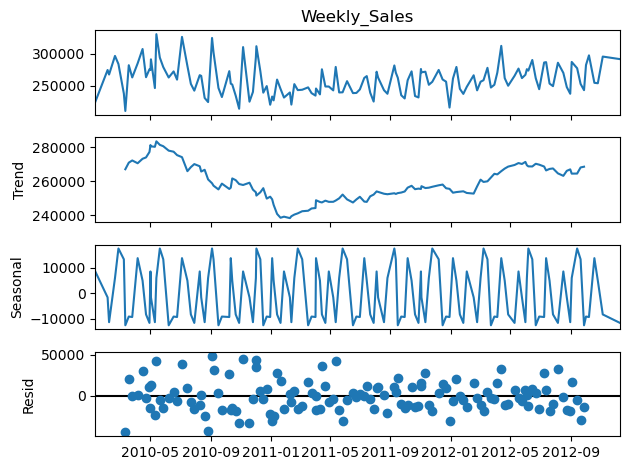

In [193]:
print(decomposition.plot())

In [194]:
mean1=store33_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store33_sales.rolling(window=10).std() # Creating the Rolling standard deviation

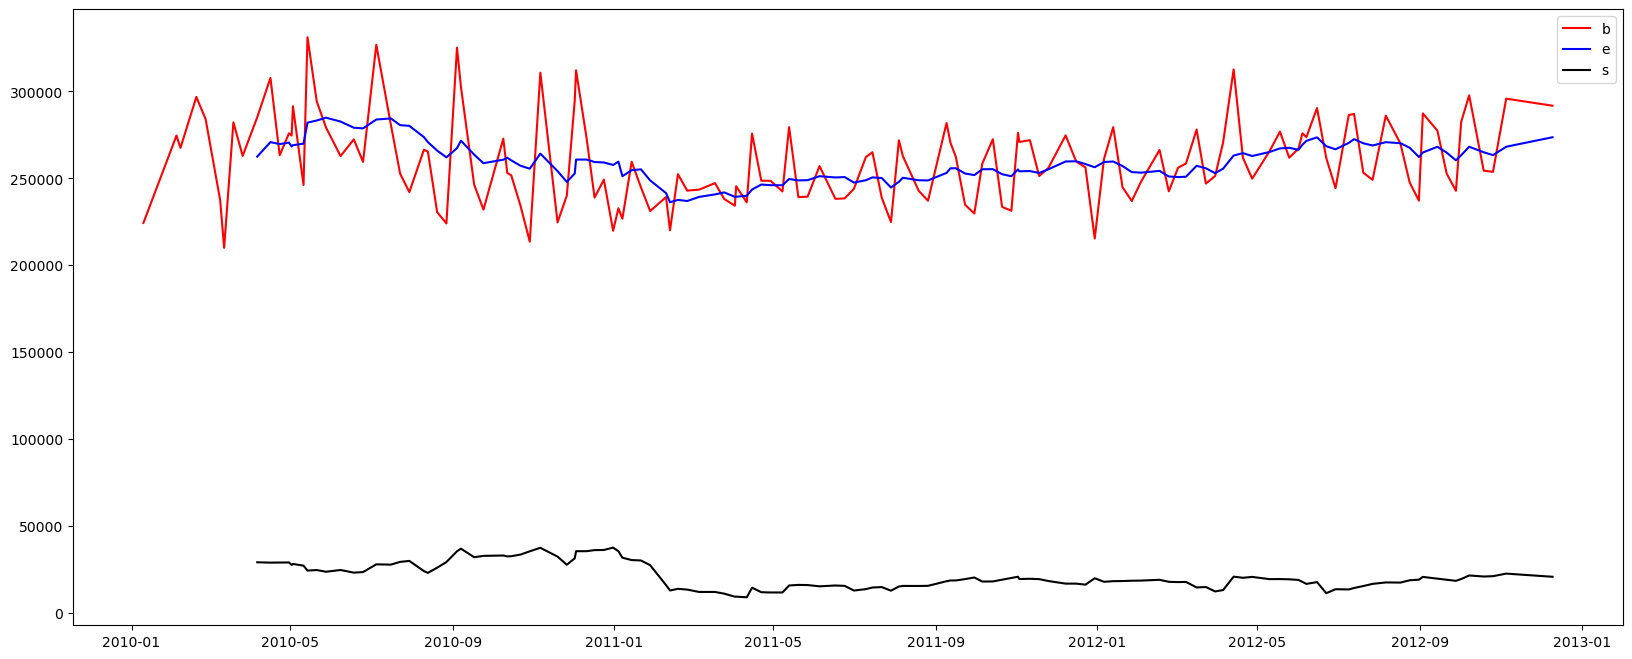

In [195]:
plt.figure(figsize=(20,8))
orig=plt.plot(store33_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

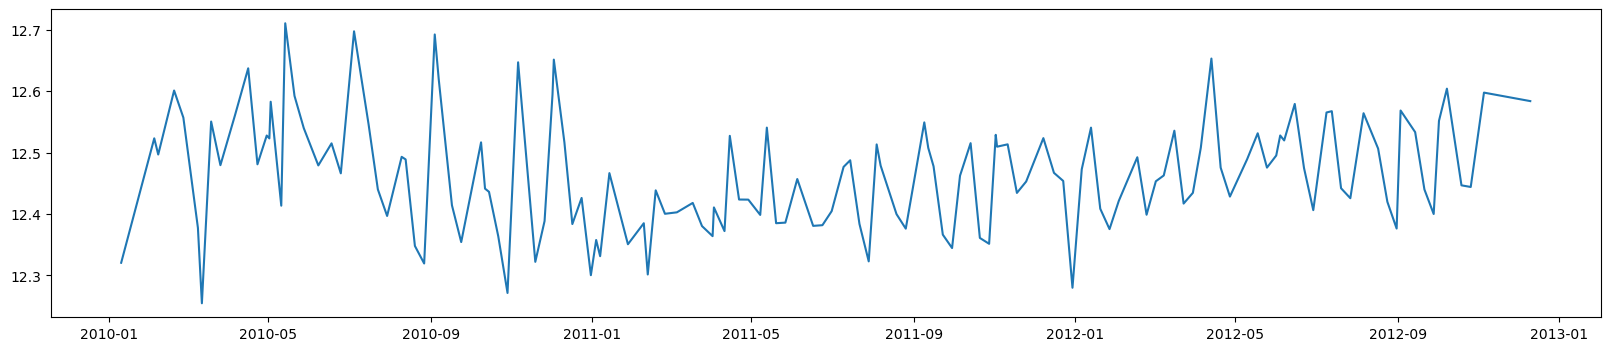

In [196]:
df_log = np.log(store33_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

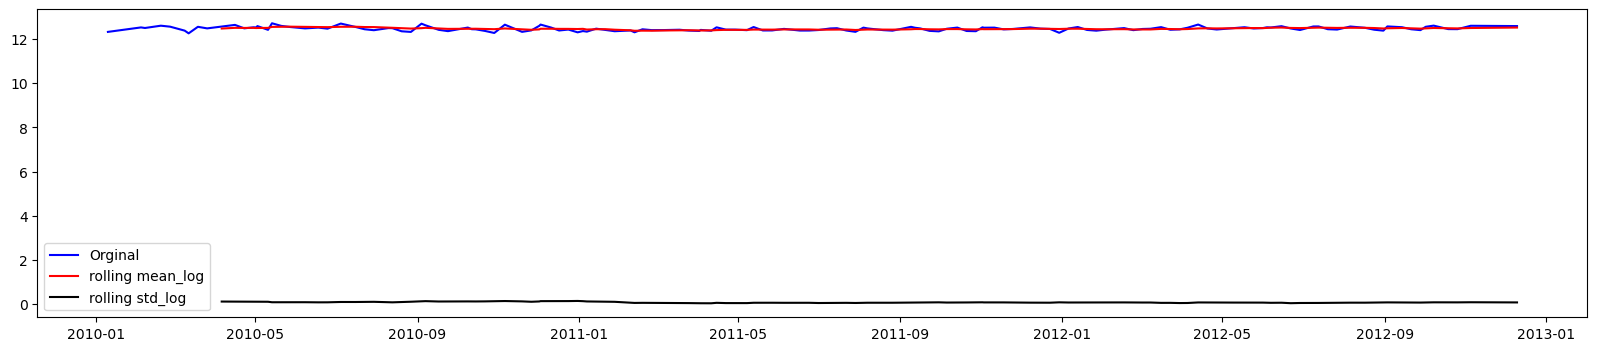

In [197]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [198]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.088436
2010-04-16      0.133338
2010-04-23     -0.018664
2010-04-30      0.025073
2010-05-02      0.028180
2010-05-03      0.085294
2010-05-11     -0.087463
2010-05-14      0.163782
2010-05-21      0.041444
2010-05-28     -0.016974
2010-06-08     -0.069565

In [199]:
df_new.dropna(inplace = True)

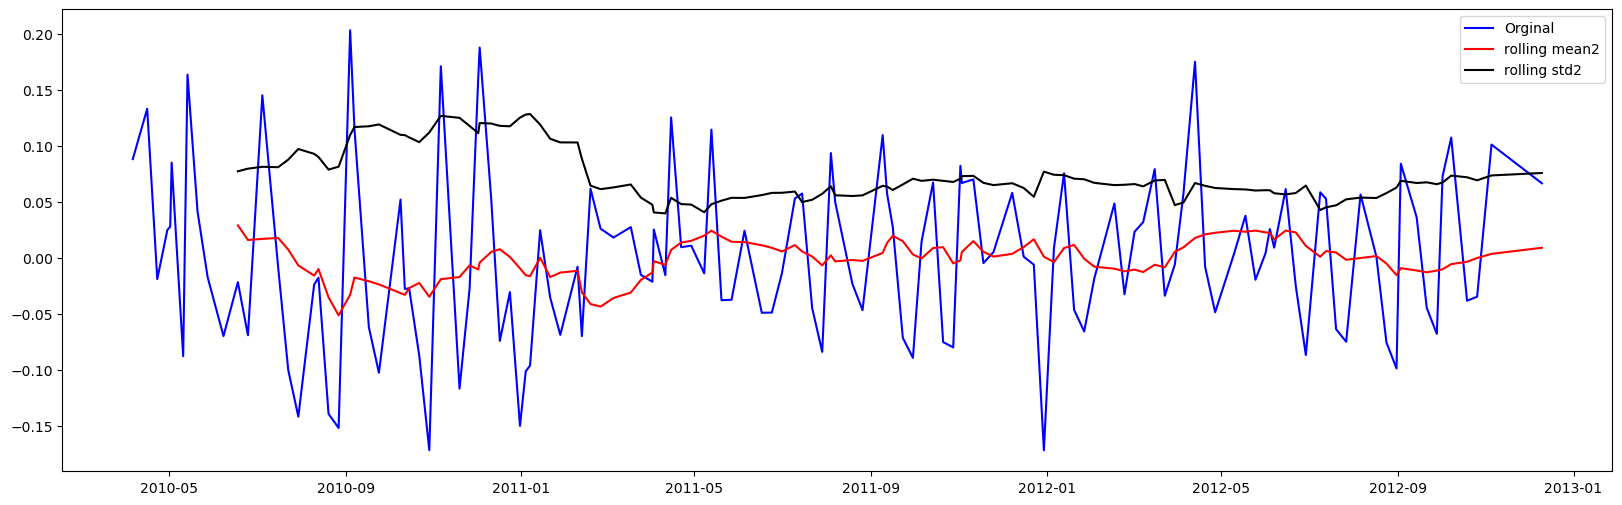

In [200]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [201]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.493019
p-value                   0.000002
# lags used               5.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Rejects the null hypothesis
Data has no unit root and is stationary


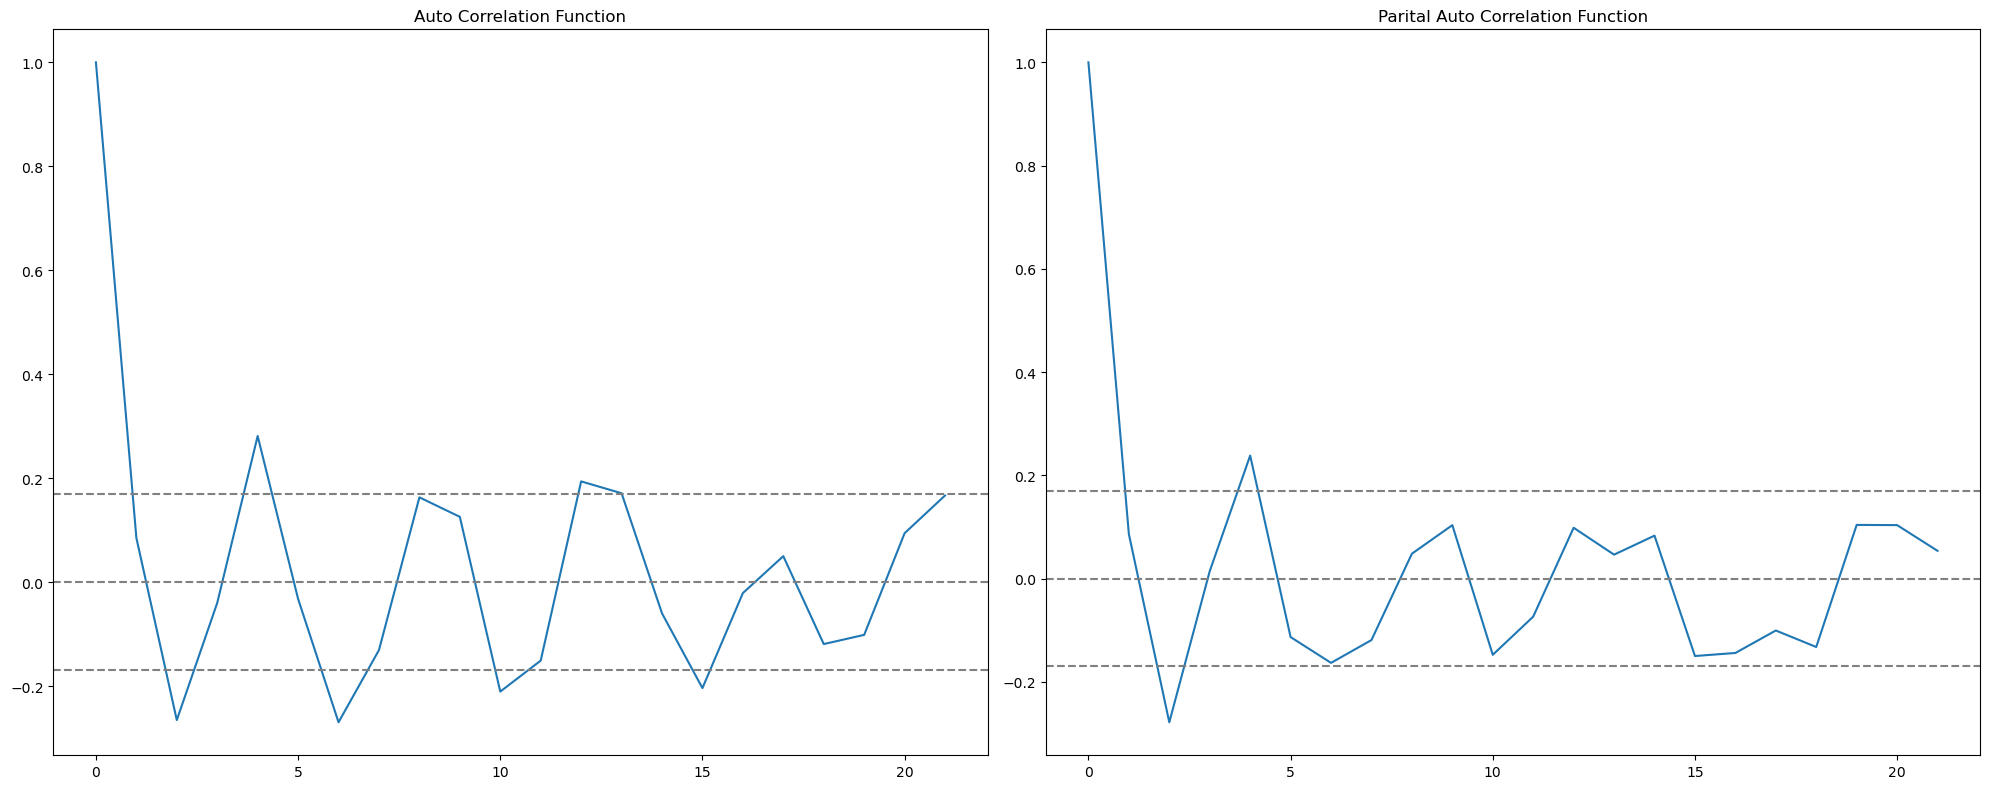

In [202]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [203]:
#pdq values are 2,1,2
p, d, q = 2, 1, 2  
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


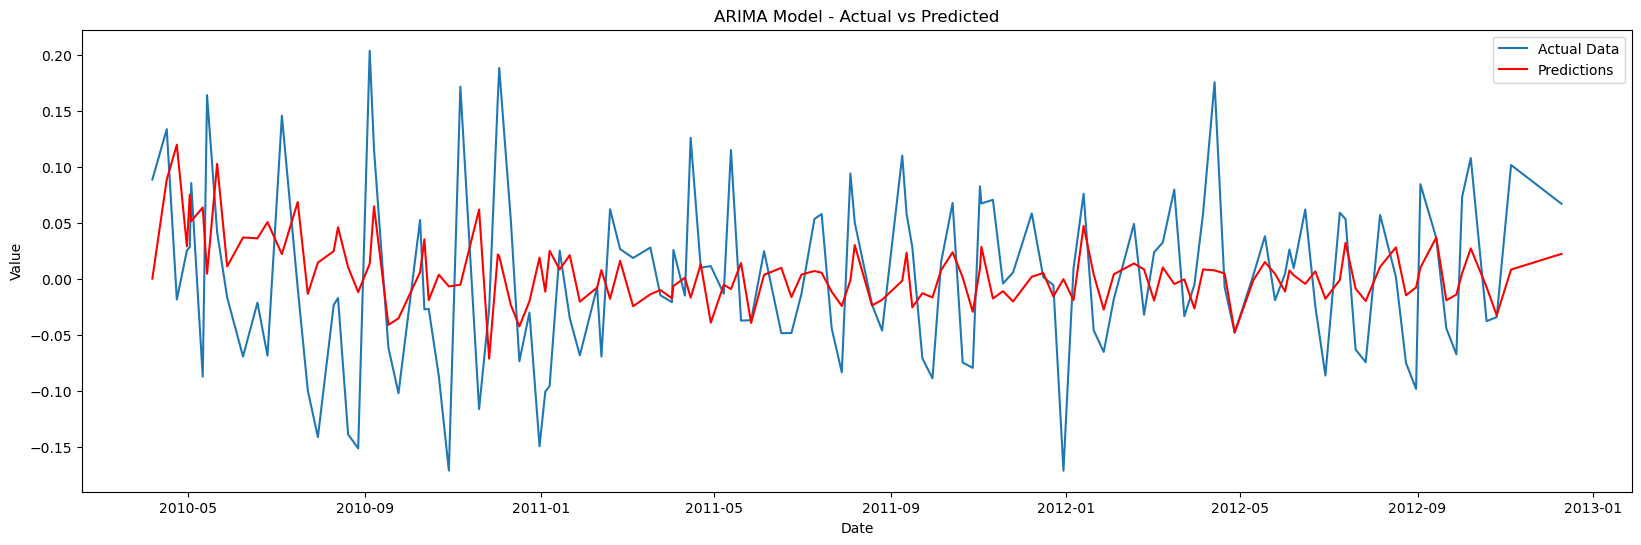

In [204]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [205]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.005680385239552839
Root Mean Squared_Error  0.07536833048139542


In [206]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [207]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [208]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [209]:
forecast_df.set_index('Date',inplace=True)

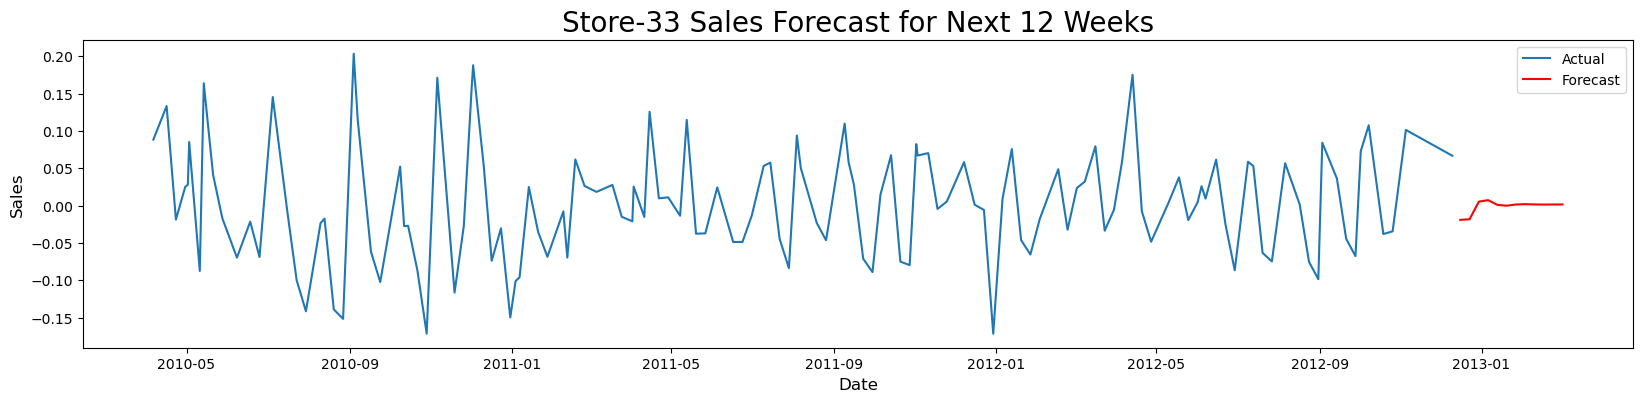

In [210]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-33 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 44 Forecasting

In [211]:
store44_sales=df[df['Store']==44].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [213]:
store44_sales.set_index('Date',inplace=True)

In [214]:
adf_test(store44_sales['Weekly_Sales'],title='ADF TEST') 

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -0.175363
p-value                   0.941395
# lags used               6.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [215]:
decomposition=seasonal_decompose(store44_sales['Weekly_Sales'],period=13)

Figure(640x480)


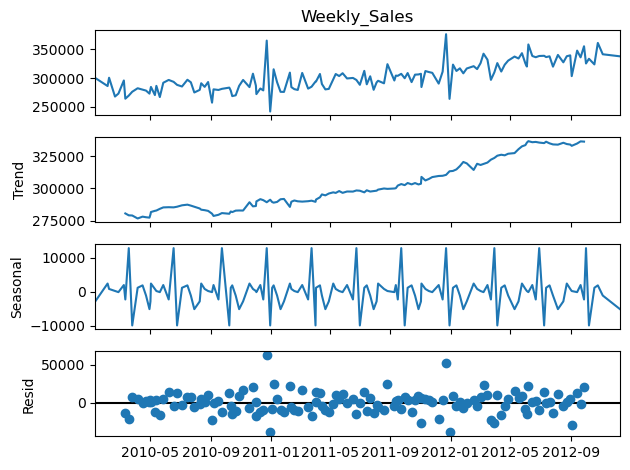

In [216]:
print(decomposition.plot())

In [217]:
mean1=store44_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store44_sales.rolling(window=10).std() # Creating the Rolling standard deviation

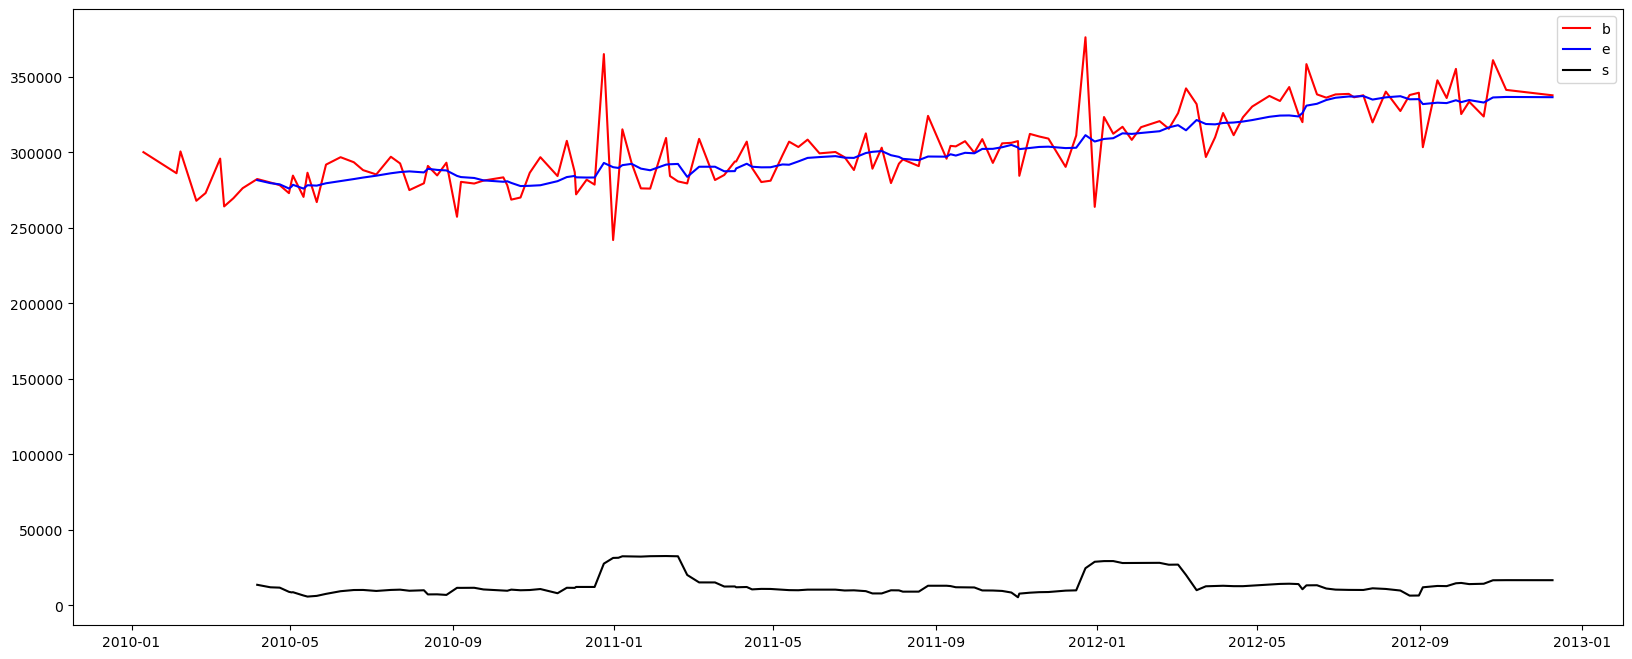

In [218]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store44_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

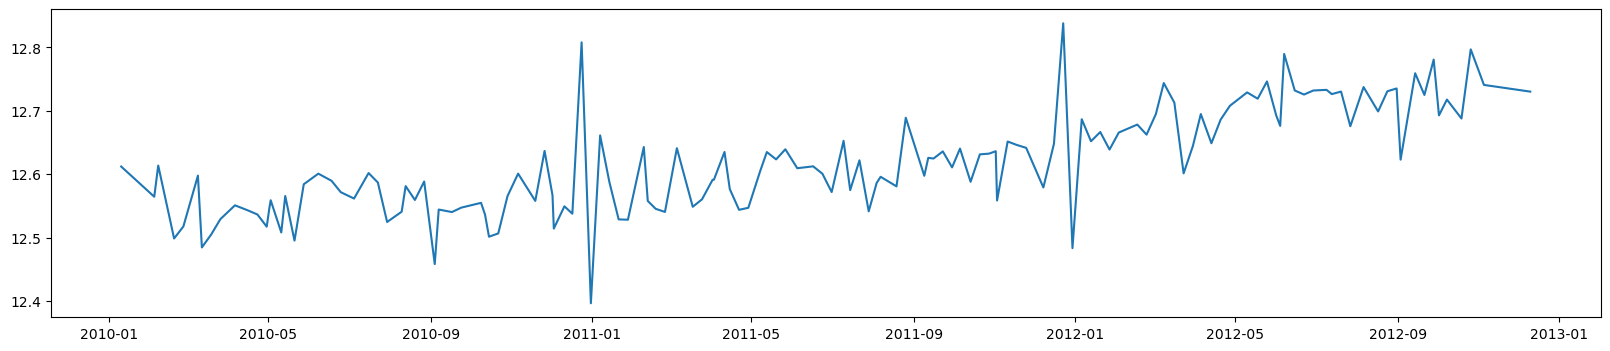

In [219]:
df_log = np.log(store44_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

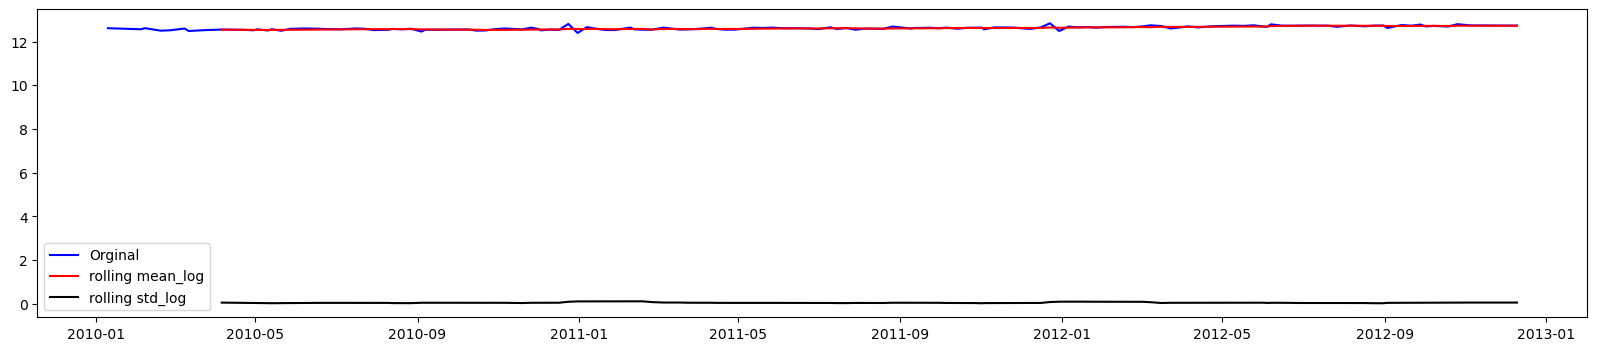

In [220]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [221]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.003580
2010-04-16      0.002322
2010-04-23     -0.001186
2010-04-30     -0.010734
2010-05-02      0.013695
2010-05-03      0.022024
2010-05-11     -0.019825
2010-05-14      0.029531
2010-05-21     -0.039816
2010-05-28      0.043574
2010-06-08      0.055276

In [222]:
df_new.dropna(inplace = True)

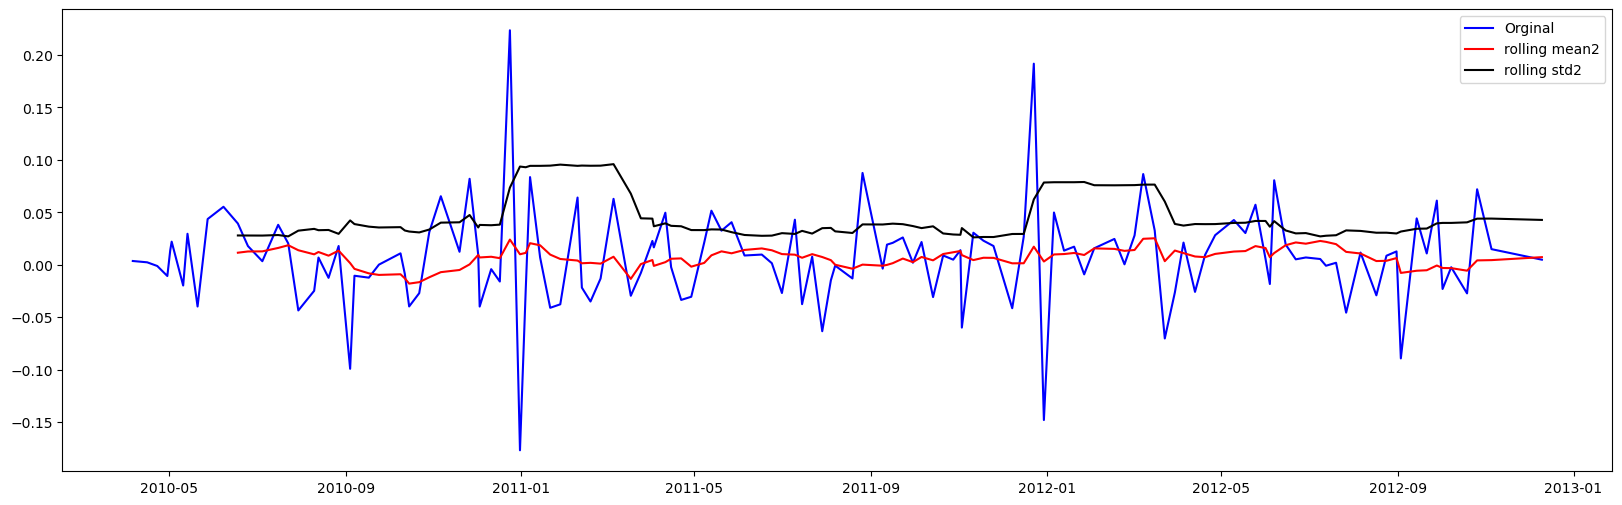

In [223]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [224]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -1.071368e+01
p-value                 3.282710e-19
# lags used             1.000000e+00
# observations          1.320000e+02
critical value (1%)    -3.480888e+00
critical value (5%)    -2.883697e+00
critical value (10%)   -2.578586e+00
Rejects the null hypothesis
Data has no unit root and is stationary


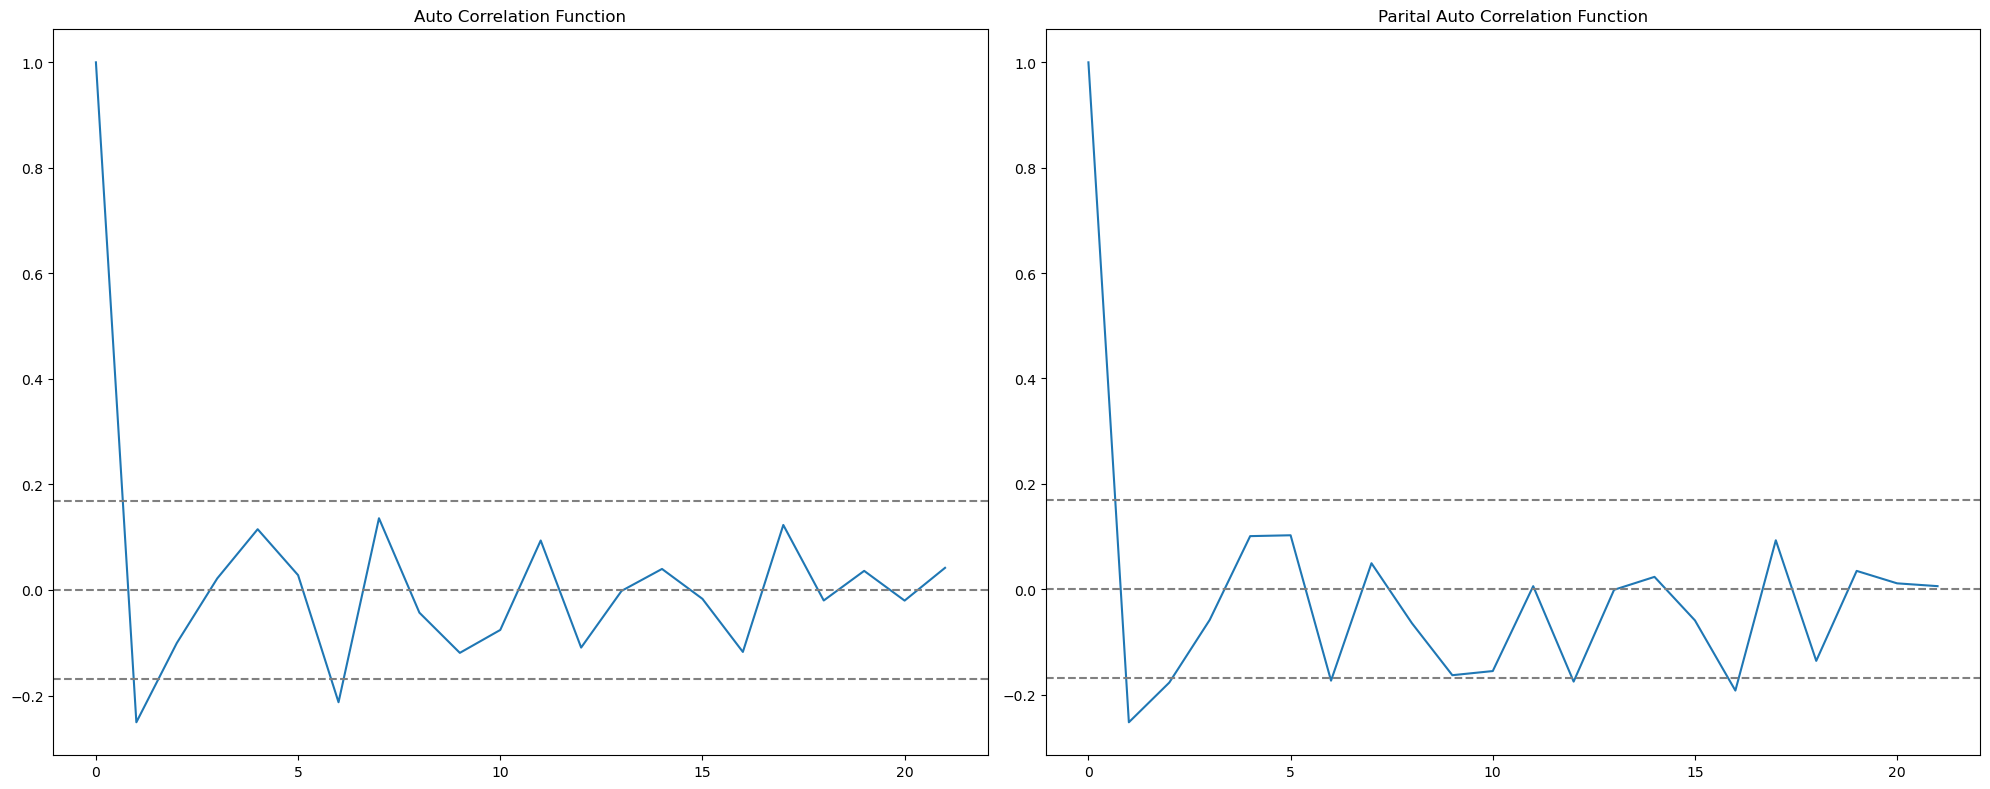

In [225]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [226]:
p, d, q = 1, 1, 1 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


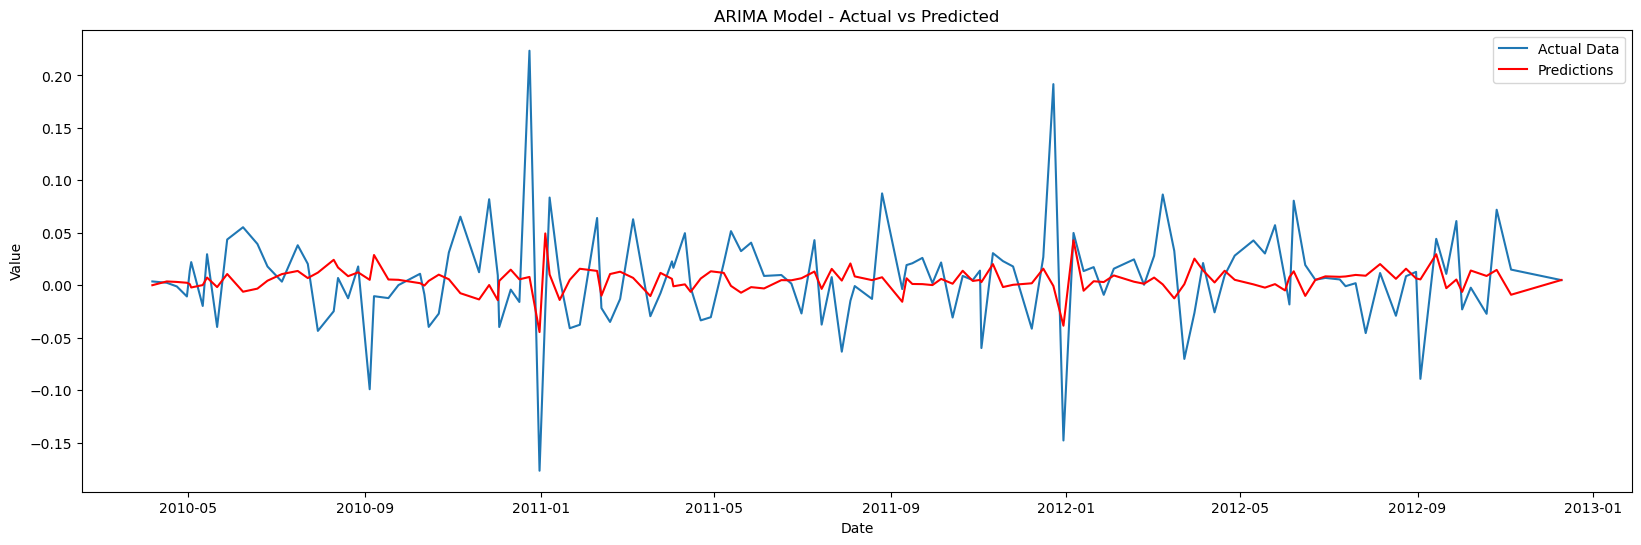

In [227]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [234]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.002104489081853691
Root Mean Squared_Error  0.04587471070049043


In [235]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [236]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [237]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date',inplace=True)

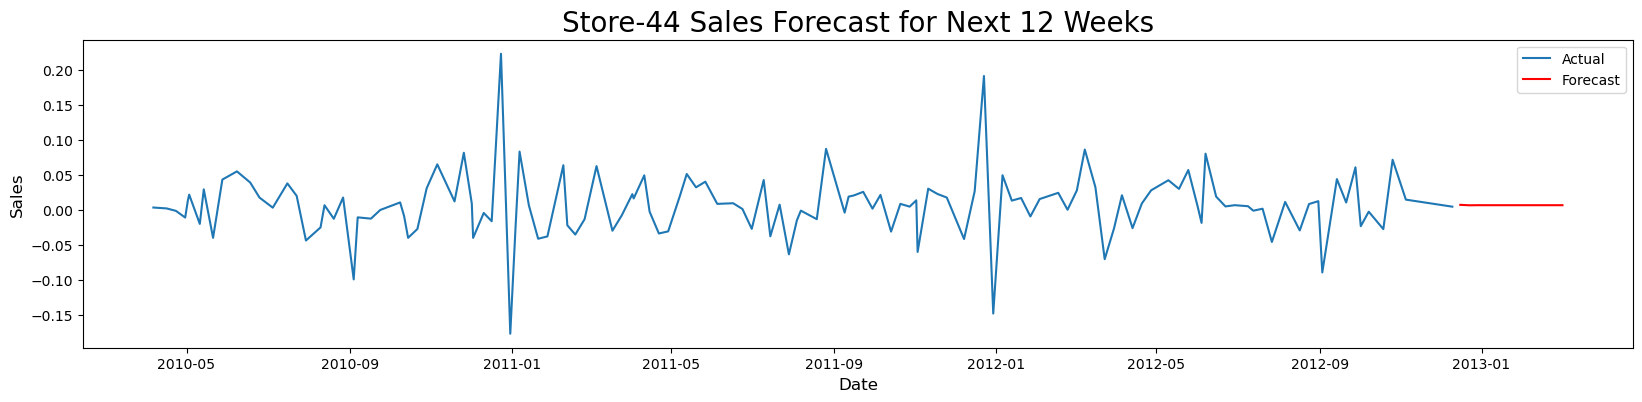

In [238]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-44 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

## Store 30 Forecasting

In [239]:
store30_sales=df[df['Store']==30].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [240]:
store30_sales.set_index('Date',inplace=True)

In [242]:
adf_test(store30_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.114204
p-value                   0.025520
# lags used               3.000000
# observations          139.000000
critical value (1%)      -3.478294
critical value (5%)      -2.882568
critical value (10%)     -2.577983
Rejects the null hypothesis
Data has no unit root and is stationary


Figure(640x480)


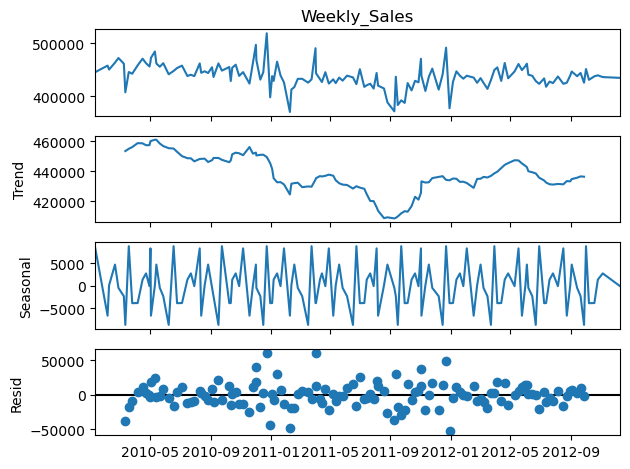

In [243]:
decomposition=seasonal_decompose(store30_sales['Weekly_Sales'],period=13)
print(decomposition.plot())

In [244]:
mean1=store30_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store30_sales.rolling(window=10).std() # Creating the Rolling standard deviation

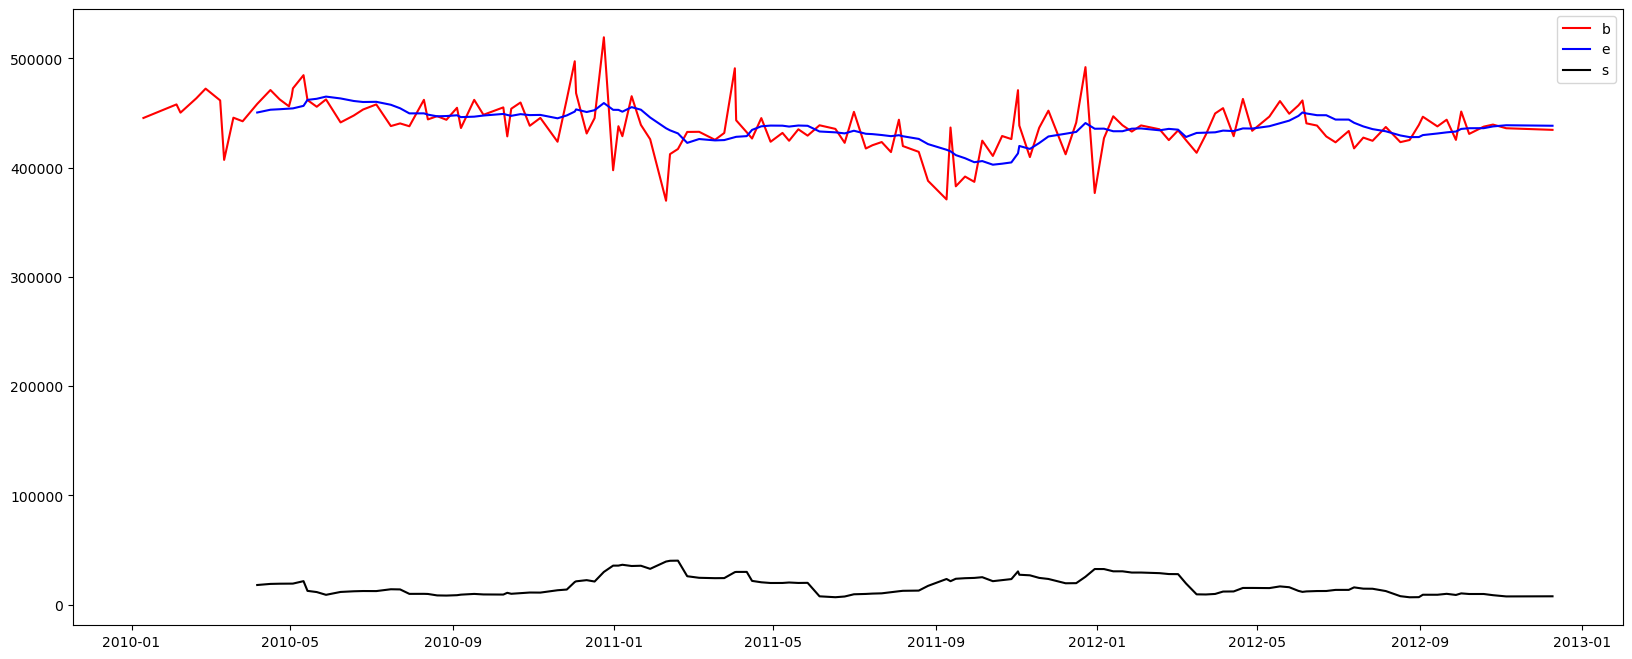

In [245]:
plt.figure(figsize=(20,8))
orig=plt.plot(store30_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

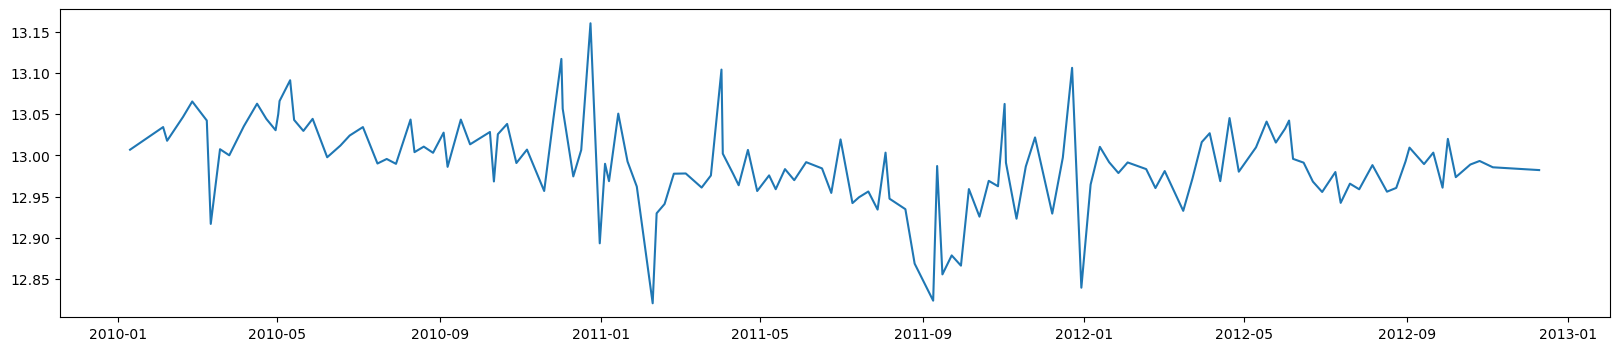

In [246]:
df_log = np.log(store30_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

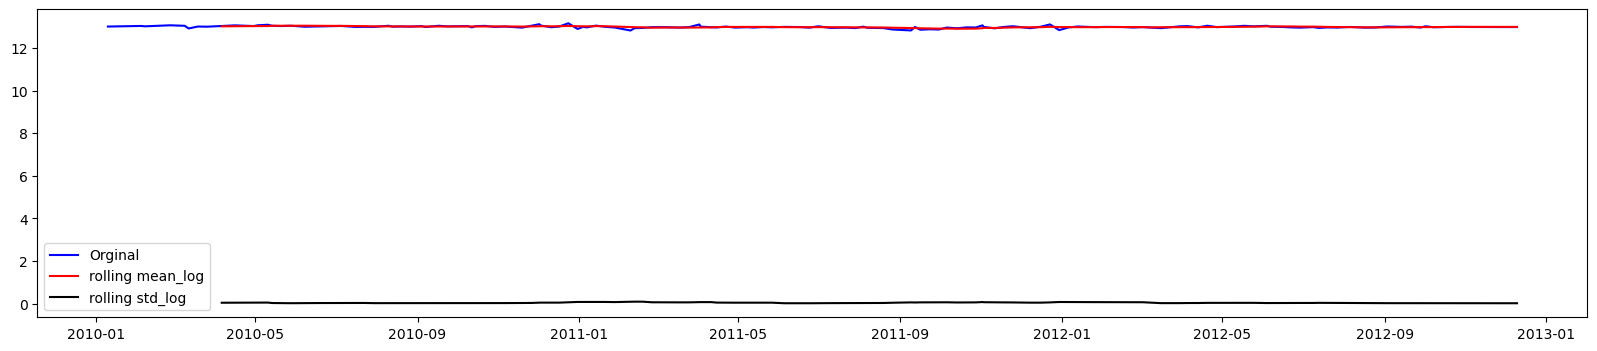

In [247]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [248]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.018056
2010-04-16      0.039826
2010-04-23      0.020408
2010-04-30      0.005380
2010-05-02      0.024507
2010-05-03      0.040411
2010-05-11      0.060746
2010-05-14     -0.000045
2010-05-21     -0.015598
2010-05-28     -0.005381
2010-06-08     -0.048239

In [249]:
df_new.dropna(inplace = True)

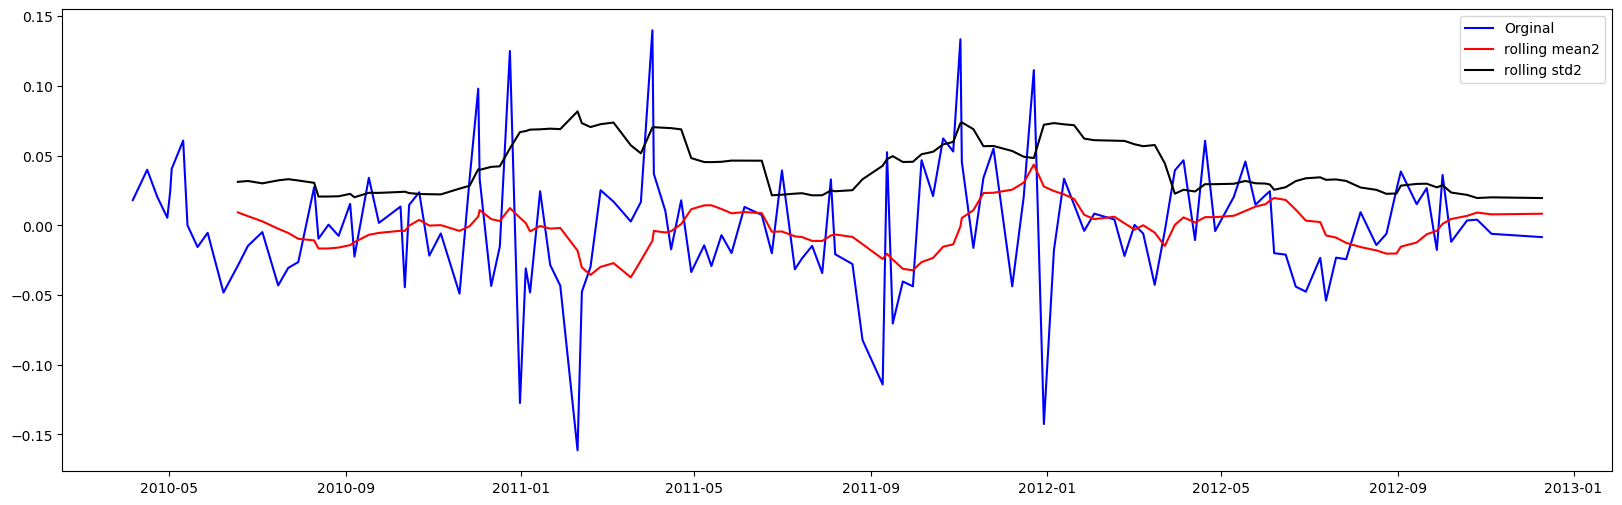

In [250]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [251]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.565975
p-value                   0.000002
# lags used               7.000000
# observations          126.000000
critical value (1%)      -3.483346
critical value (5%)      -2.884766
critical value (10%)     -2.579156
Rejects the null hypothesis
Data has no unit root and is stationary


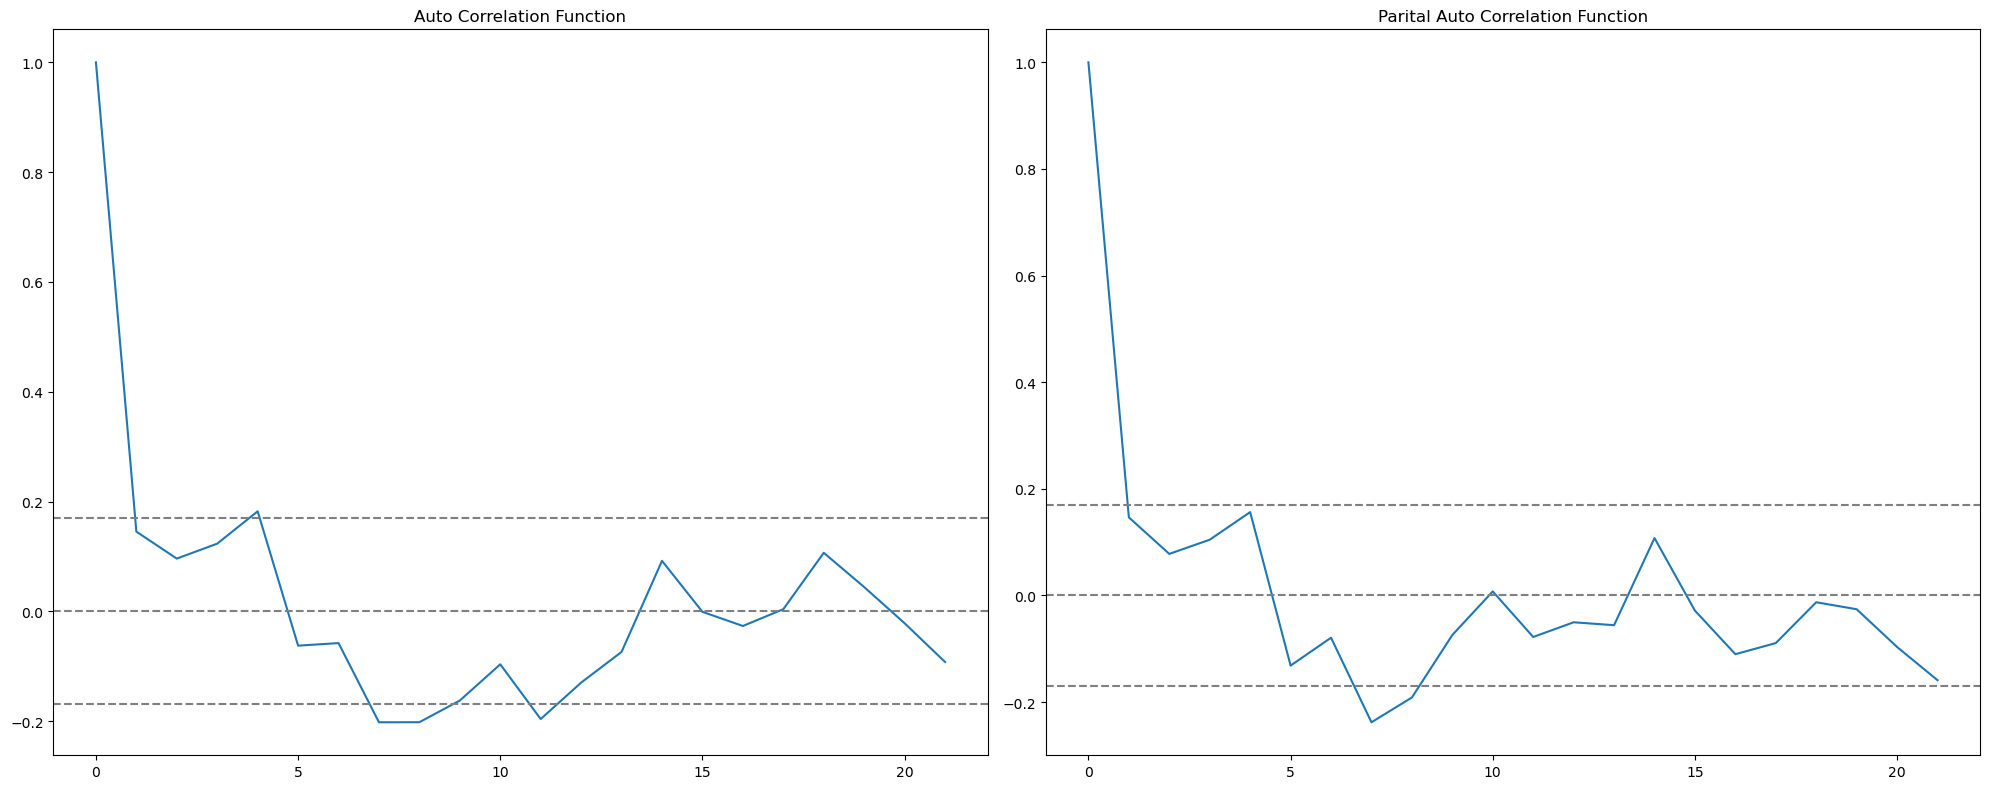

In [252]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [253]:
p, d, q = 1, 1, 1 
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


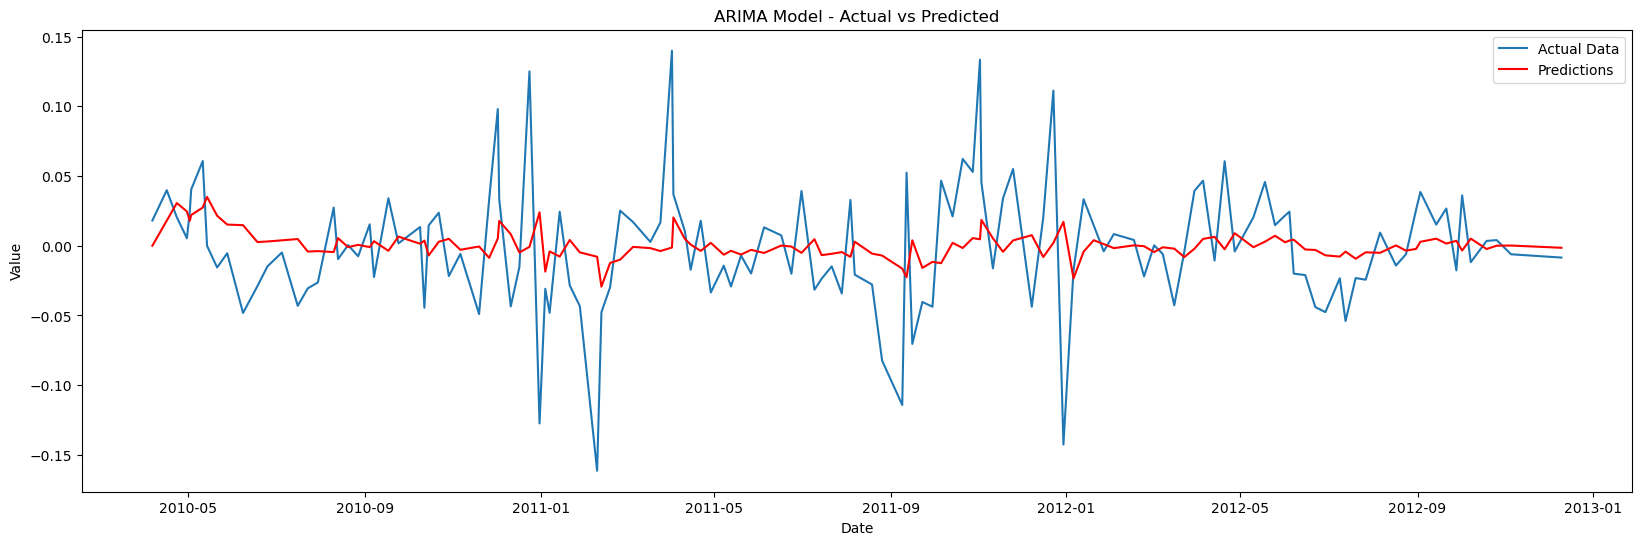

In [254]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [255]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.0020104005836608786
Root Mean Squared_Error  0.0448374908269952


In [256]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [257]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [258]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [259]:
forecast_df.set_index('Date',inplace=True)

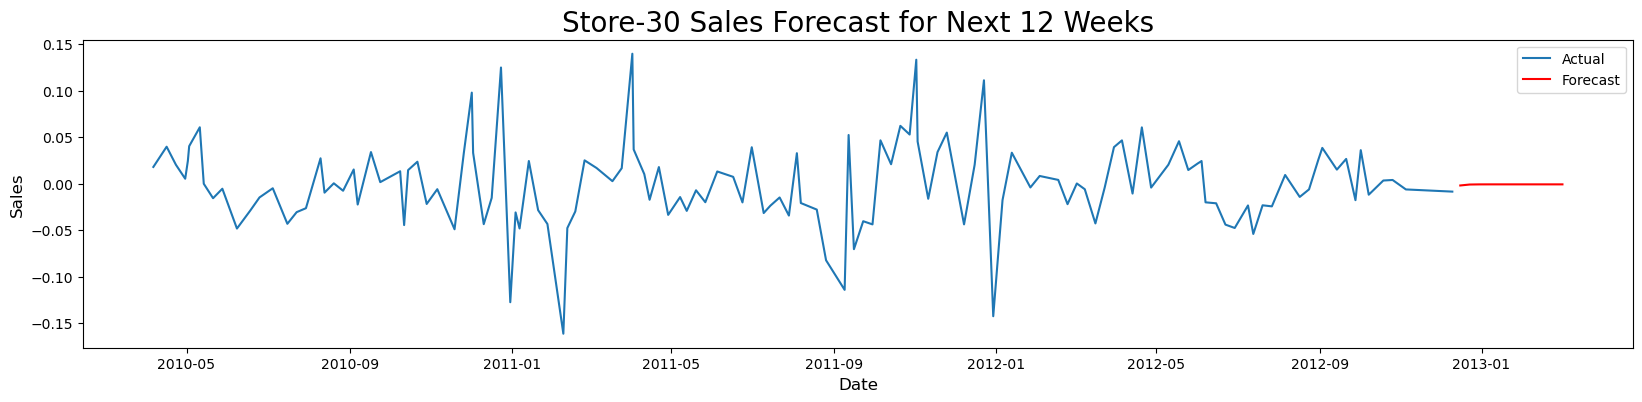

In [260]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-30 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()